# Analyse stock

In [57]:

import pandas as pd, numpy as np, seaborn as sns
import warnings 
import os
from matplotlib import pyplot as plt
from builtins import str

from datetime import datetime
warnings.filterwarnings(action="ignore")

%matplotlib inline


plt.style.use('seaborn-darkgrid')
sns.set(font_scale=3)

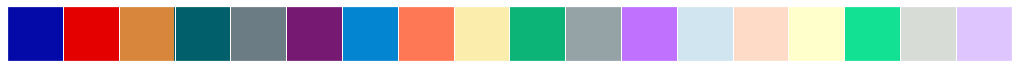

In [8]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", 
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#c071fe", 
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#dfc5fe", 
          ]
sns.palplot(sns.color_palette(palette))

In [102]:
donnees2 = pd.read_csv("donnees/exports.csv", sep=";")
donnees2.head()

Annee  Mois  PRODUIT  DATE_EFFET     ACHAT PU_ACHAT      VENTE PU_VENTE  \
0   2019     4        3  11/04/2019  -1679322    37,56  355306500    37,56   
1   2018    12        3  03/12/2018 -24800422    37,56  355306500    37,56   
2   2018     3        3  08/03/2018  -8725173    37,56  355306500    37,56   
3   2018     6        3  03/06/2018 -36324465    37,56  355306500    37,56   
4   2019    11        3  20/11/2019 -10745227    37,56  355306500    37,56   

   REF_PRODUIT      PRODUIT_1   CATEGORIE     FOURNISSEUR PAYS_FOURNISSEUR  \
0            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
1            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
2            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
3            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
4            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   

  VILLE_FOURNISSEUR  
0            London  
1            London  
2            London  
3            London  
4            London

In [104]:
donnees.ACHAT = donnees2.ACHAT.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees.PU_ACHAT   = donnees2.PU_ACHAT.apply(lambda x: str(x).replace(',','.')).astype('float32')
donnees.columns = list(map(lambda x: x.lower(),donnees2.columns))

Voici les données concernant les stock dans le pays Portugal

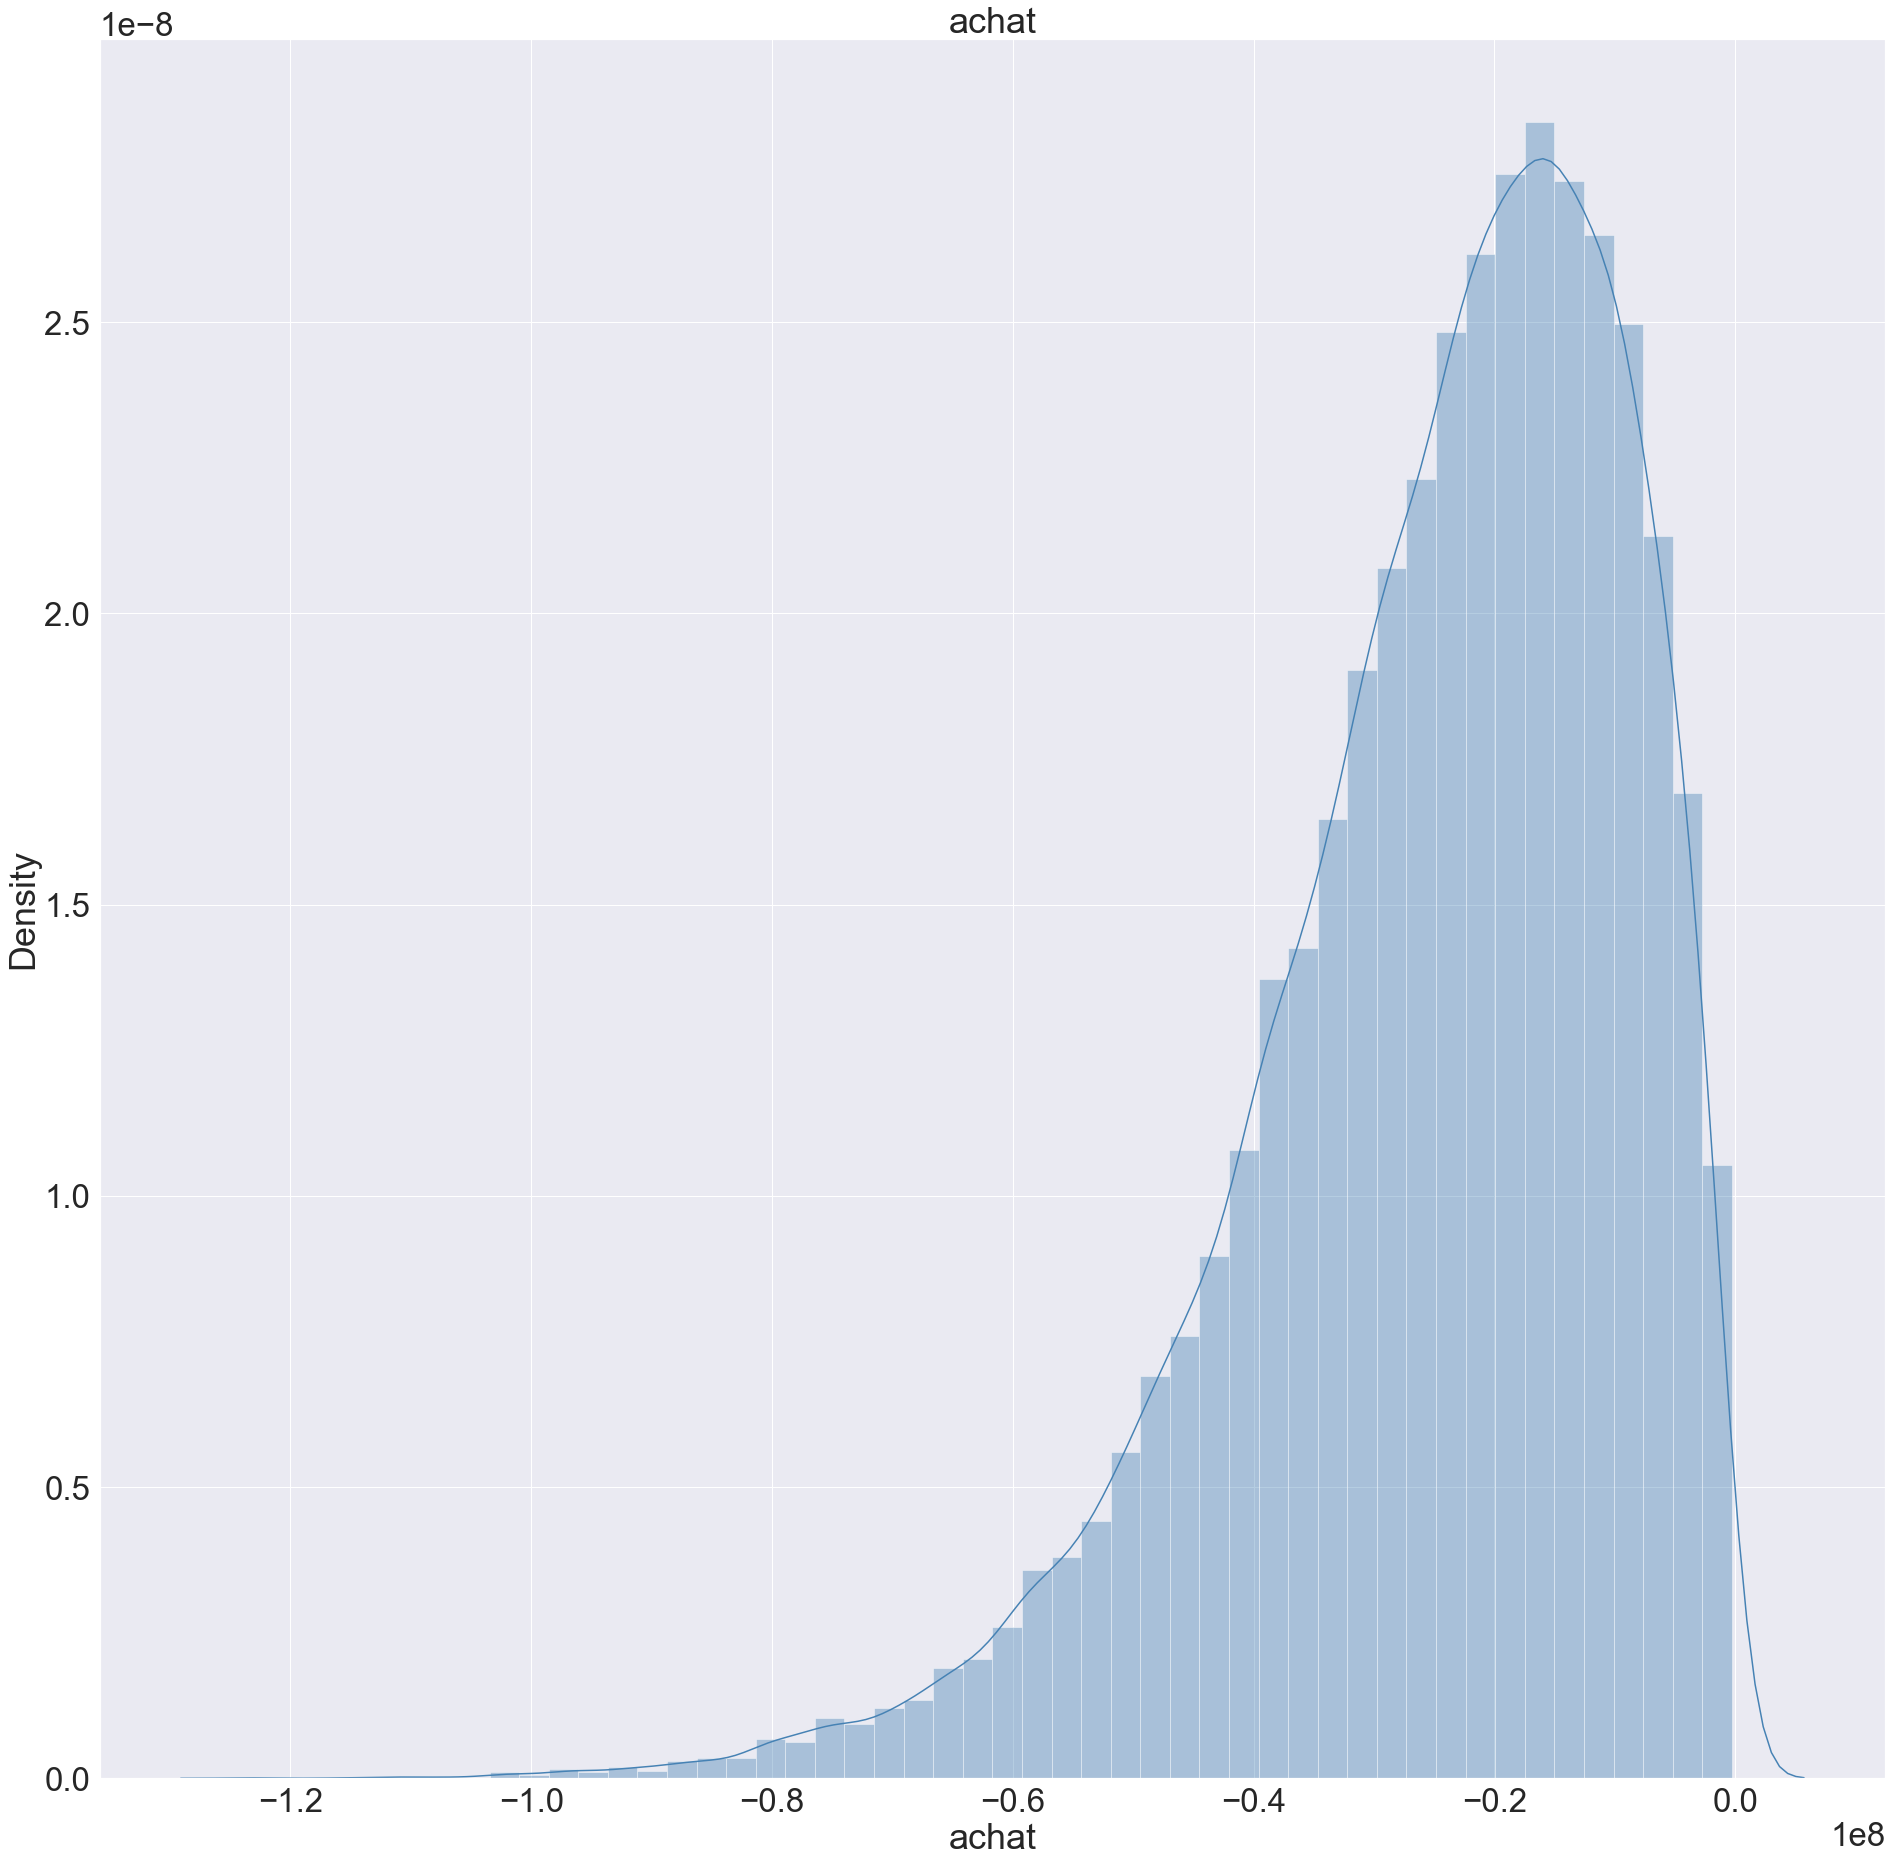

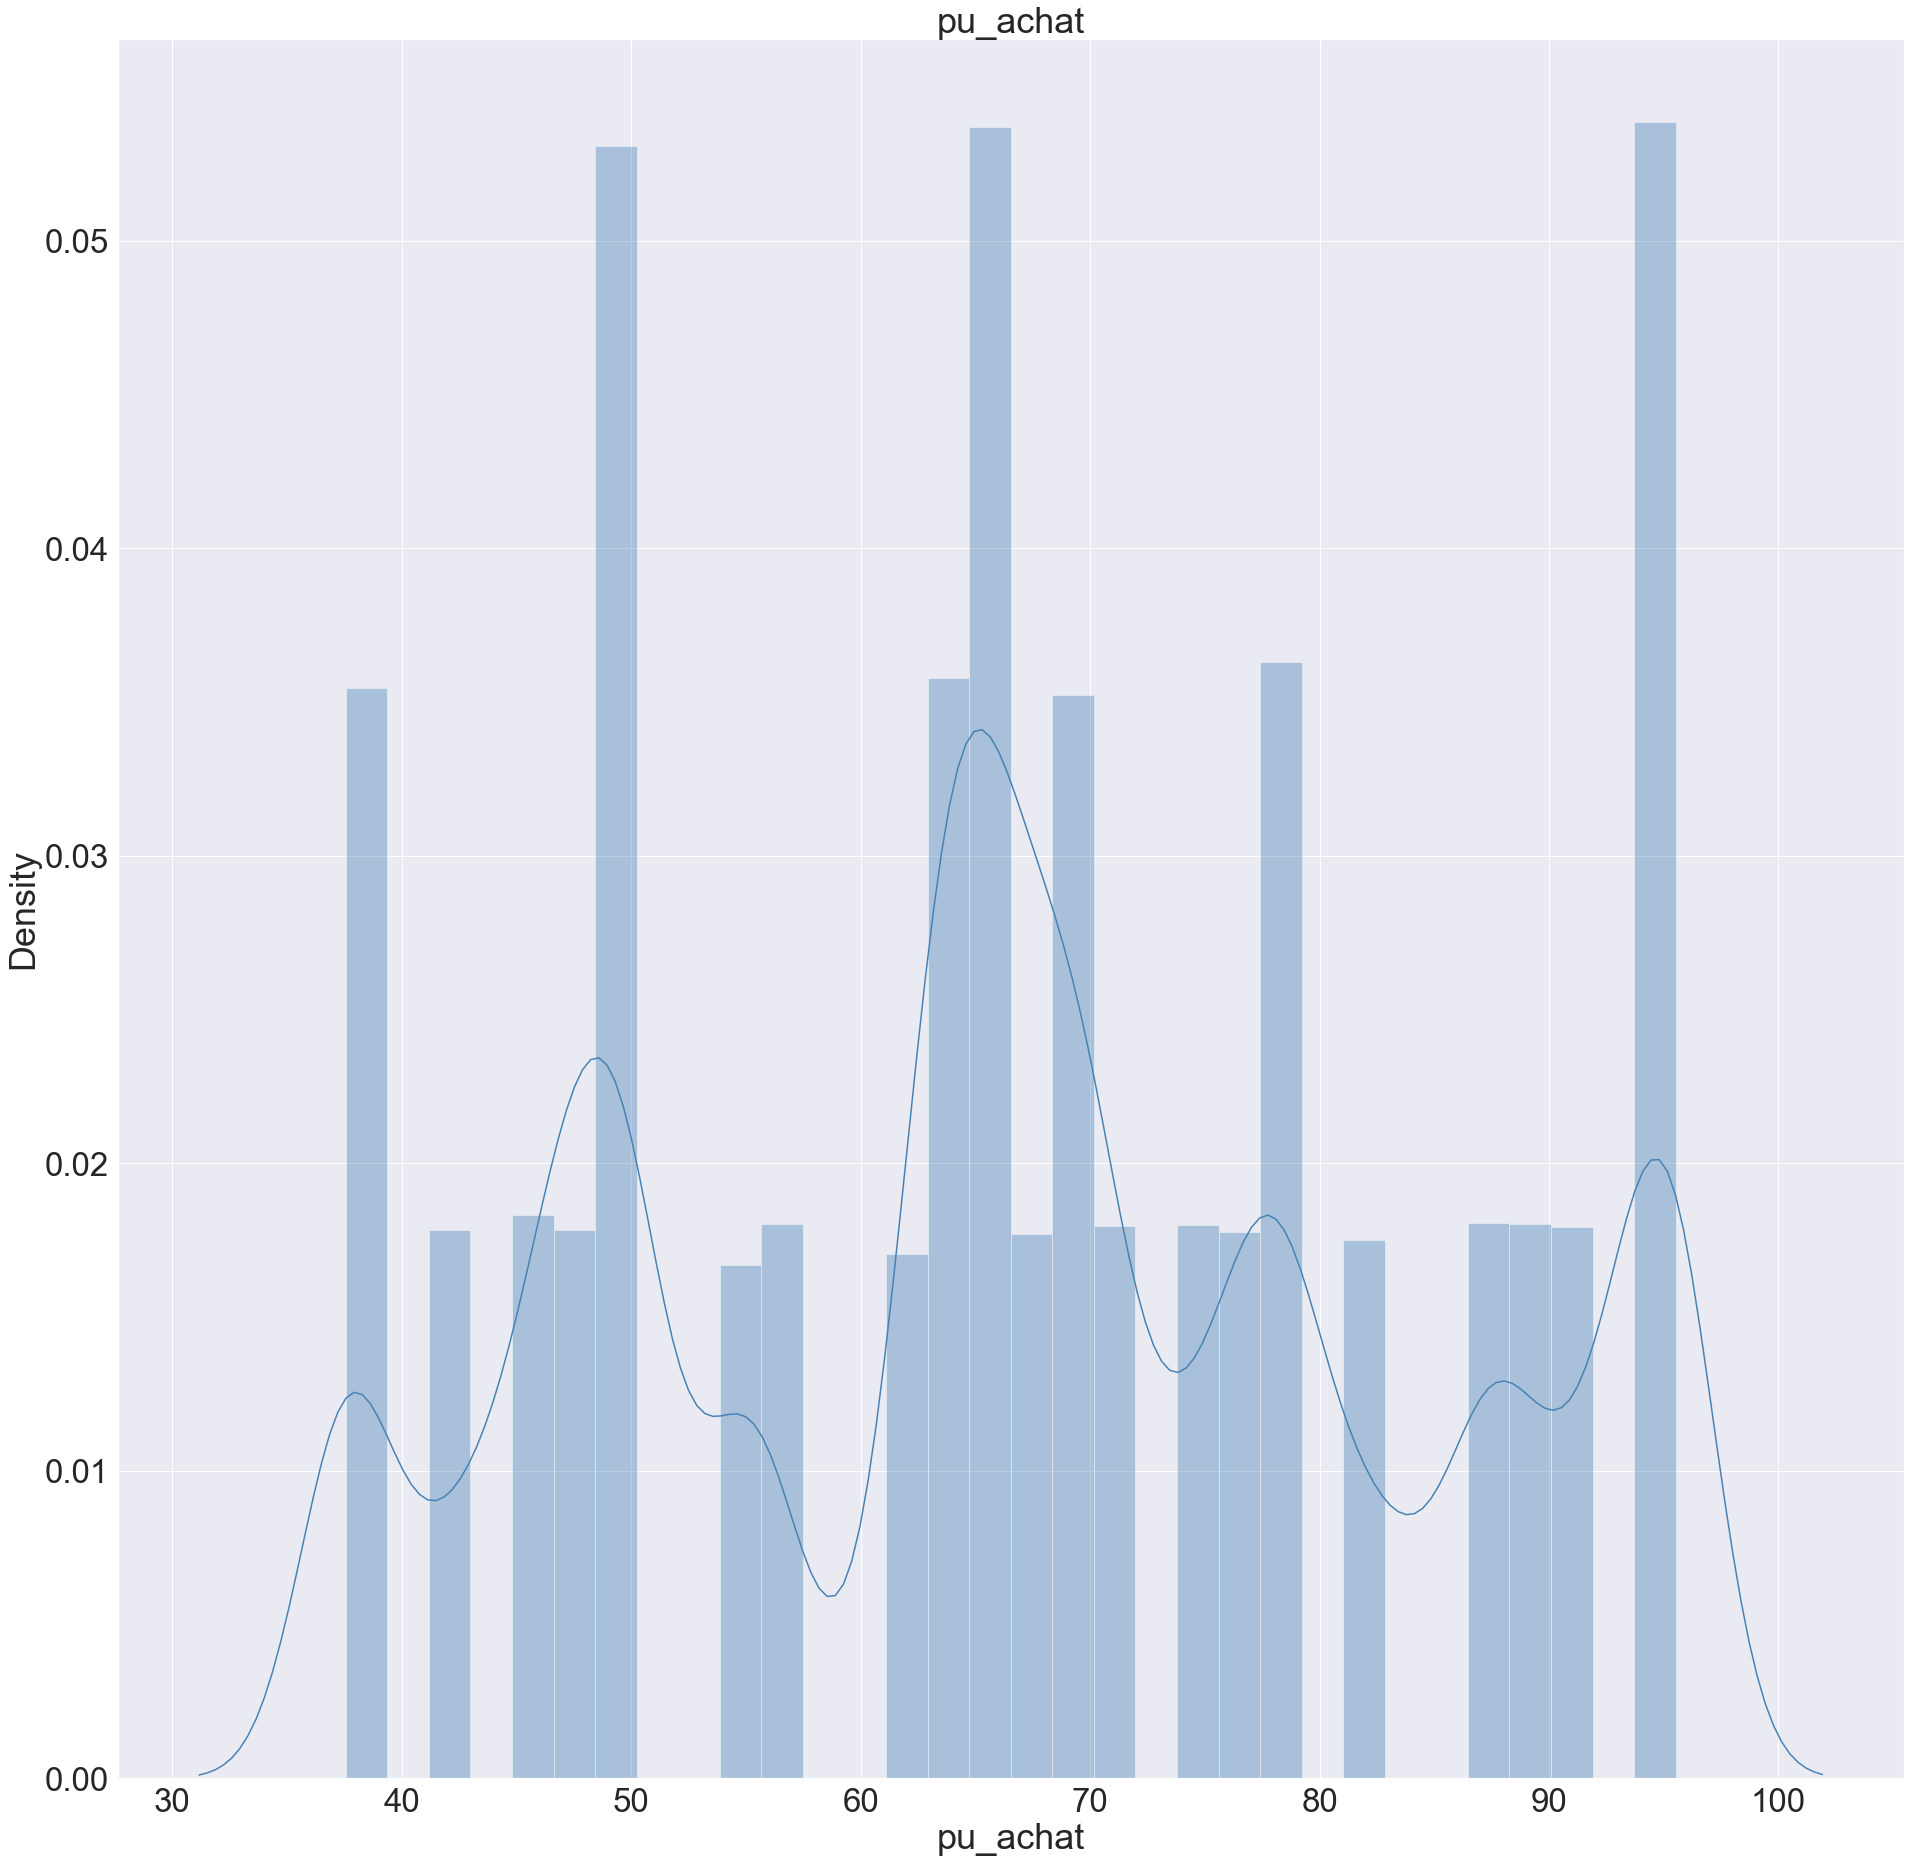

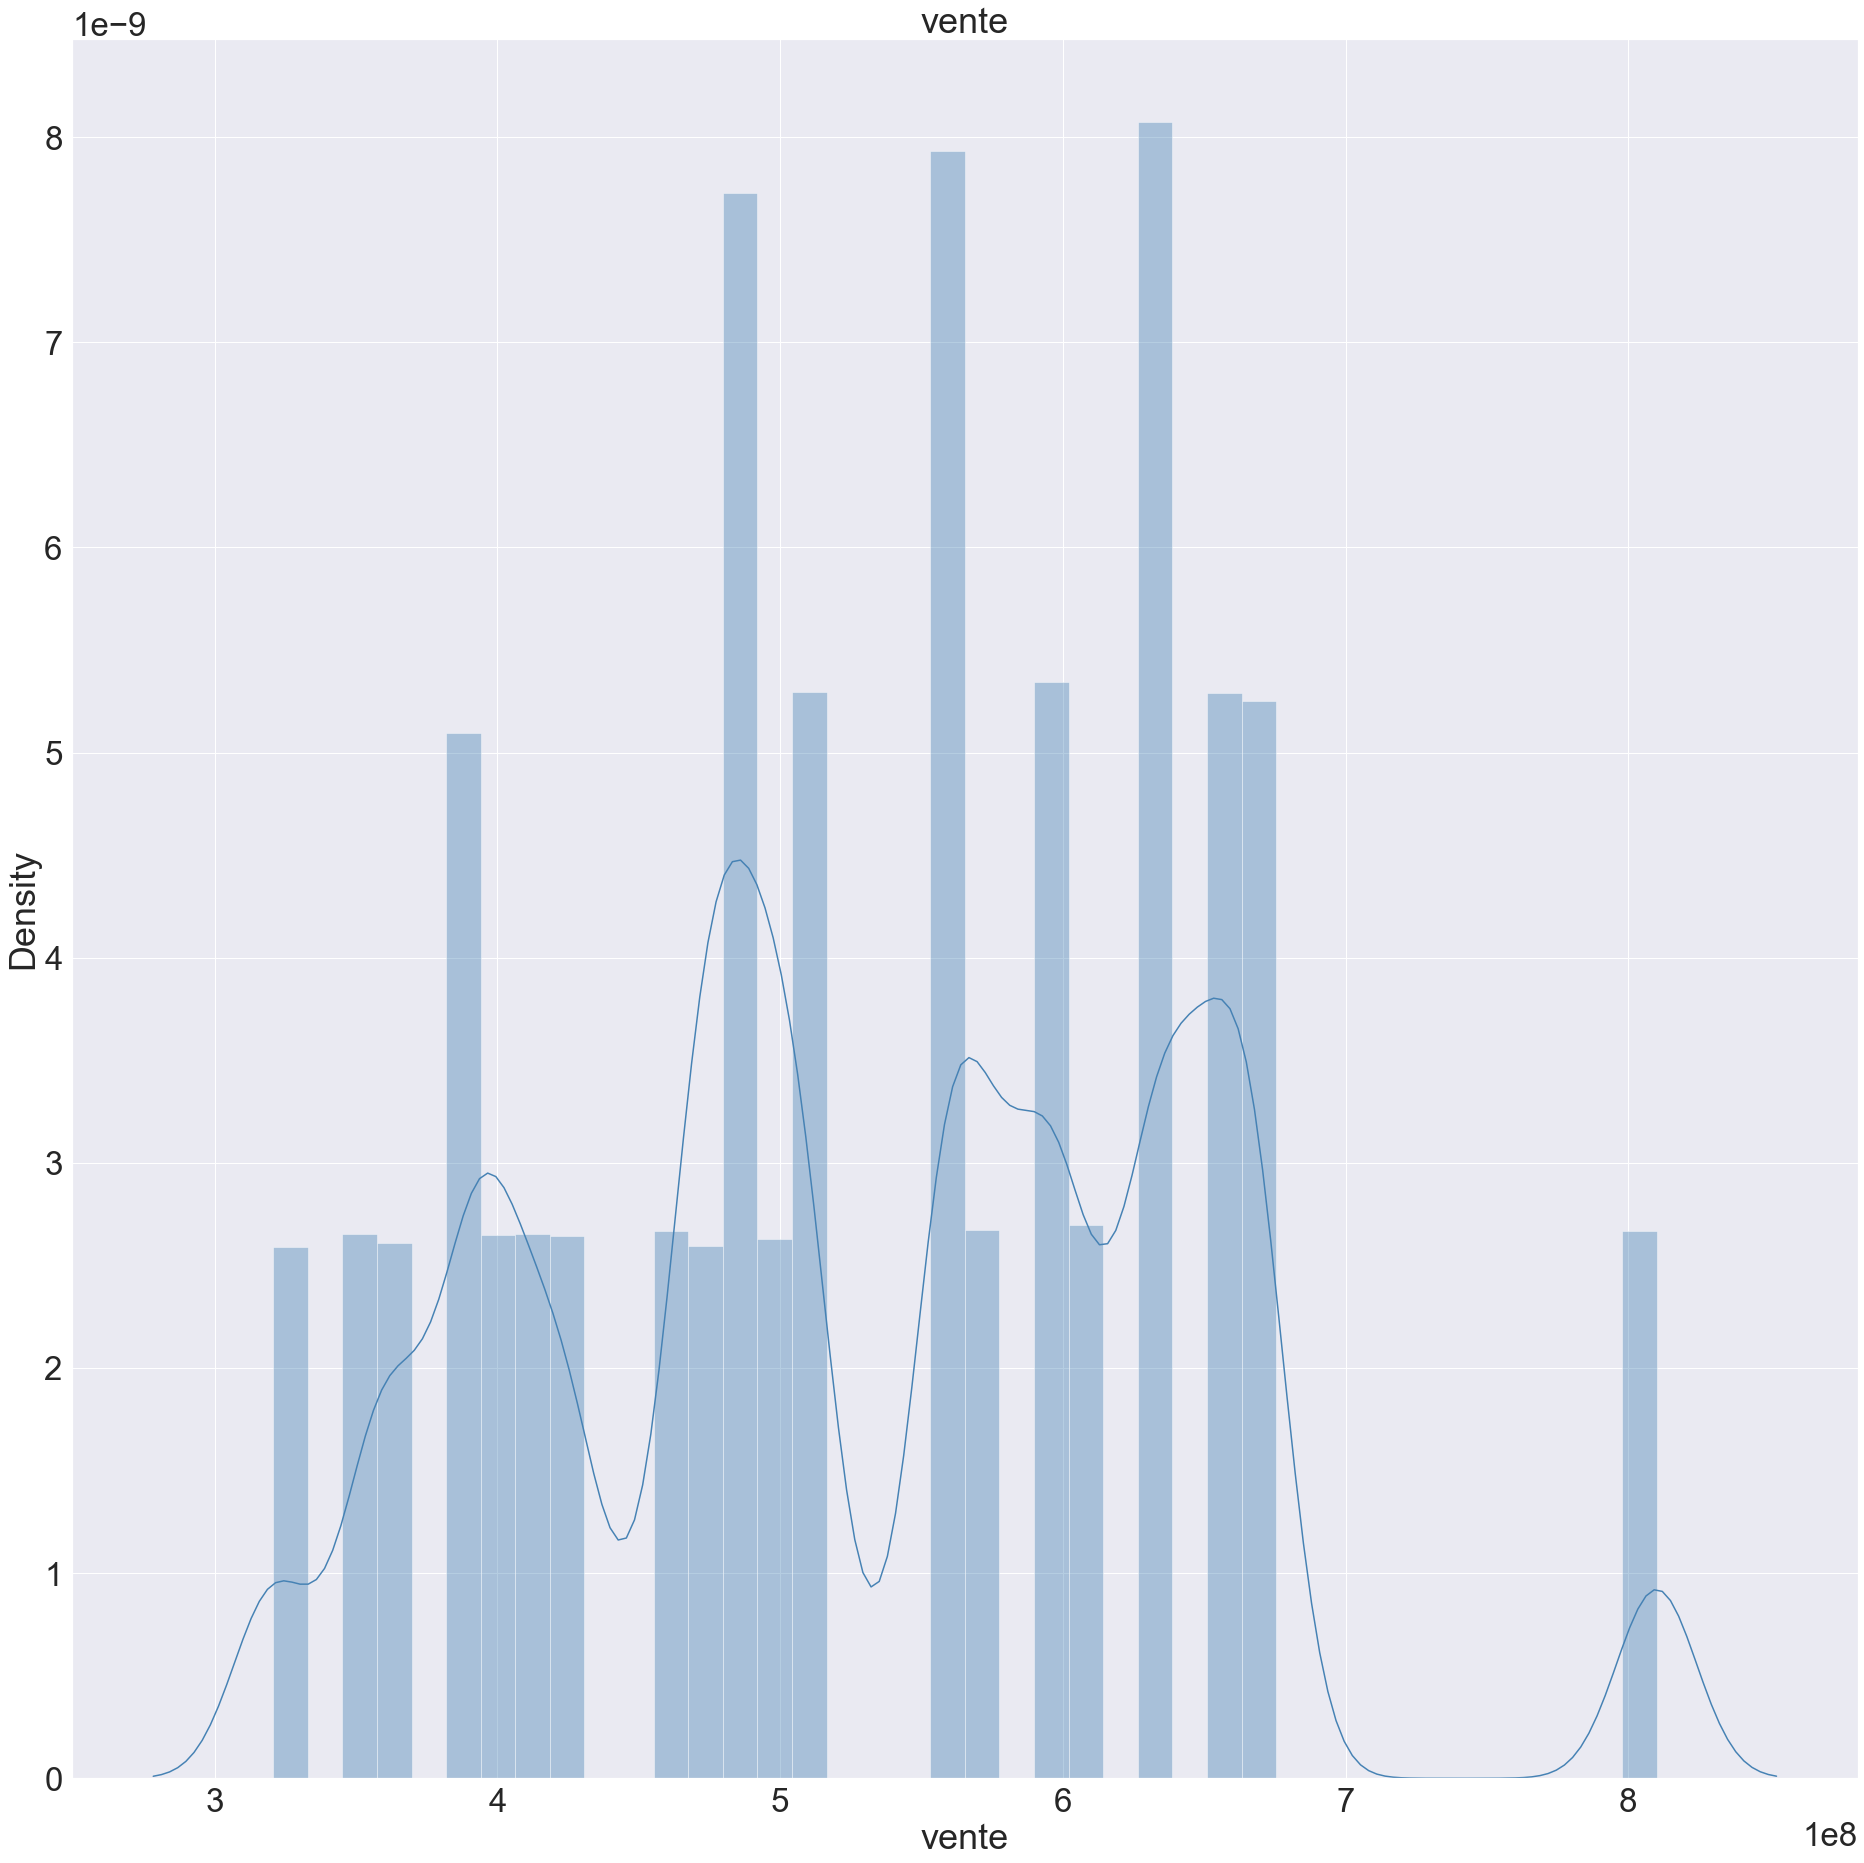

In [105]:
for colonne in ['achat', 'pu_achat', 'vente']:
    plt.figure(figsize=(32,32))
    plt.title(colonne)
    sns.distplot(donnees[colonne], color="steelblue")
    plt.show()

In [106]:
donnees3 = pd.read_csv("donnees/exports.csv", sep=";")
donnees3.head()

Annee  Mois  PRODUIT  DATE_EFFET     ACHAT PU_ACHAT      VENTE PU_VENTE  \
0   2019     4        3  11/04/2019  -1679322    37,56  355306500    37,56   
1   2018    12        3  03/12/2018 -24800422    37,56  355306500    37,56   
2   2018     3        3  08/03/2018  -8725173    37,56  355306500    37,56   
3   2018     6        3  03/06/2018 -36324465    37,56  355306500    37,56   
4   2019    11        3  20/11/2019 -10745227    37,56  355306500    37,56   

   REF_PRODUIT      PRODUIT_1   CATEGORIE     FOURNISSEUR PAYS_FOURNISSEUR  \
0            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
1            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
2            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
3            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   
4            3  Aniseed Syrup  Condiments  Exotic Liquids      Royaume-Uni   

  VILLE_FOURNISSEUR  
0            London  
1            London  
2            London  
3            London  
4            London

In [107]:
donnees3.describe()

Annee           Mois        PRODUIT         ACHAT  \
count  426600.000000  426600.000000  426600.000000  4.266000e+05   
mean     2017.994522       6.533383      60.223931 -2.427270e+07   
std         0.814074       3.446817      33.782670  1.568332e+07   
min      2017.000000       1.000000       2.000000 -1.376332e+08   
25%      2017.000000       4.000000      31.000000 -3.299908e+07   
50%      2018.000000       7.000000      61.000000 -2.145949e+07   
75%      2019.000000      10.000000      89.000000 -1.252020e+07   
max      2019.000000      12.000000     120.000000 -2.266320e+05   

              VENTE    REF_PRODUIT  
count  4.266000e+05  426600.000000  
mean   5.235100e+08      60.223931  
std    1.013531e+08      33.782670  
min    3.169440e+08       2.000000  
25%    4.539087e+08      31.000000  
50%    5.093322e+08      61.000000  
75%    5.997024e+08      89.000000  
max    8.100021e+08     120.000000

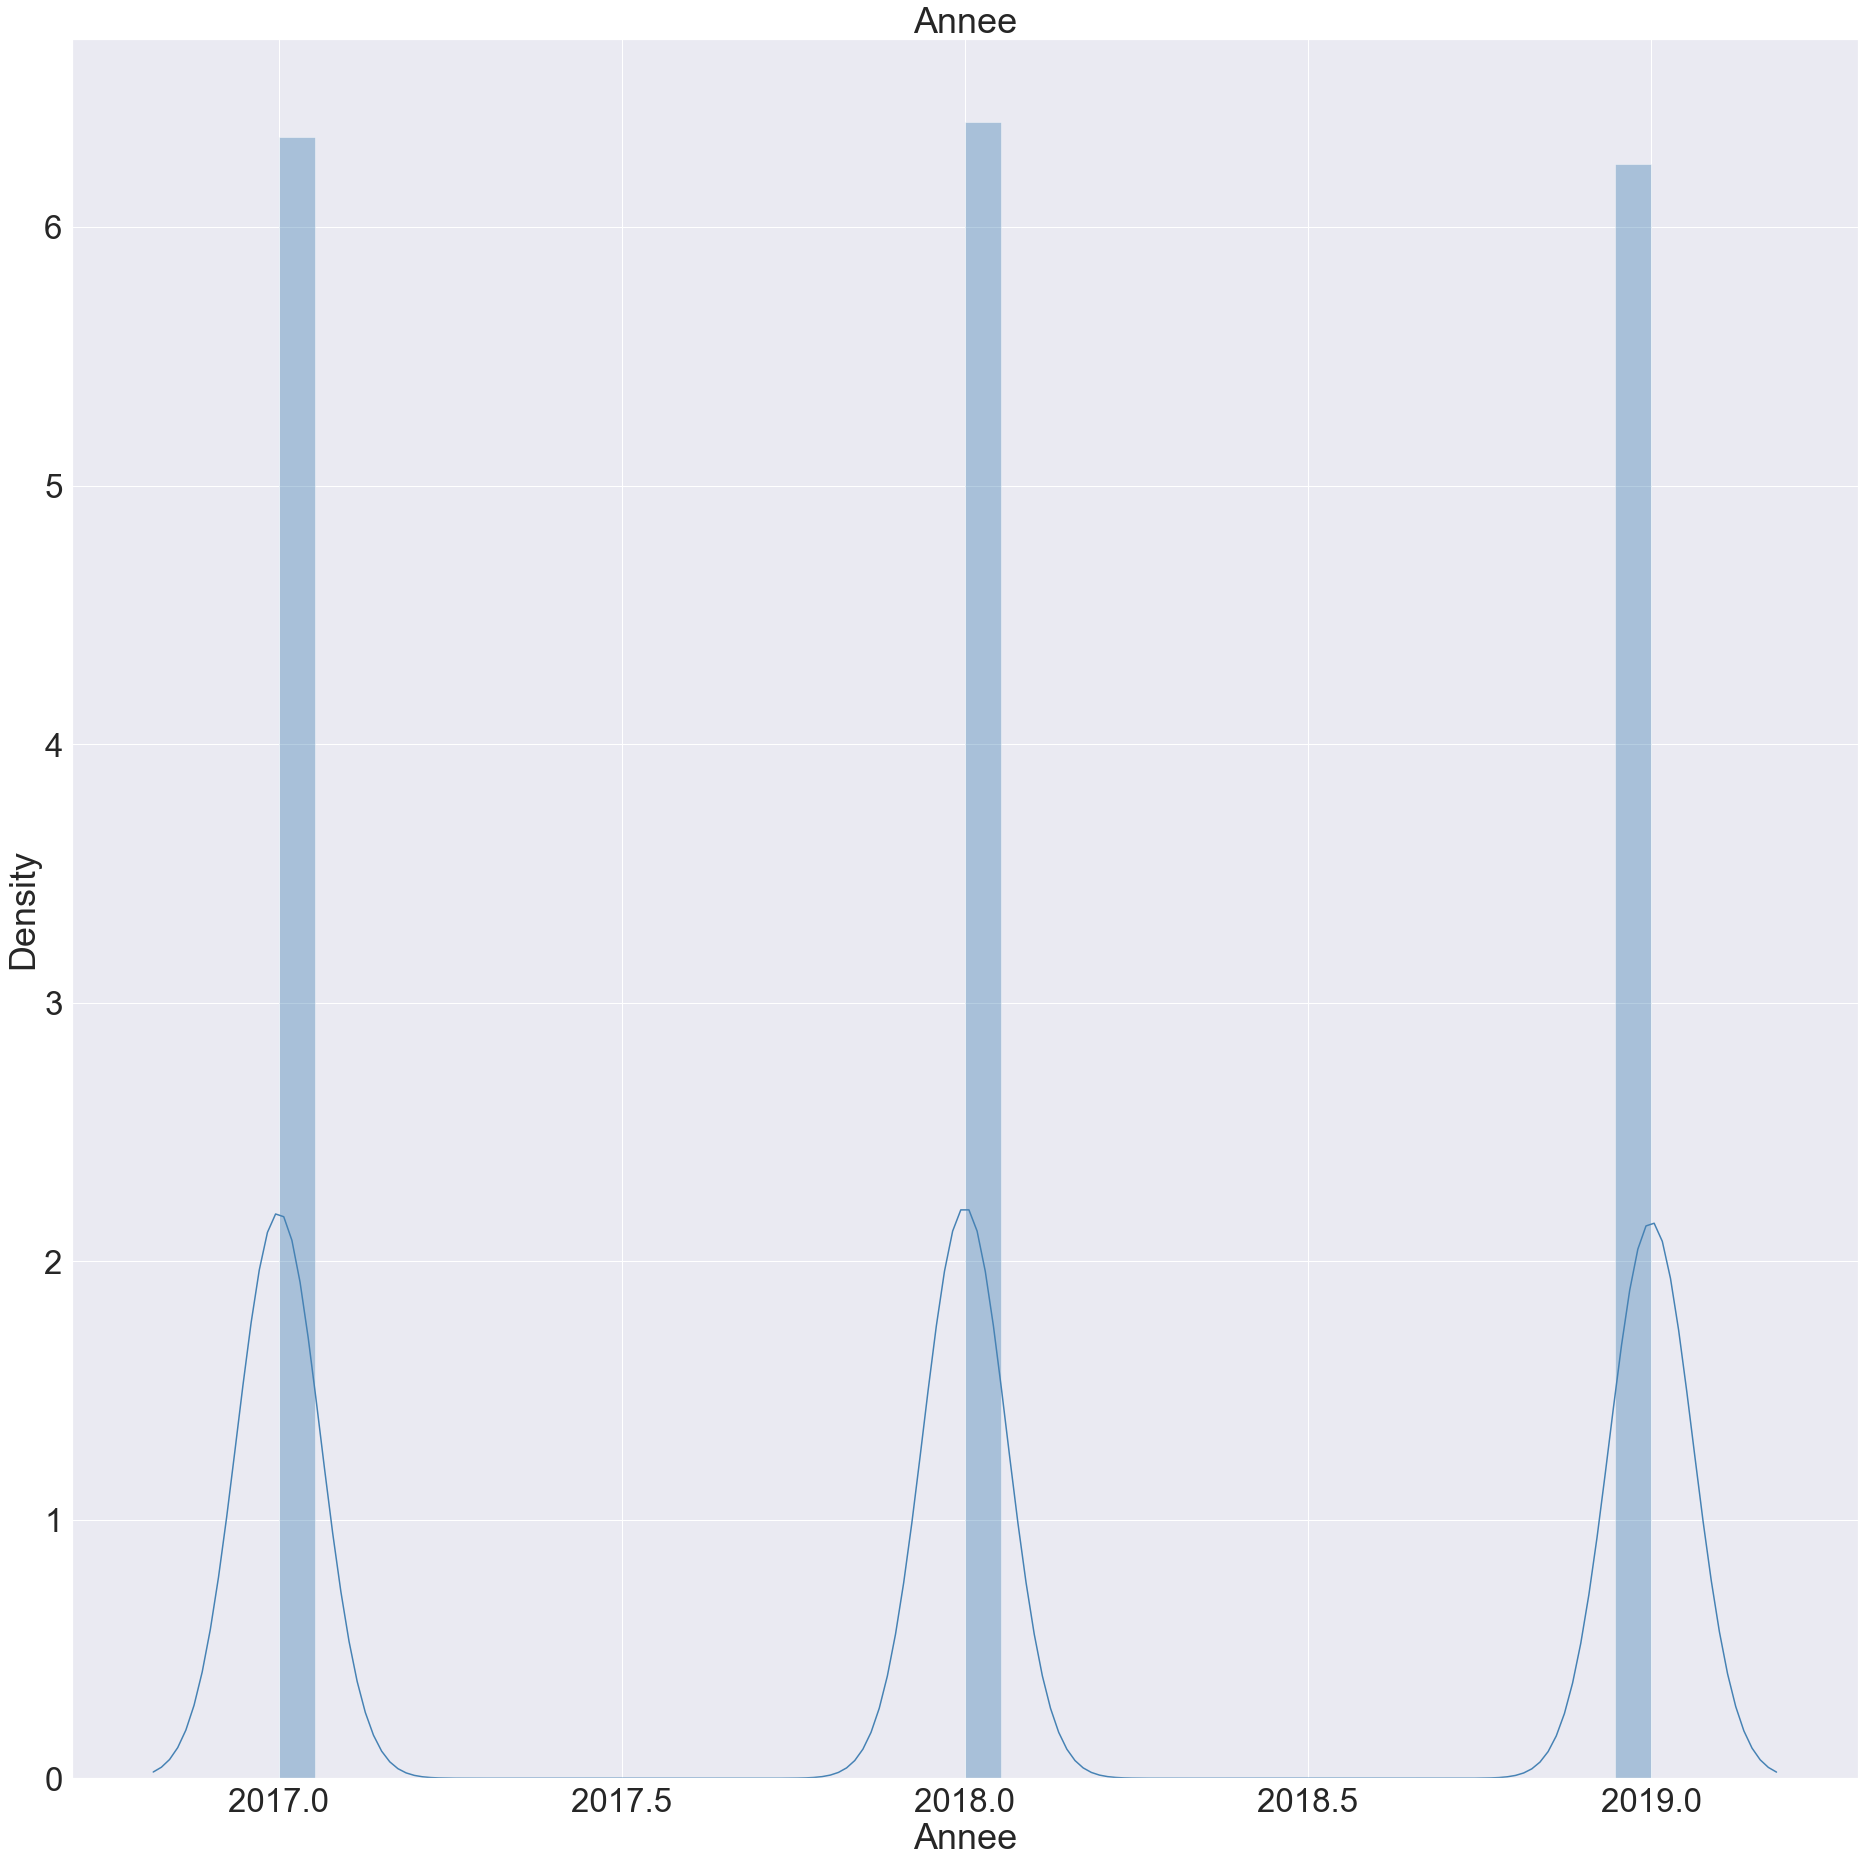

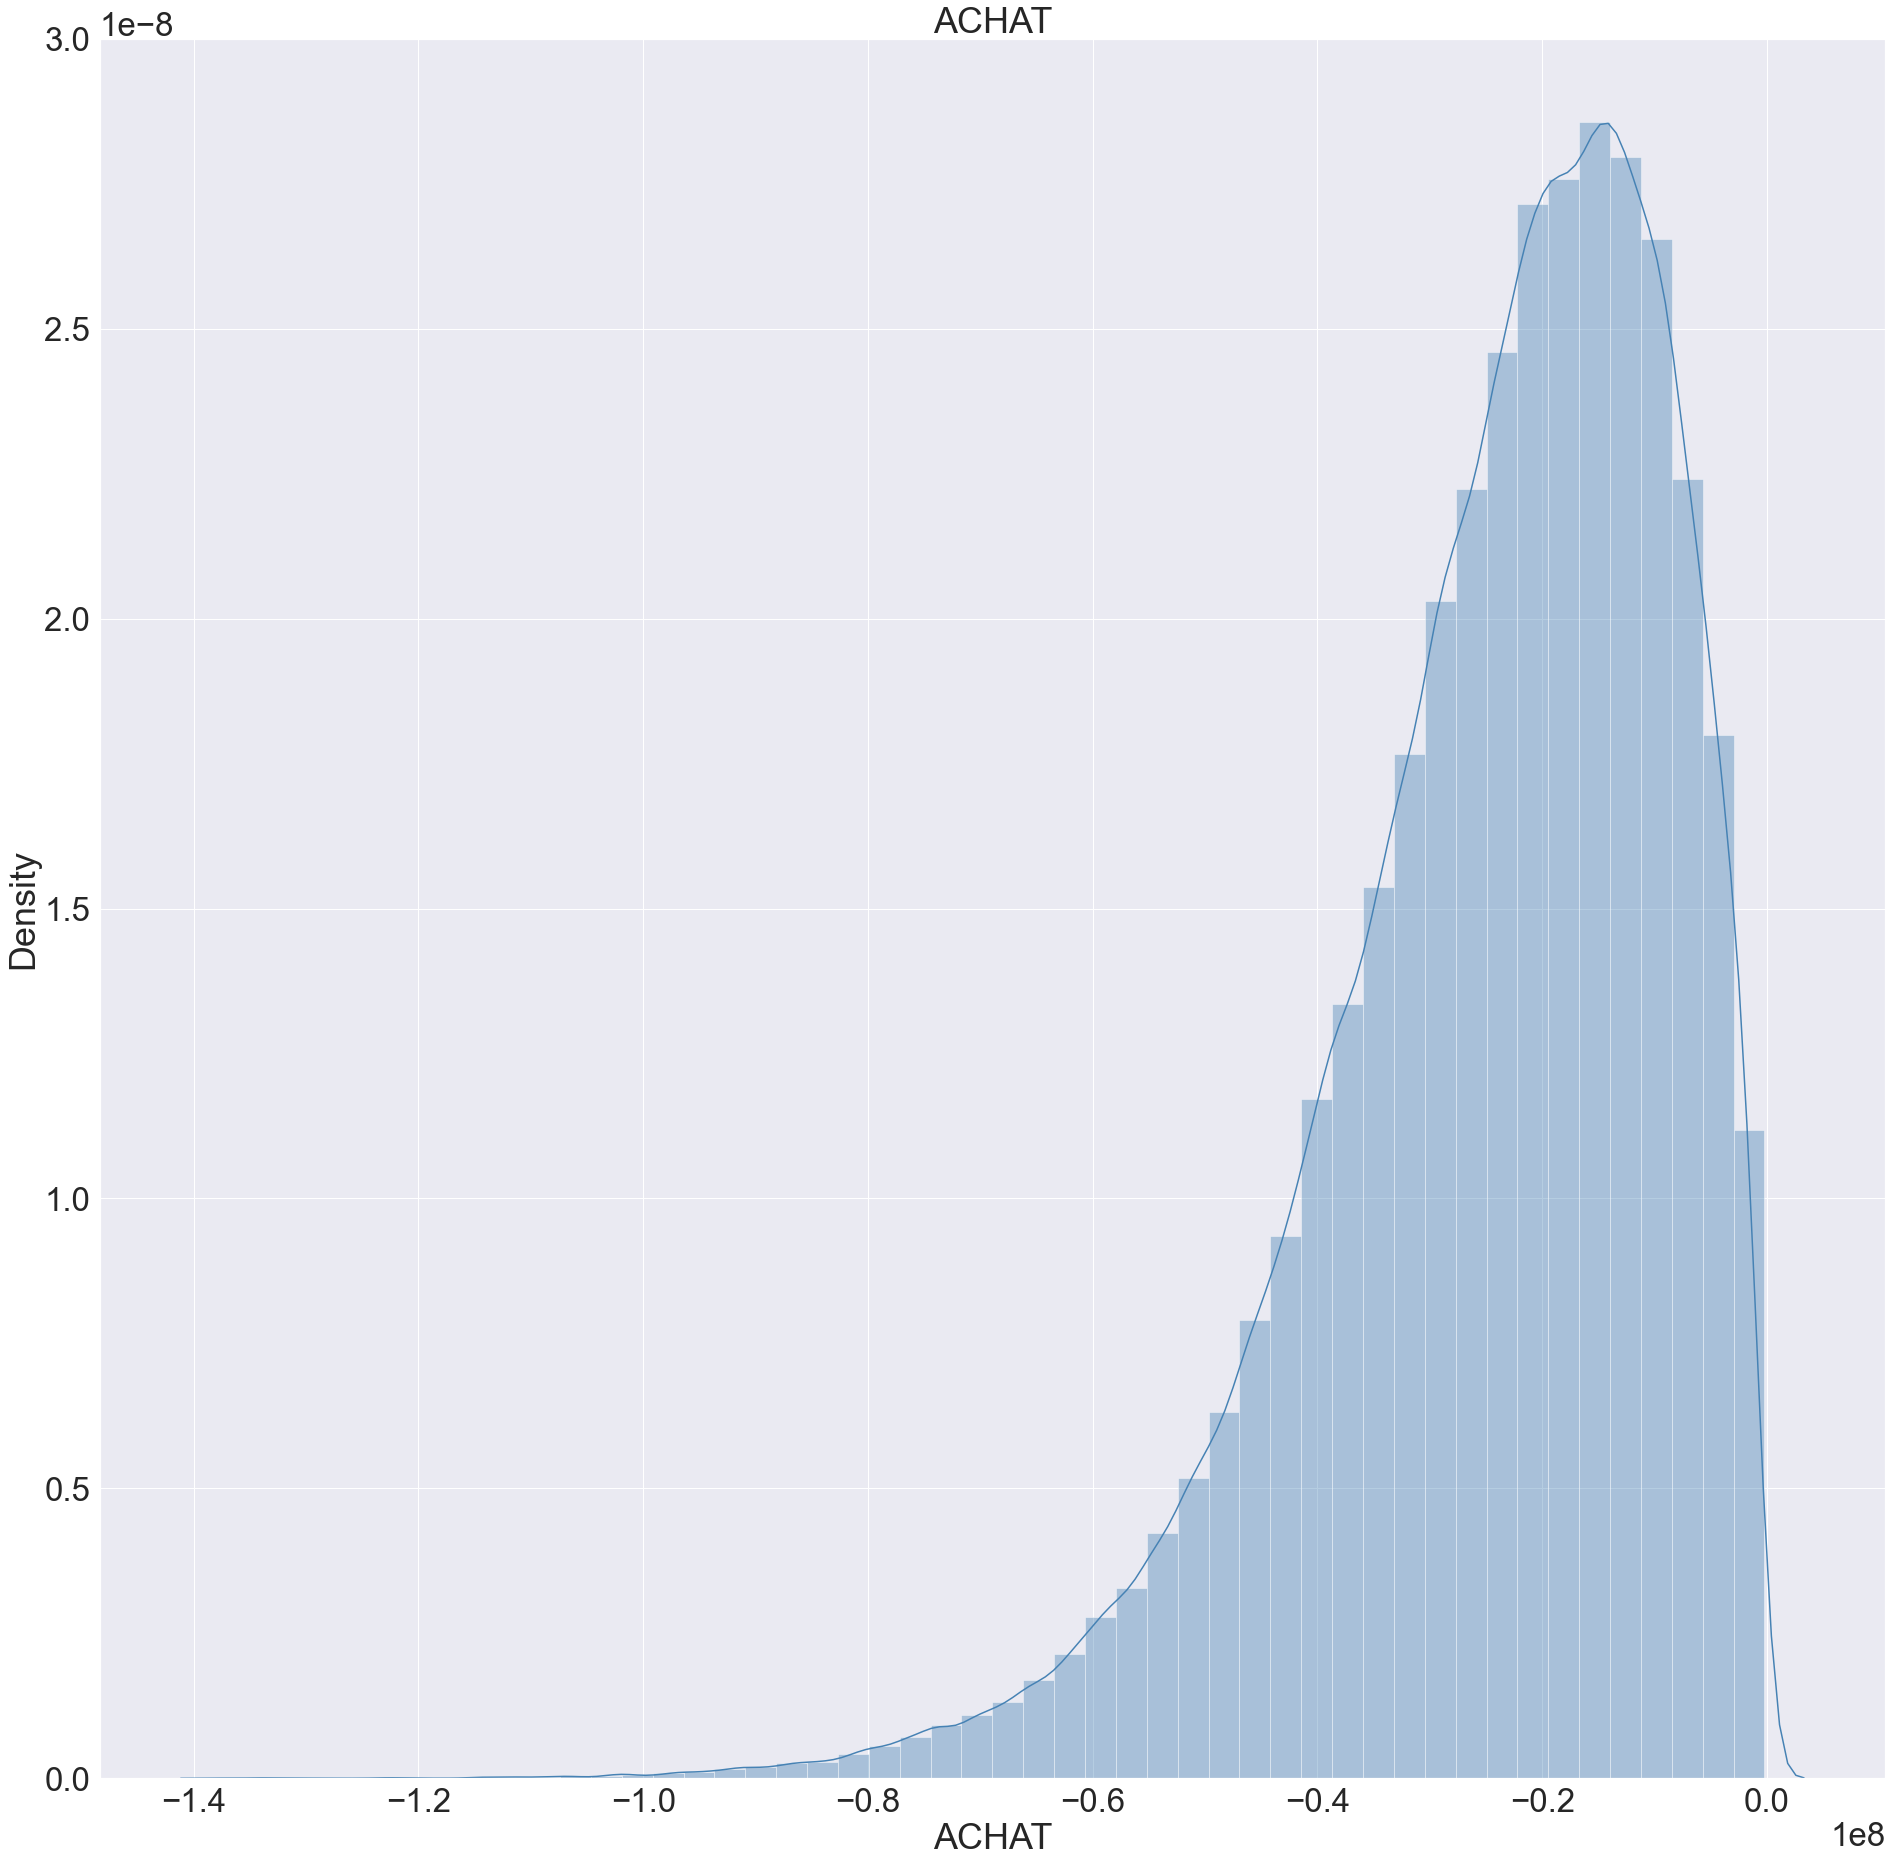

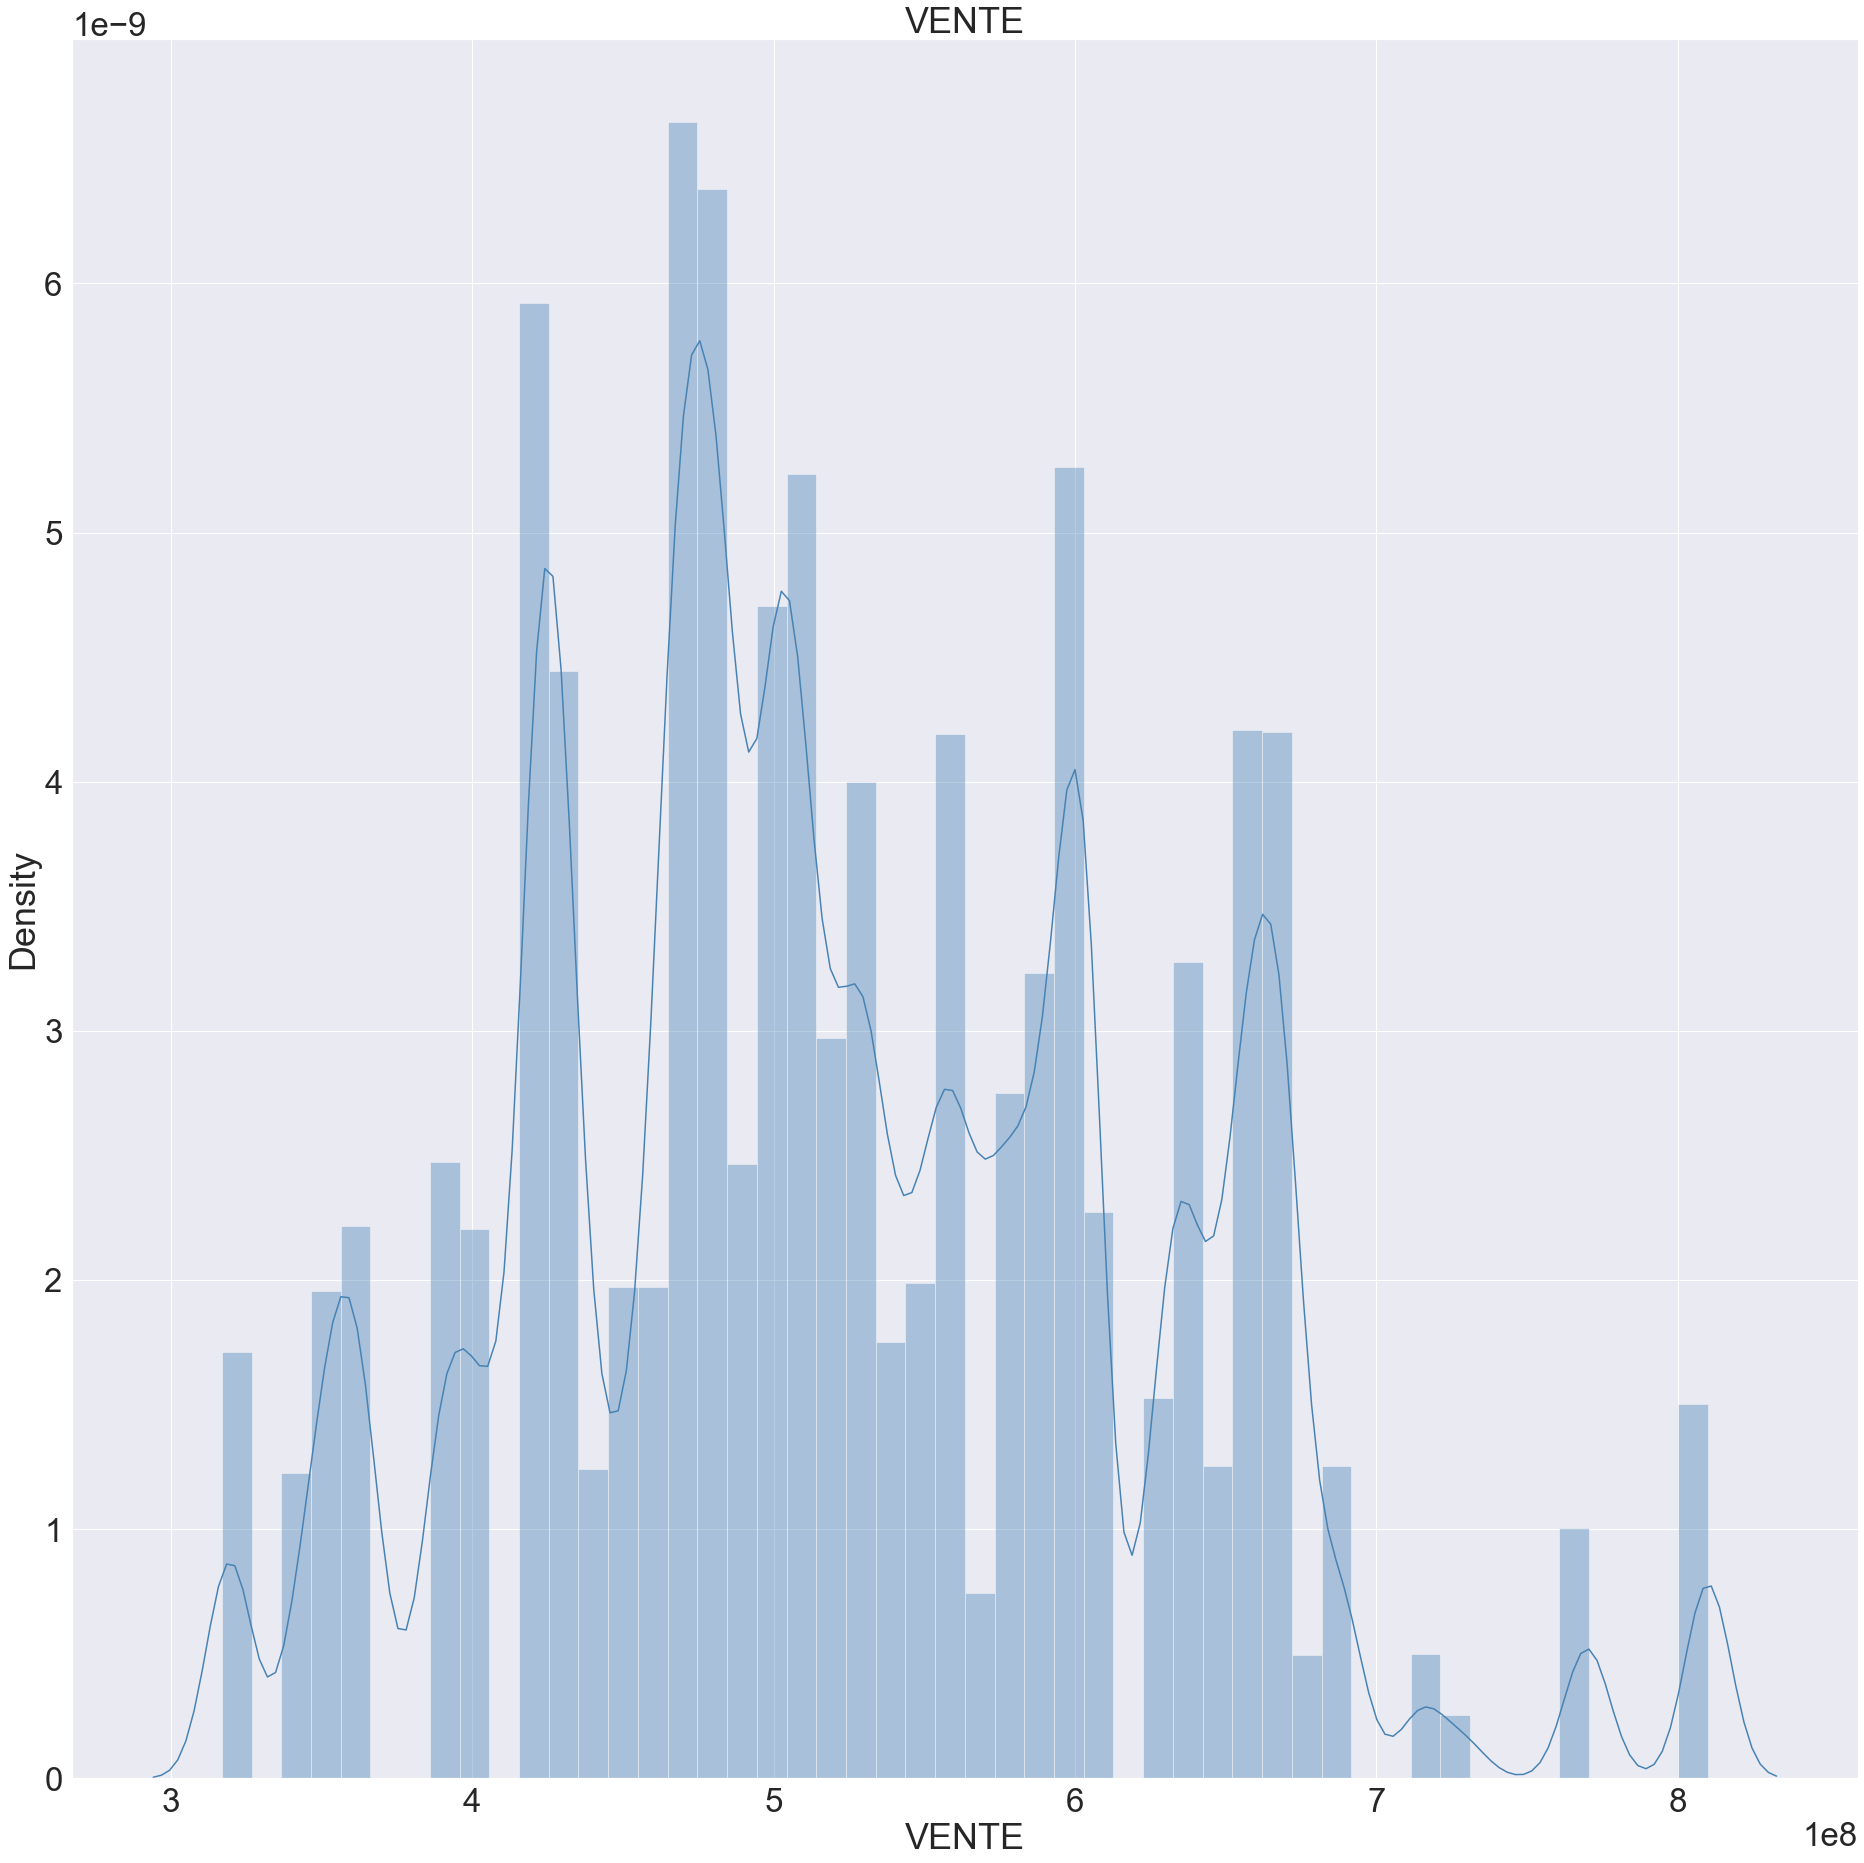

In [121]:
for colonne in ['Annee', 'ACHAT', 'VENTE']:
    plt.figure(figsize=(32,32))
    plt.title(colonne)
    sns.distplot(donnees3[colonne], color="steelblue")
    plt.show()

In [109]:
donnees3.groupby(['PAYS_FOURNISSEUR']).agg({'VENTE':['sum','mean','std']}).head(10)

VENTE                            
                             sum          mean           std
PAYS_FOURNISSEUR                                            
Allemagne         25639571225100  5.130787e+08  8.953552e+07
Australie         17913713325300  5.066812e+08  8.527471e+07
Brésil             1622732389200  5.093322e+08  0.000000e+00
Canada            10677718876800  4.133044e+08  1.098677e+08
Danemark           8590369910700  5.470528e+08  1.140338e+08
Espagne            9118482803700  5.483812e+08  7.958966e+07
Finlande           5112173671200  4.903293e+08  1.049374e+08
France            18050228584200  5.554942e+08  7.185314e+07
Italie            25612861823100  5.467110e+08  9.472226e+07
Japon             32023137401400  5.355667e+08  1.110671e+08

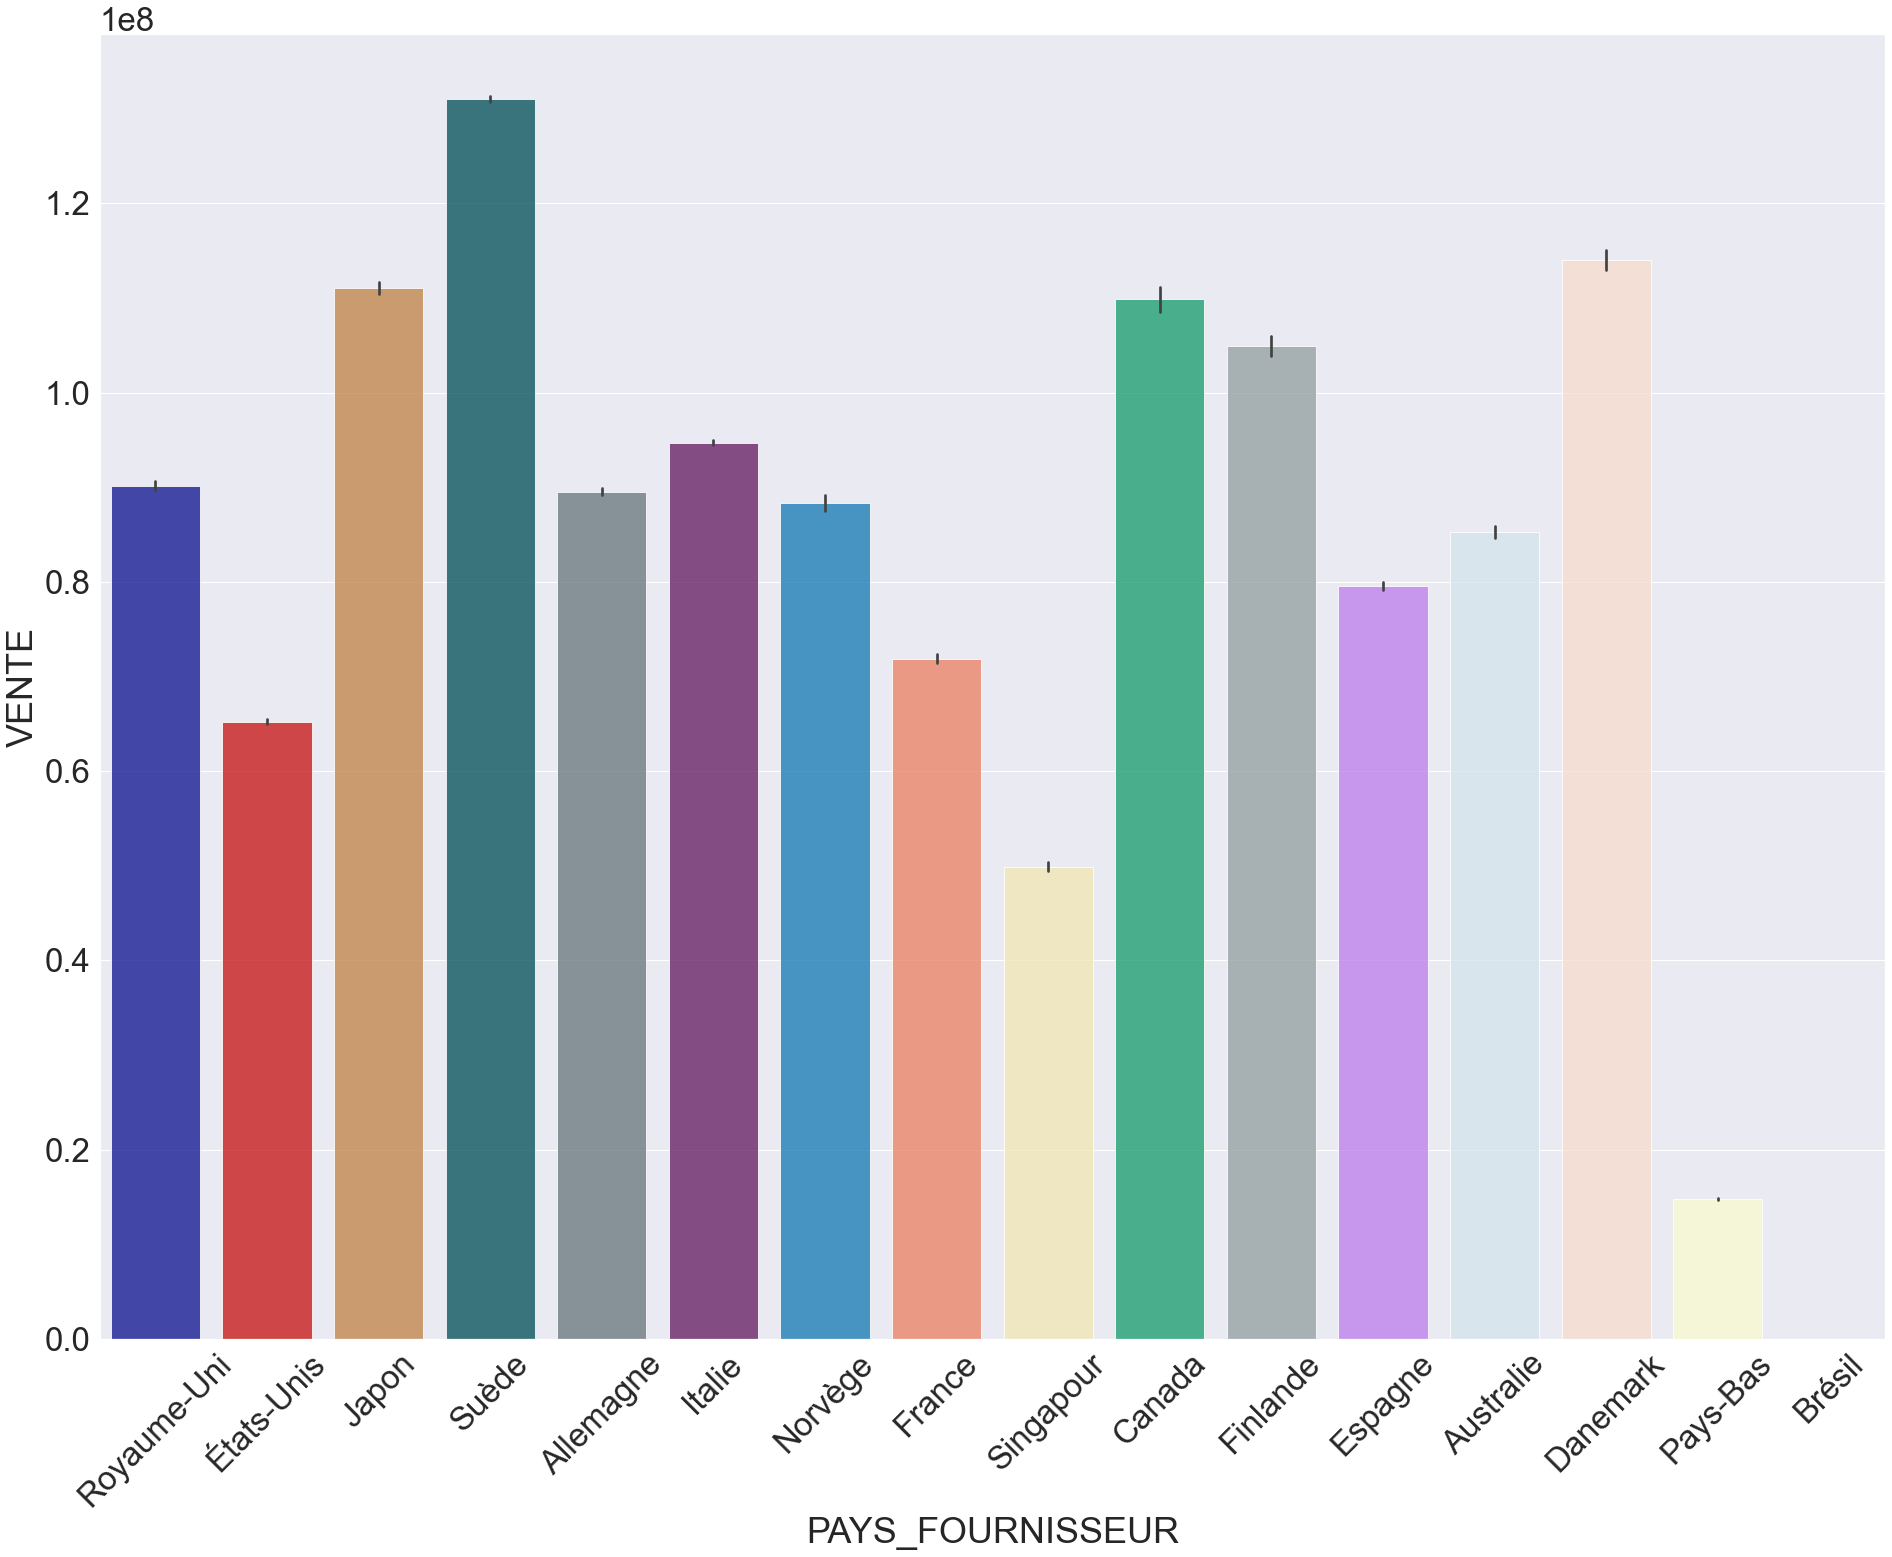

In [110]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='PAYS_FOURNISSEUR',y='VENTE',data=donnees3, palette=palette, alpha=0.8, estimator=np.std)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

In [113]:
donnees3.groupby(['FOURNISSEUR']).agg({'VENTE':['sum','mean','std']}).head(10)

VENTE                            
                                               sum          mean           std
FOURNISSEUR                                                                   
Aux joyeux ecclésiastiques           5875517365800  5.627890e+08  5.079725e+07
Bigfoot Breweries                    8666286104700  5.515361e+08  6.035247e+07
Cooperativa de Quesos 'Las Cabras'   9118482803700  5.483812e+08  7.958966e+07
Escargots Nouveaux                   6574767295200  5.261498e+08  9.375372e+07
Exotic Liquids                       2257345440900  4.340214e+08  3.956926e+07
Formaggi Fortini s.r.l.             19761674363700  5.756386e+08  8.600063e+07
Forêts d'érables                     5191196925600  3.603496e+08  4.627491e+06
G'day, Mate                          6237519855300  5.070742e+08  3.356865e+07
Gai pâturage                         5599943923200  5.858908e+08  3.368772e+07
Grandma Kelly's Homestead            5105043373500  4.927648e+08  1.528954e+07

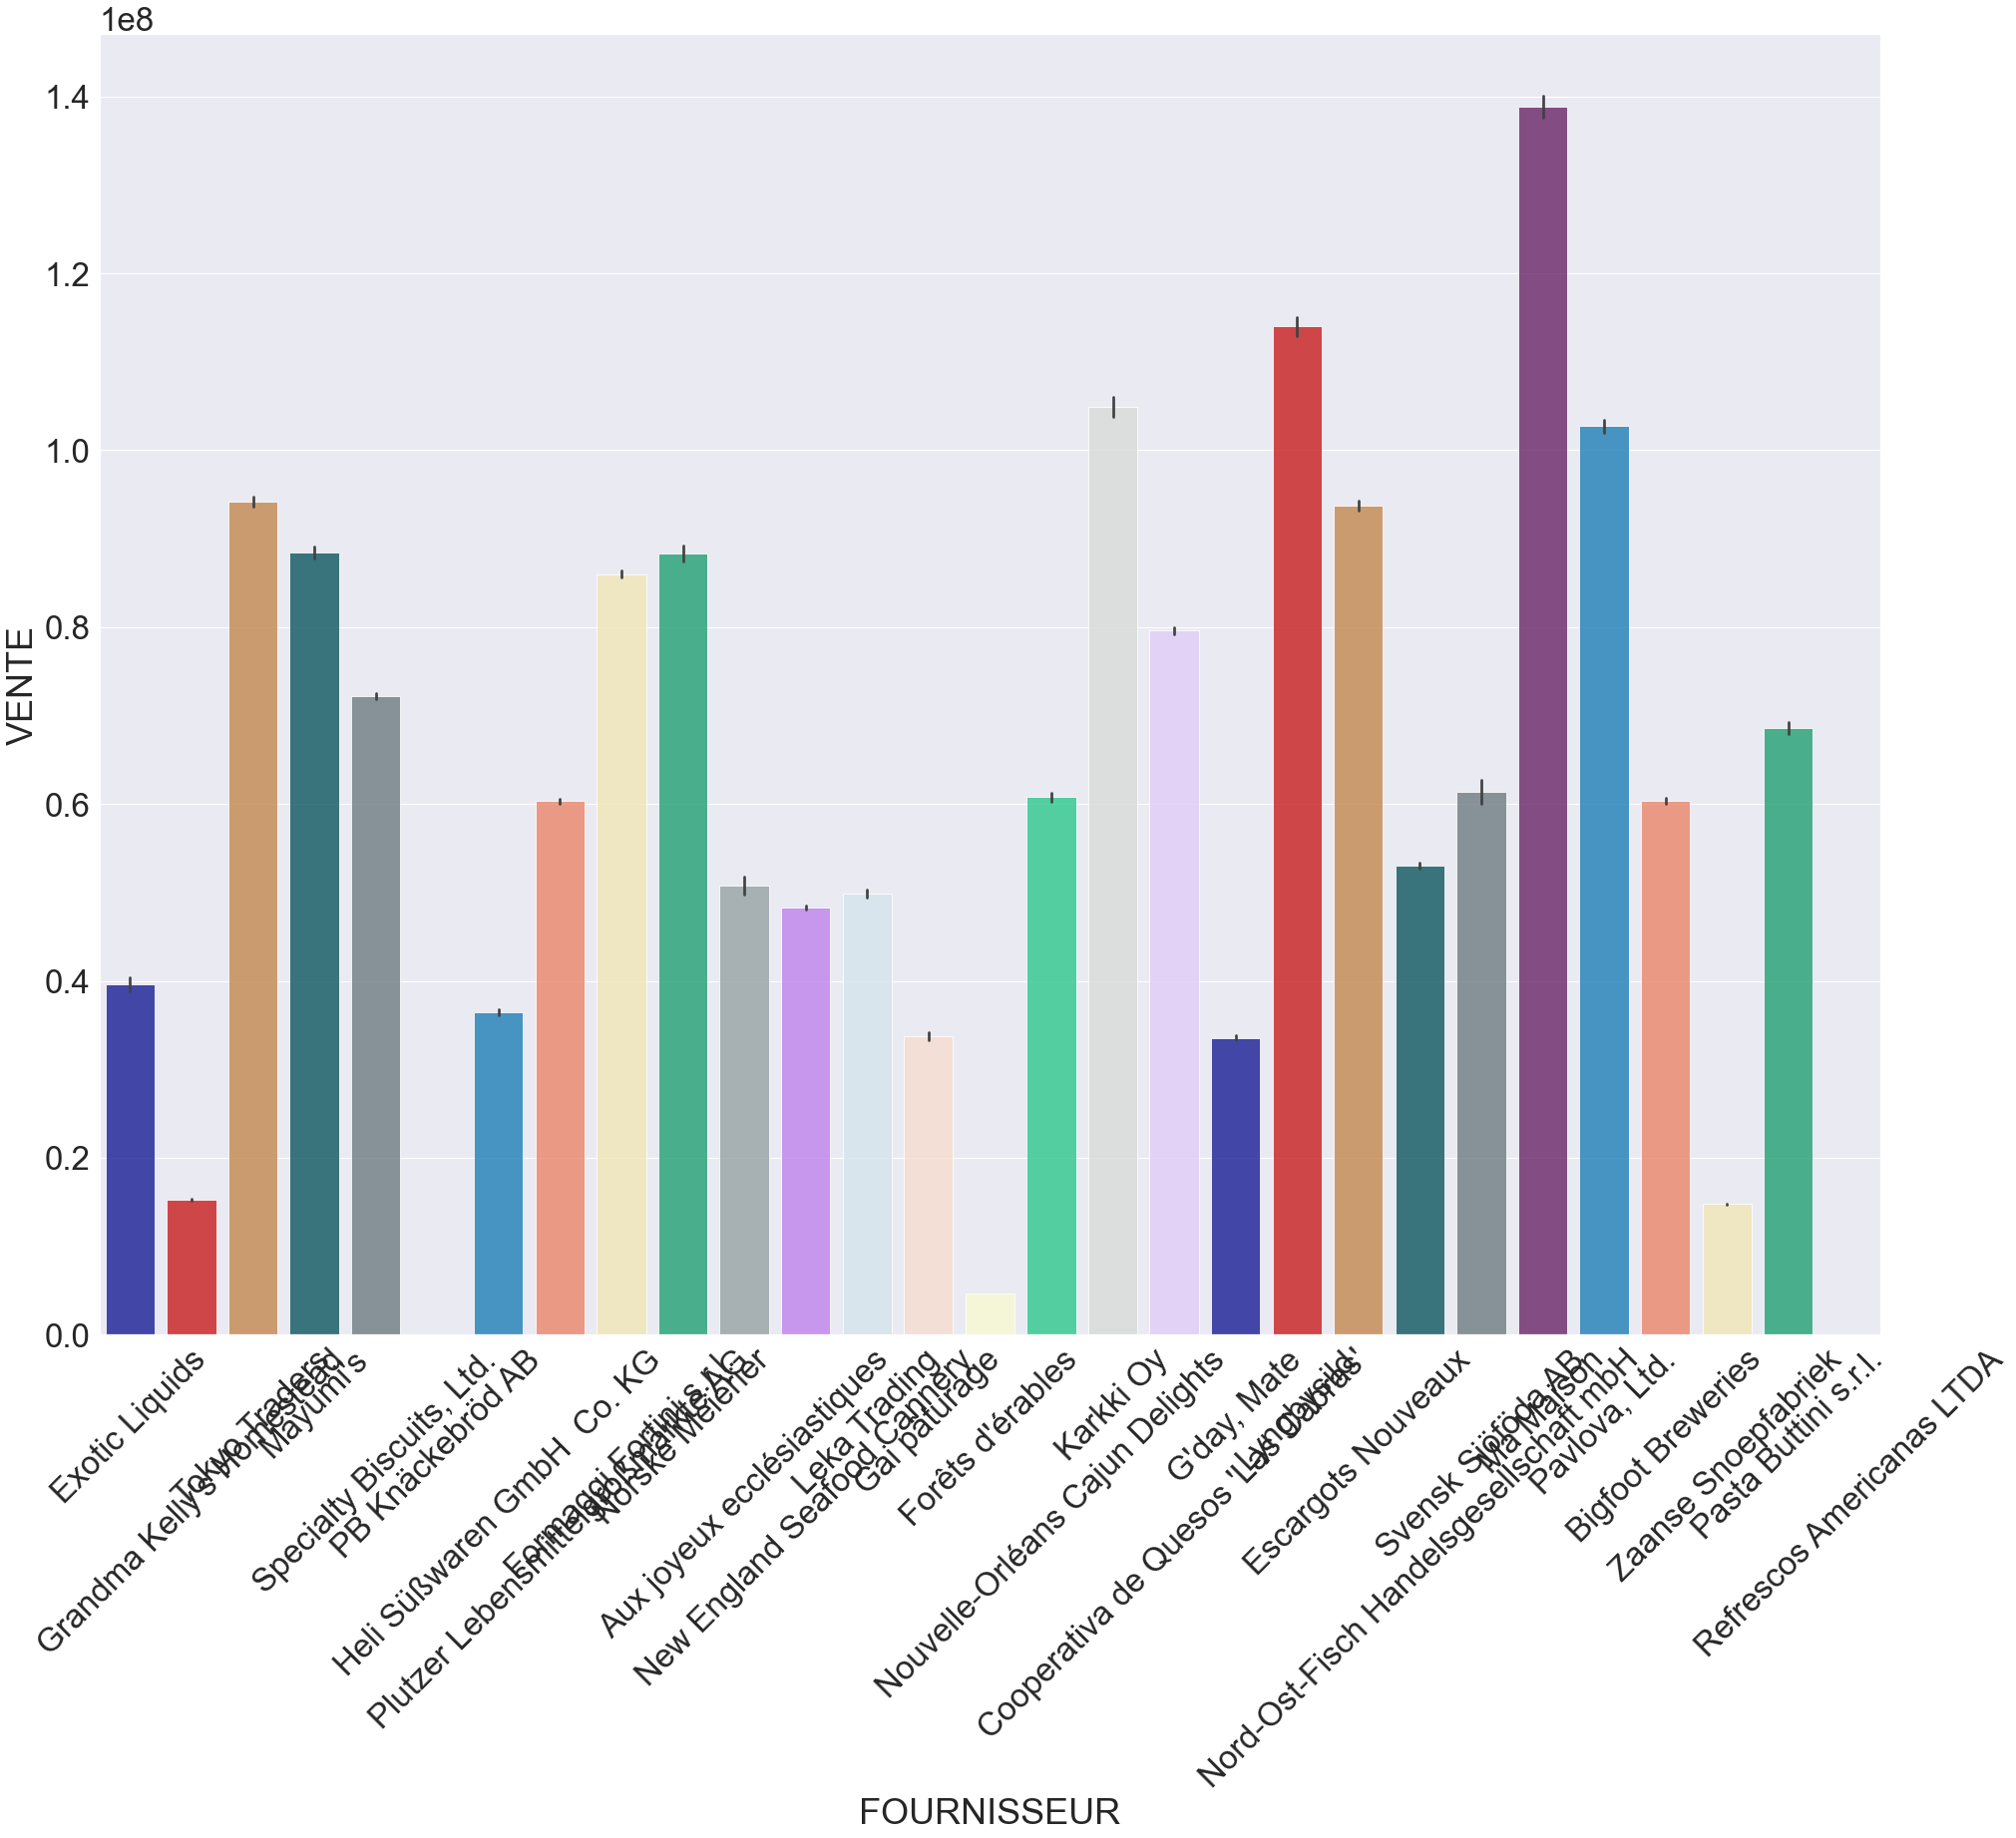

In [118]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='FOURNISSEUR',y='VENTE',data=donnees3, palette=palette, alpha=0.8, estimator=np.std)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

In [117]:
d=donnees3.groupby(['Annee','CATEGORIE']).agg({'PU_VENTE':['sum']}).reset_index()
d.columns=['Annee','CATEGORIE','PU_VENTE']
d.head()

Annee                  CATEGORIE  \
0   2017                   Boissons   
1   2017                 Condiments   
2   2017                  Conserves   
3   2017                   Desserts   
4   2017  Poissons et fruits de mer   

                                            PU_VENTE  
0  64,9264,9264,9264,9264,9264,9264,9264,9264,926...  
1  37,5637,5637,5637,5637,5637,5637,5637,5637,563...  
2  62,1662,1662,1662,1662,1662,1662,1662,1662,166...  
3  95,1695,1695,1695,1695,1695,1695,1695,1695,169...  
4  74,0474,0474,0474,0474,0474,0474,0474,0474,047...

# Analyse vente


















In [4]:
donneesve = pd.read_csv("donnees/exportve.csv", sep=";")
donneesve.head()

ANNEE  MOIS                        PRODUIT          CATEGORIE  \
0   2019    10  Singaporean Hokkien Fried Mee  Pâtes et céréales   
1   2019    10        Thüringer Rostbratwurst            Viandes   
2   2019    12             Mascarpone Fabioli  Produits laitiers   
3   2019    12                   Tomato Sauce         Condiments   
4   2019    12                     Hot Cereal  Pâtes et céréales   

                         FOURNISSEUR CLIENT         ACHETEUR  VENDEUR  LIVREE  \
0                       Leka Trading  FURIB   Gates Gertrude      107       1   
1  Plutzer Lebensmittelgroßmärkte AG  FURIB   Gates Gertrude      107       1   
2            Formaggi Fortini s.r.l.  FURIB  Simmons Horatio       65       1   
3                  Bigfoot Breweries  FURIB    Riffken Angie       65       1   
4         Aux joyeux ecclésiastiques  FURIB  Snowden Calvert       65       1   

   ACQUITEE  RETOURNE  ECHANGE  PORT  QUANTITE  PRIX_UNITAIRE  REMISE    CA  
0         1         0        0    83        30             71      10  1849  
1         1         0        0    83        91             87      10  7041  
2         1         0        0    64        23             56       5  1160  
3         1         0        0    64       172             56       5  9113  
4         1         0        0    64        56             61      10  3019

In [29]:
donneesve.describe()

ANNEE          MOIS       VENDEUR   LIVREE  ACQUITEE  \
count  38788.000000  38788.000000  38788.000000  38788.0   38788.0   
mean    2017.781969      6.531659     48.162885      1.0       1.0   
std        0.767053      3.422697     37.871893      0.0       0.0   
min     2017.000000      1.000000     15.000000      1.0       1.0   
25%     2017.000000      4.000000     15.000000      1.0       1.0   
50%     2018.000000      6.000000     16.000000      1.0       1.0   
75%     2018.000000     10.000000     65.000000      1.0       1.0   
max     2019.000000     12.000000    107.000000      1.0       1.0   

           RETOURNE  ECHANGE          PORT      QUANTITE  PRIX_UNITAIRE  \
count  38788.000000  38788.0  38788.000000  38788.000000   38788.000000   
mean       0.008379      0.0     76.065072    110.402728      65.277070   
std        0.091153      0.0     14.364342     52.223796      16.990595   
min        0.000000      0.0     50.000000     20.000000      36.000000   
25%        0.000000      0.0     64.000000     65.000000      50.000000   
50%        0.000000      0.0     76.000000    110.000000      66.000000   
75%        0.000000      0.0     88.000000    156.000000      78.000000   
max        1.000000      0.0    100.000000    200.000000      96.000000   

             REMISE            CA  
count  38788.000000  38788.000000  
mean       8.155692   6500.109518  
std        2.689004   3554.042638  
min        3.000000    606.000000  
25%        6.000000   3584.000000  
50%        8.000000   6095.000000  
75%       10.000000   8947.000000  
max       16.000000  17371.000000

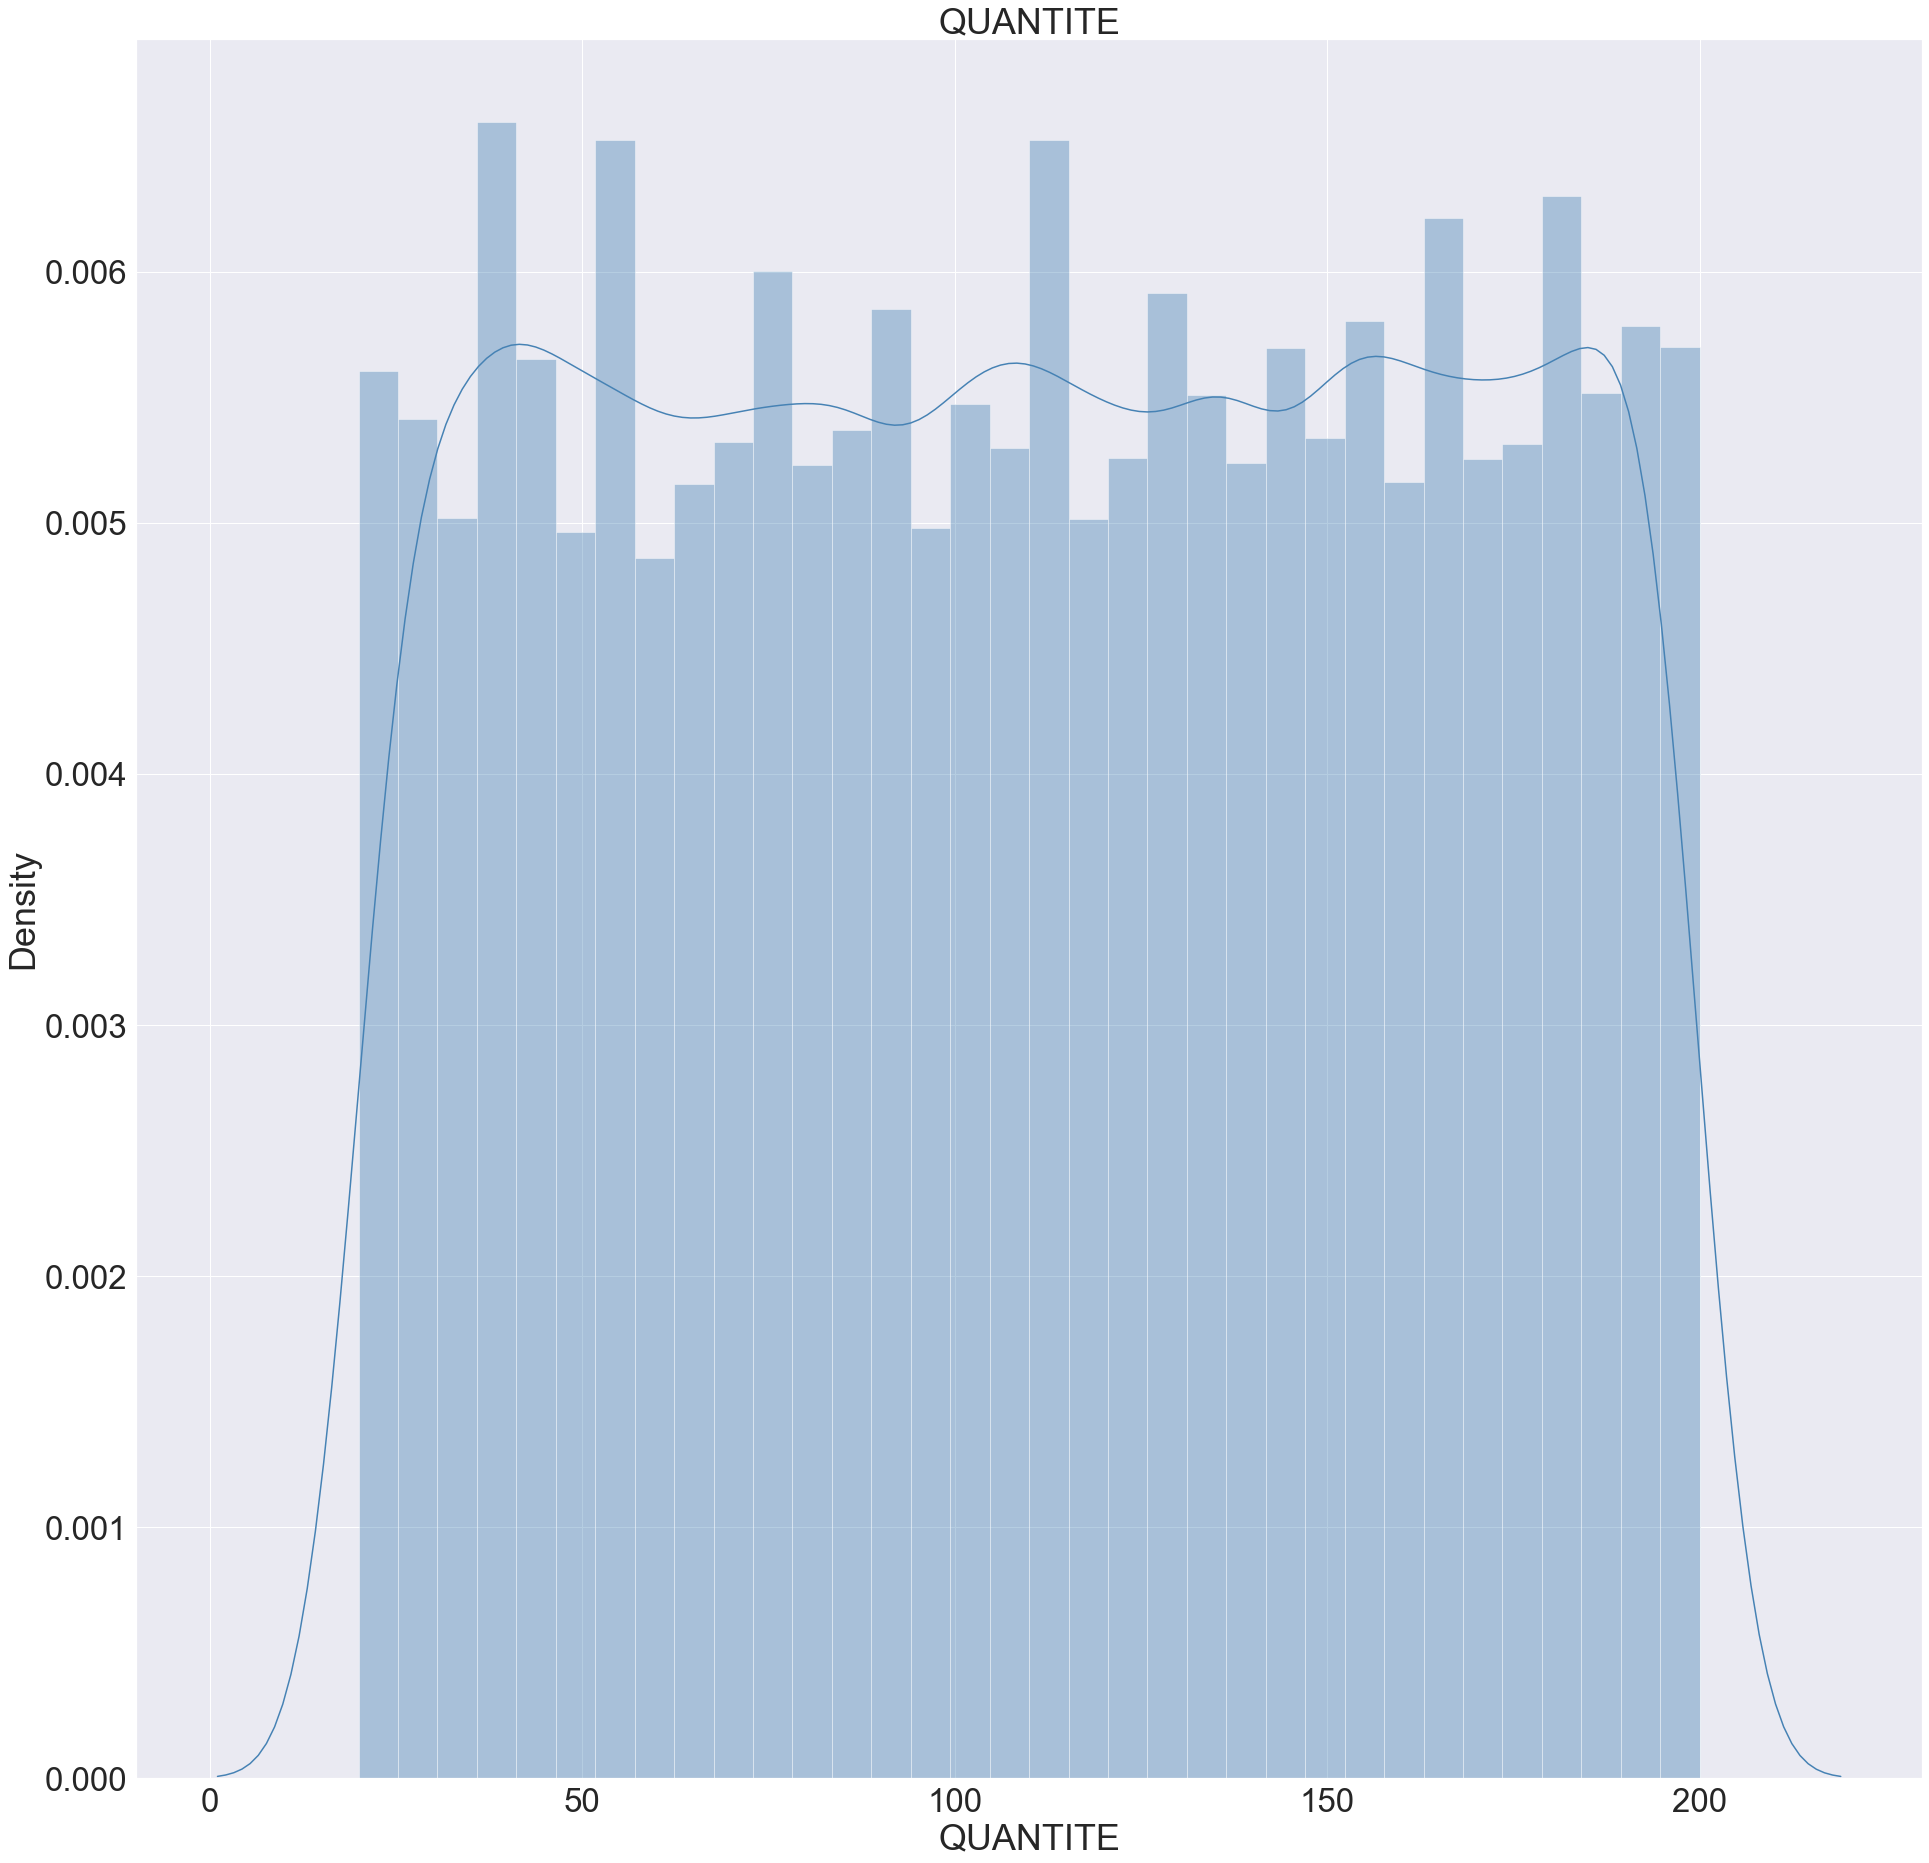

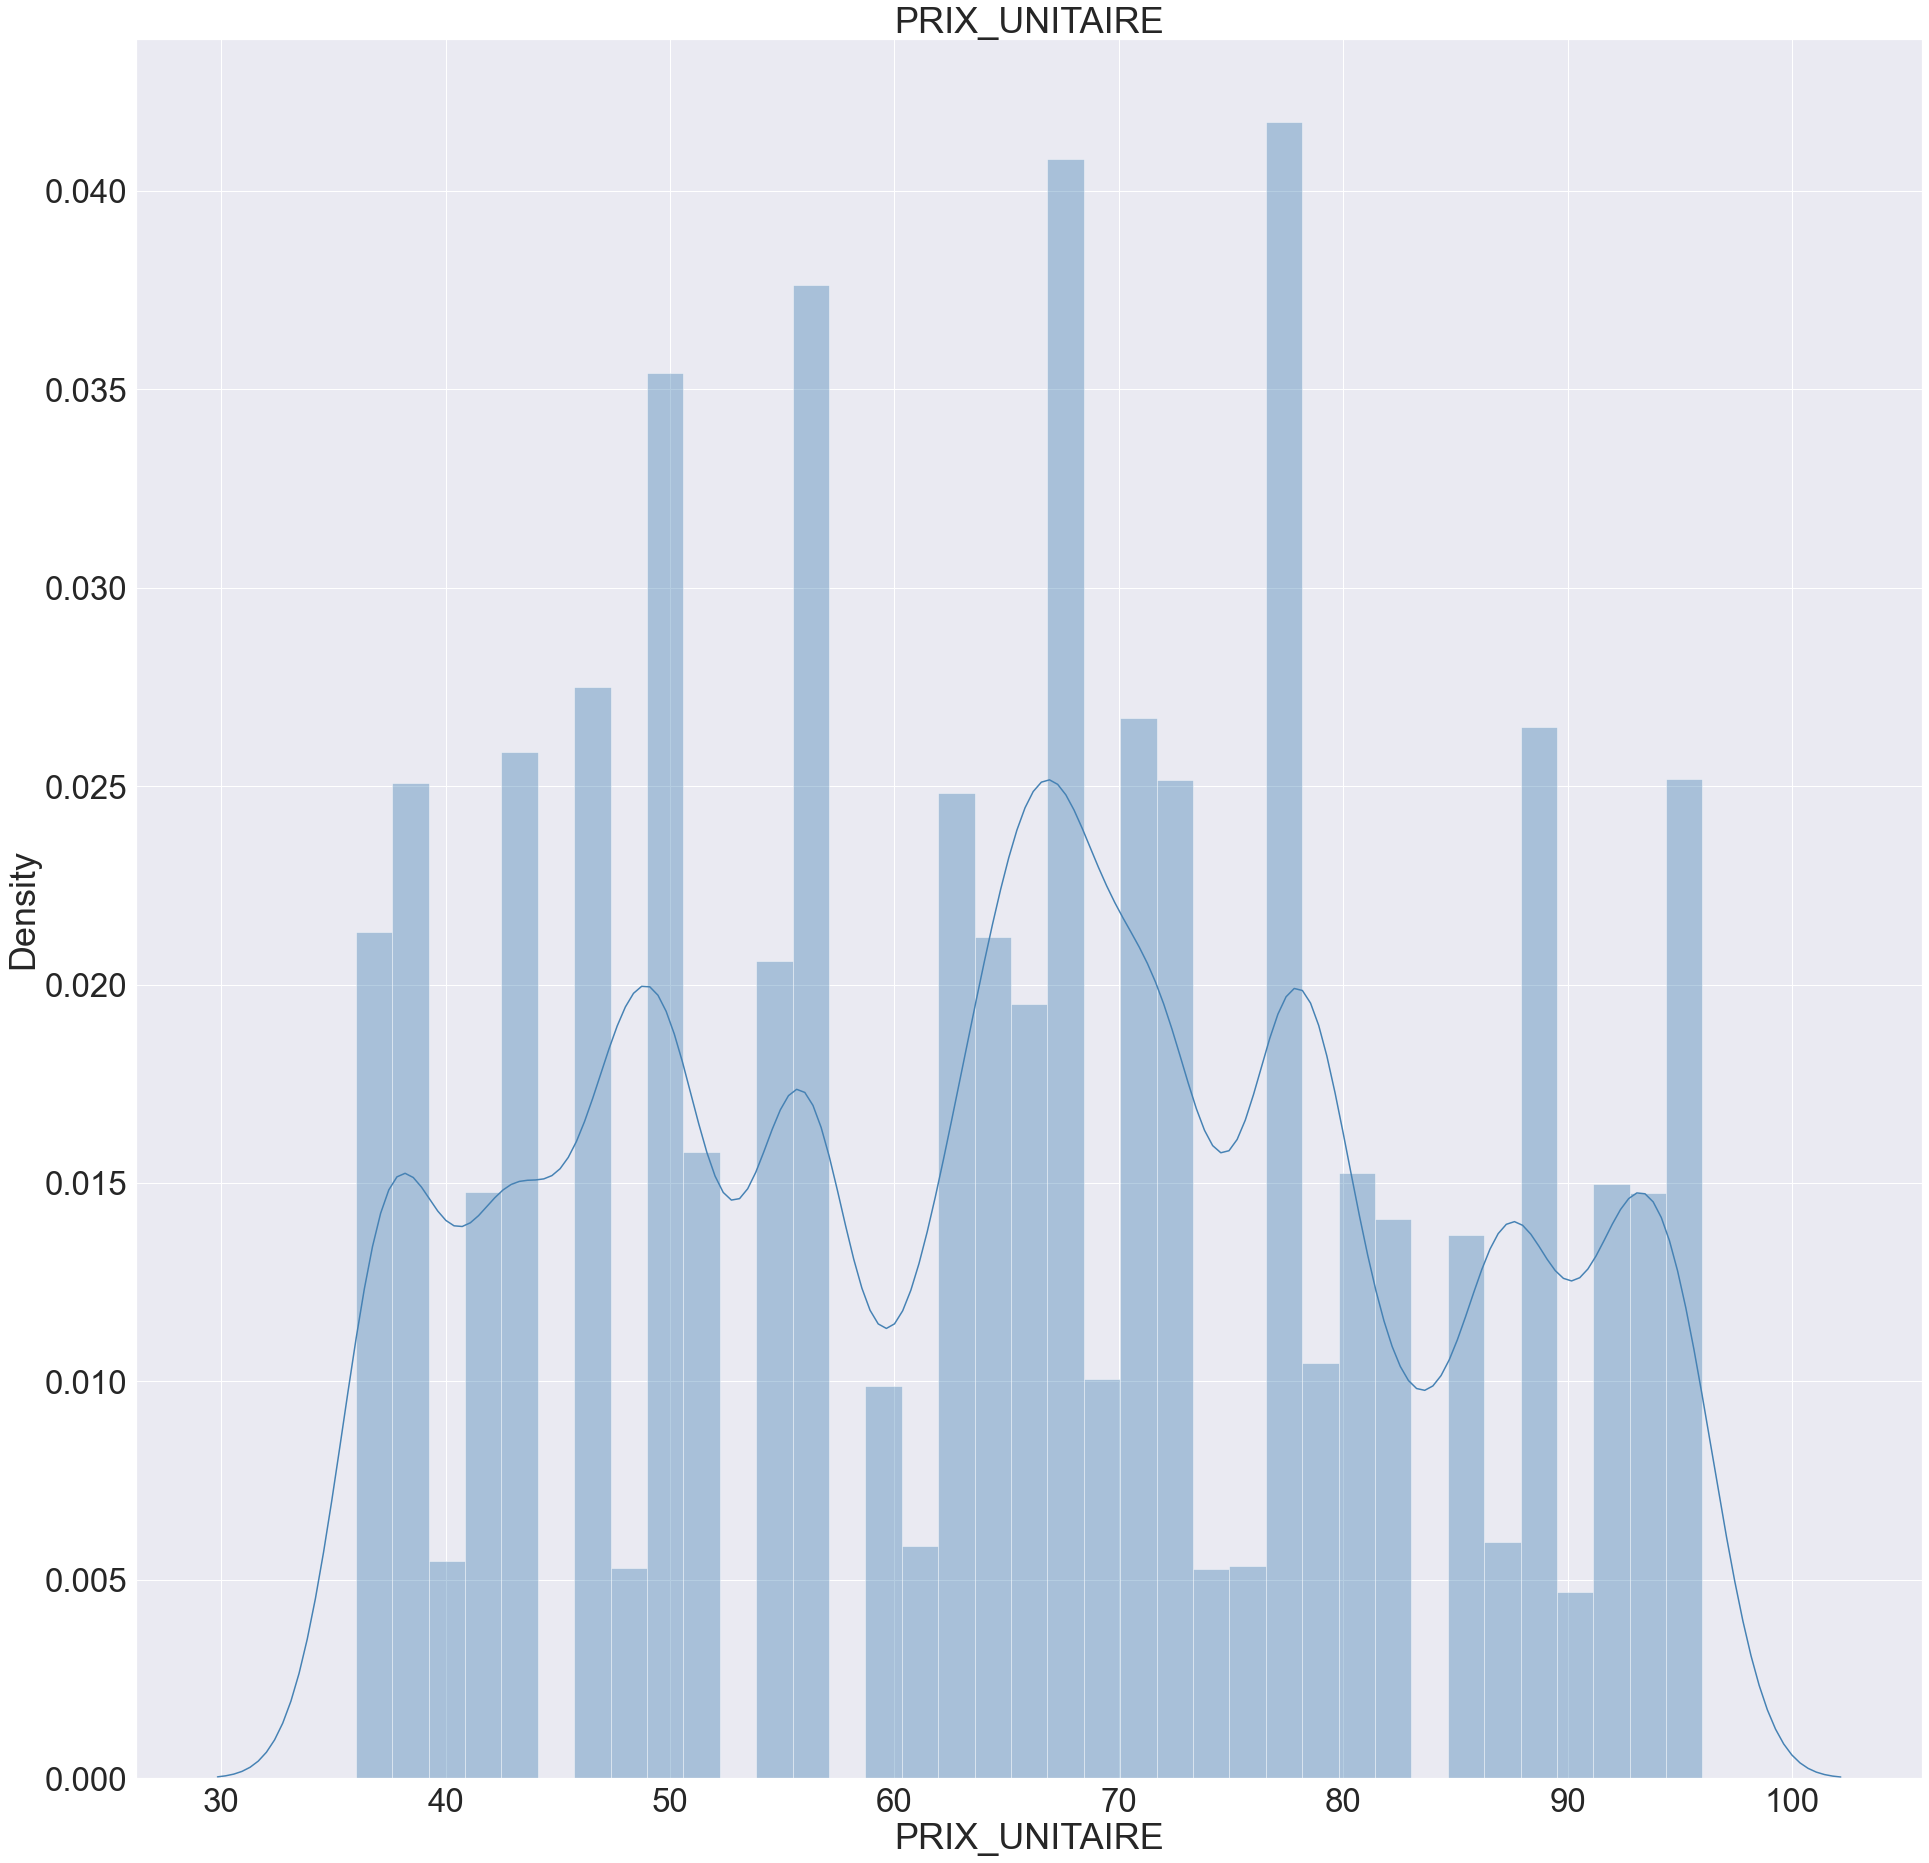

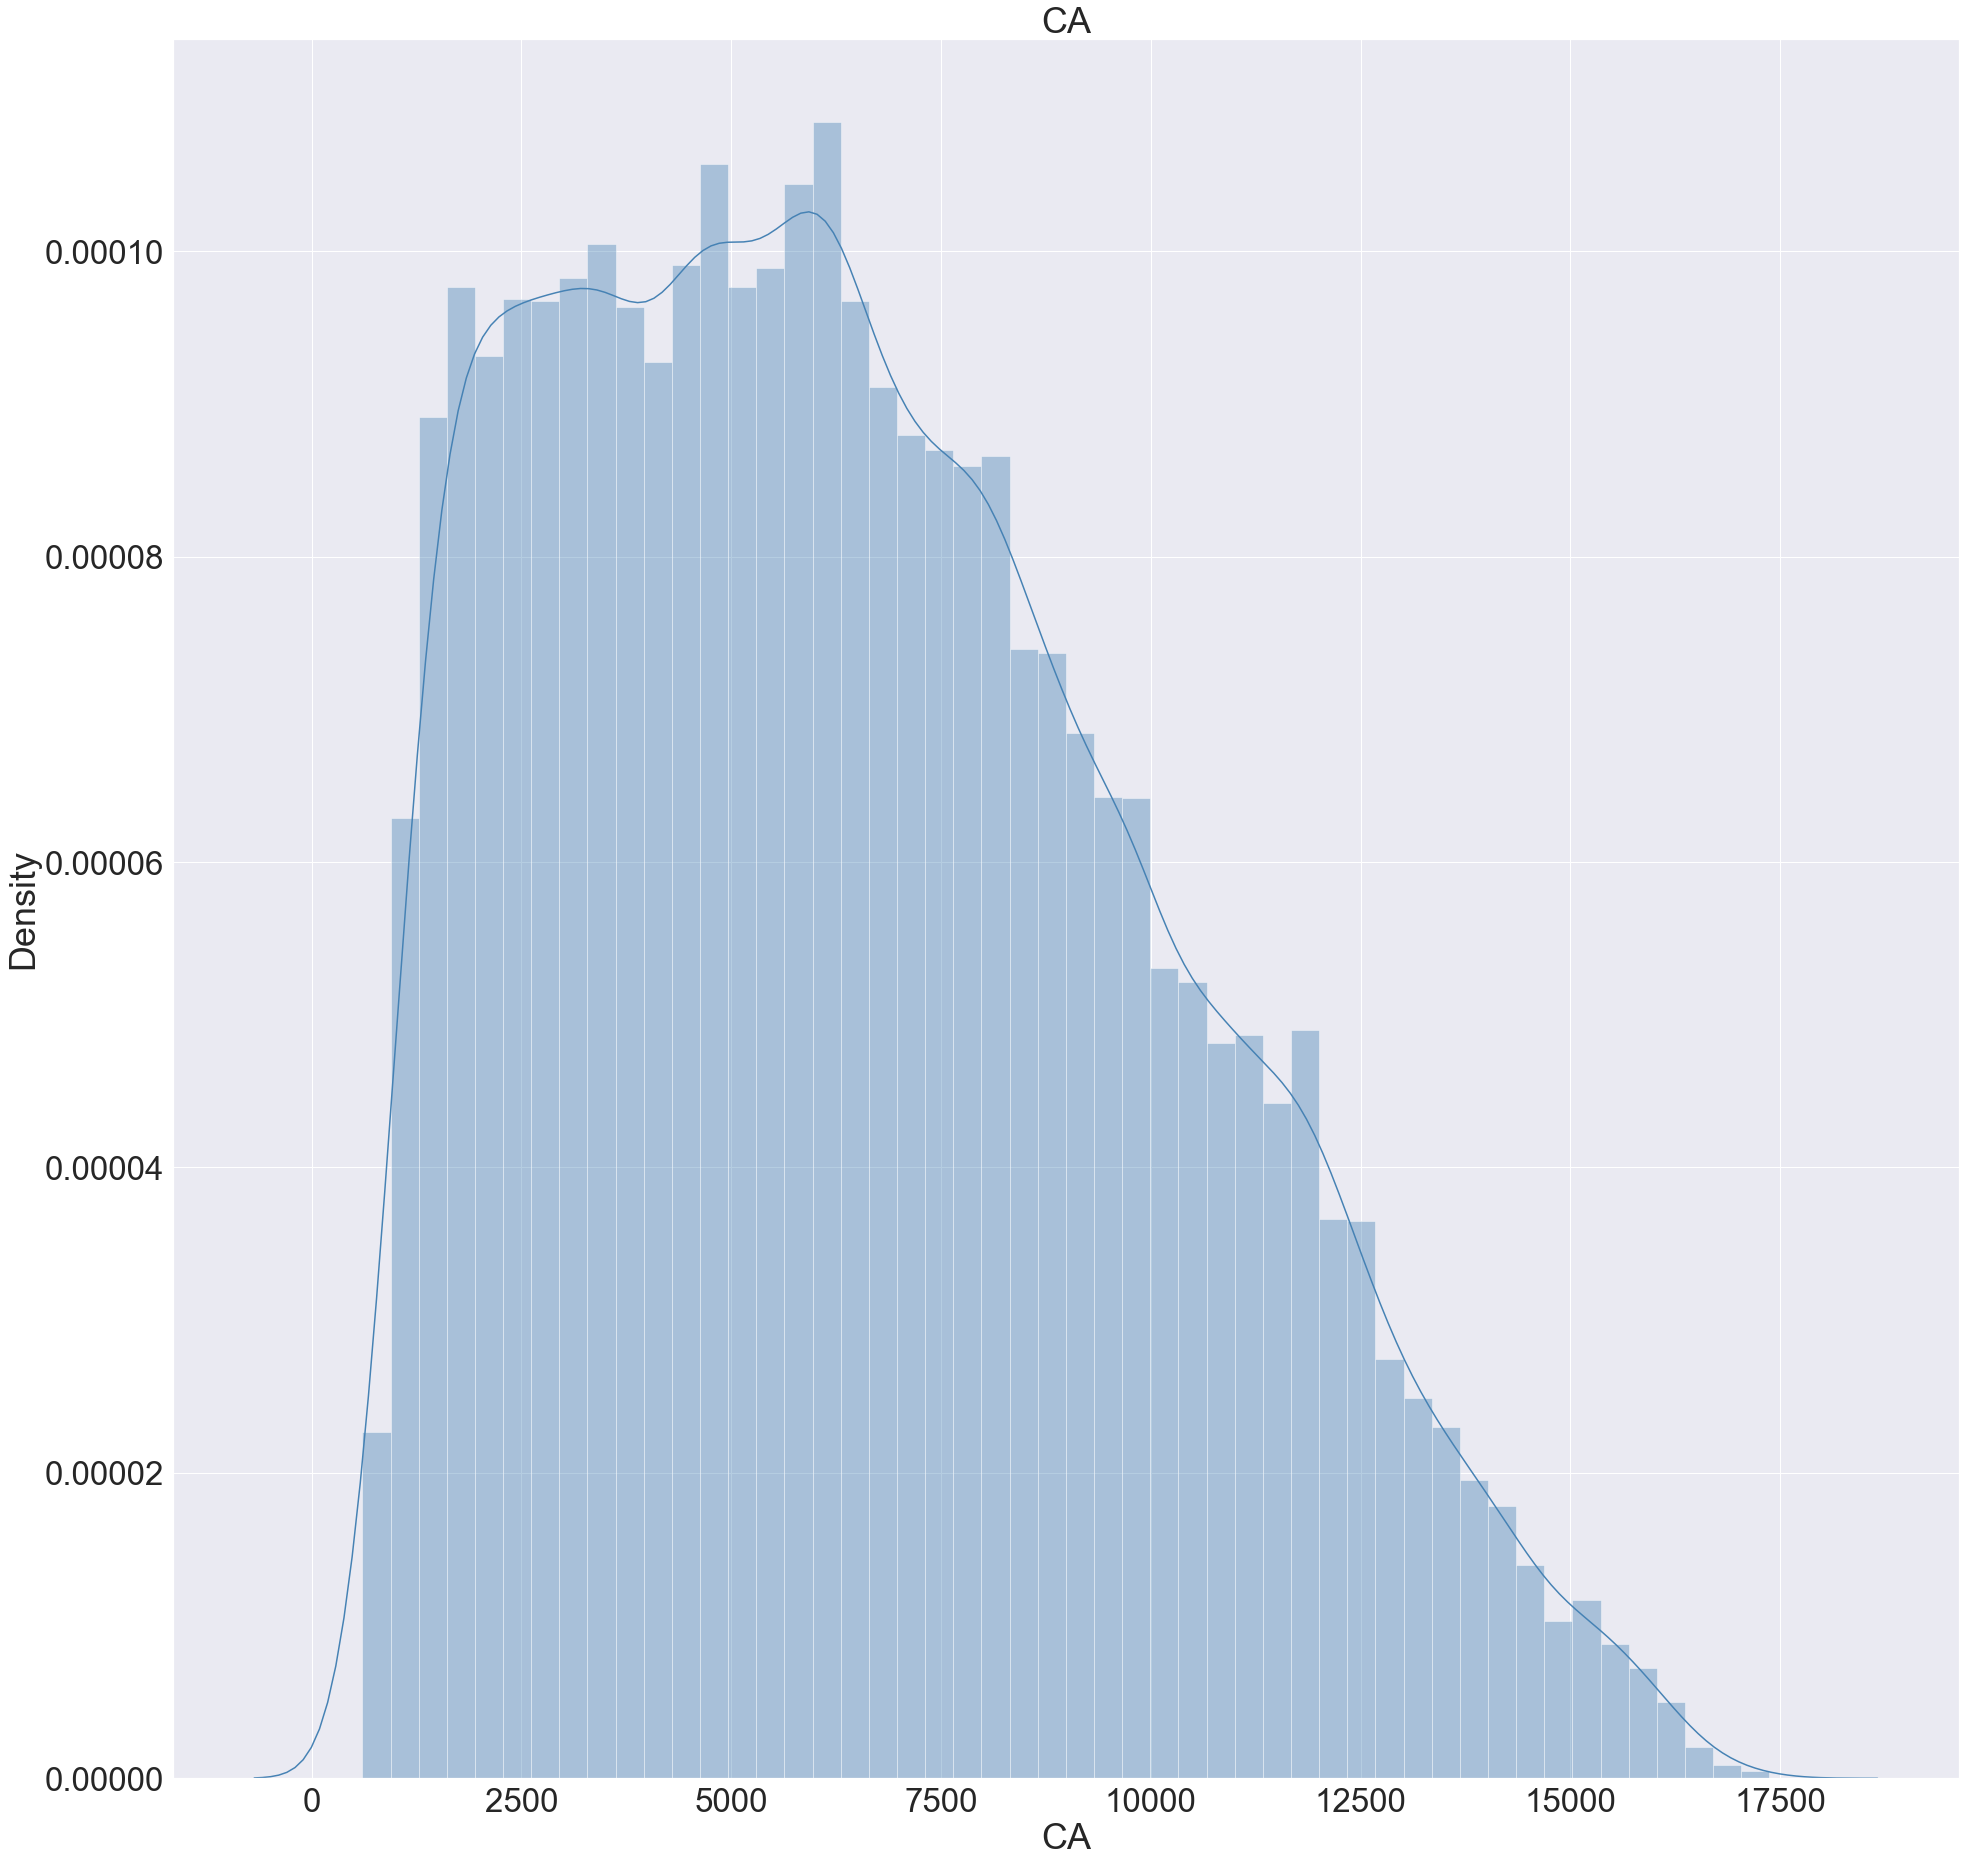

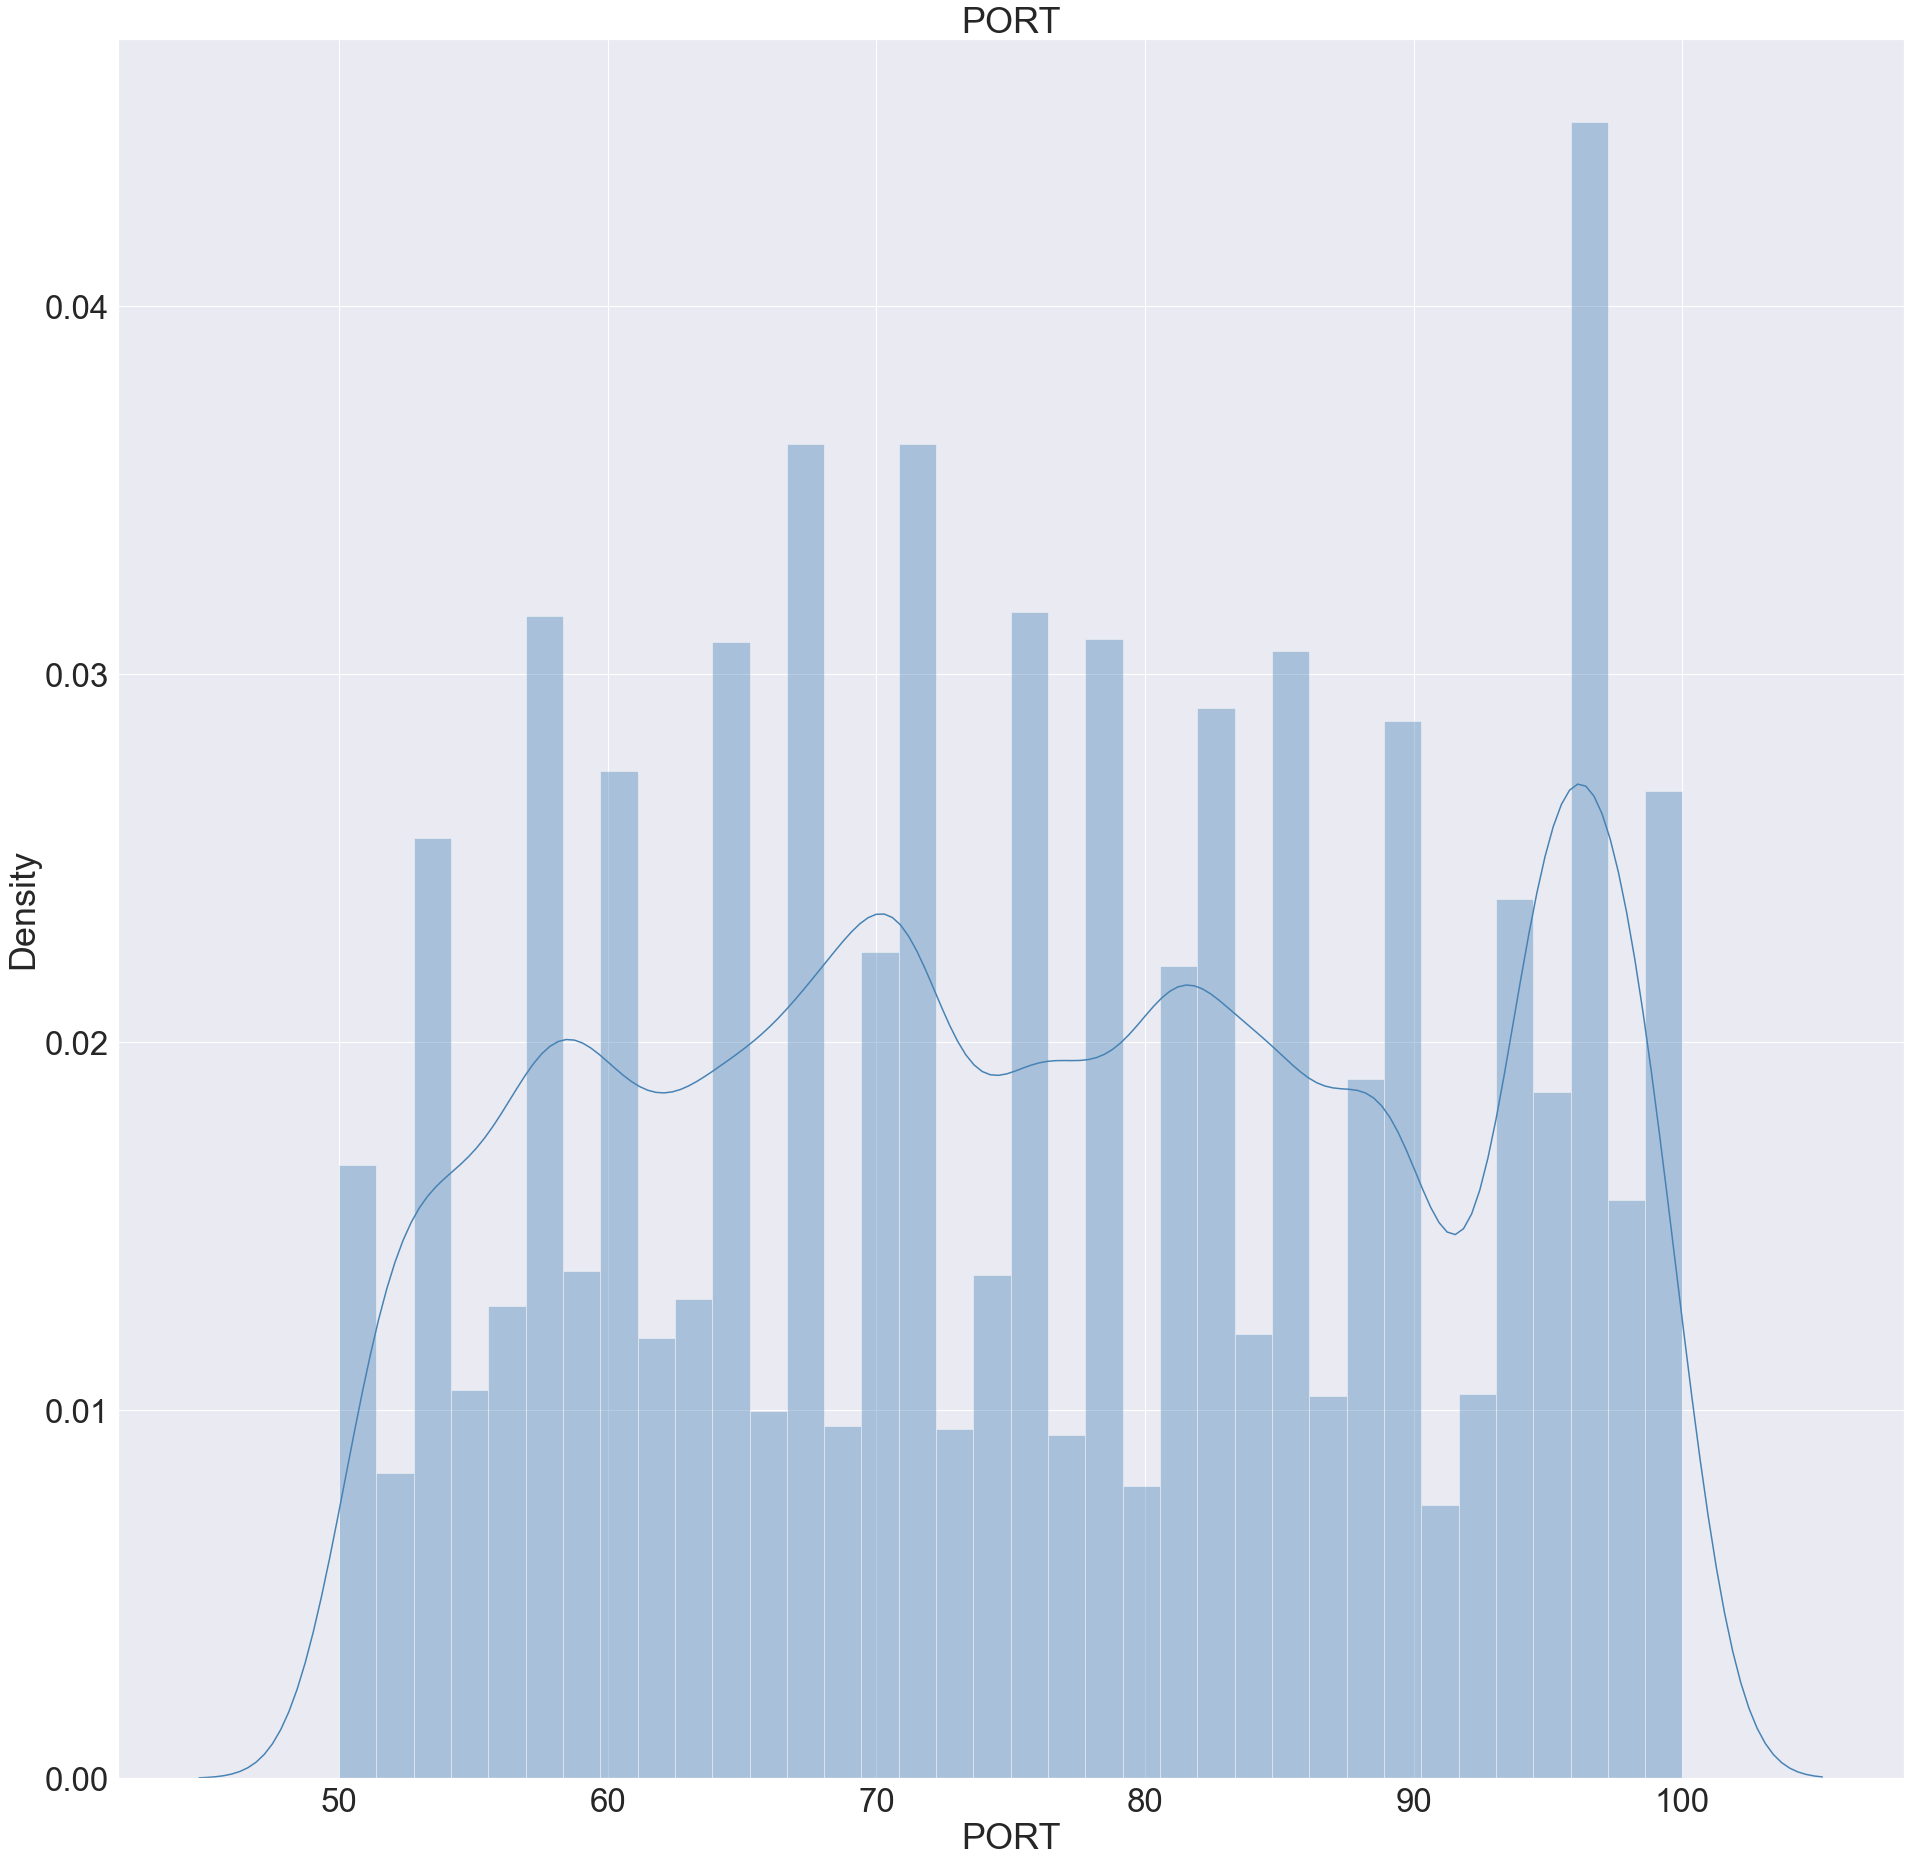

In [5]:
for colonne in ['QUANTITE','PRIX_UNITAIRE','CA','PORT']:
    plt.figure(figsize=(32,32))
    plt.title(colonne)
    sns.distplot(donneesve[colonne], color="steelblue")
    plt.show()

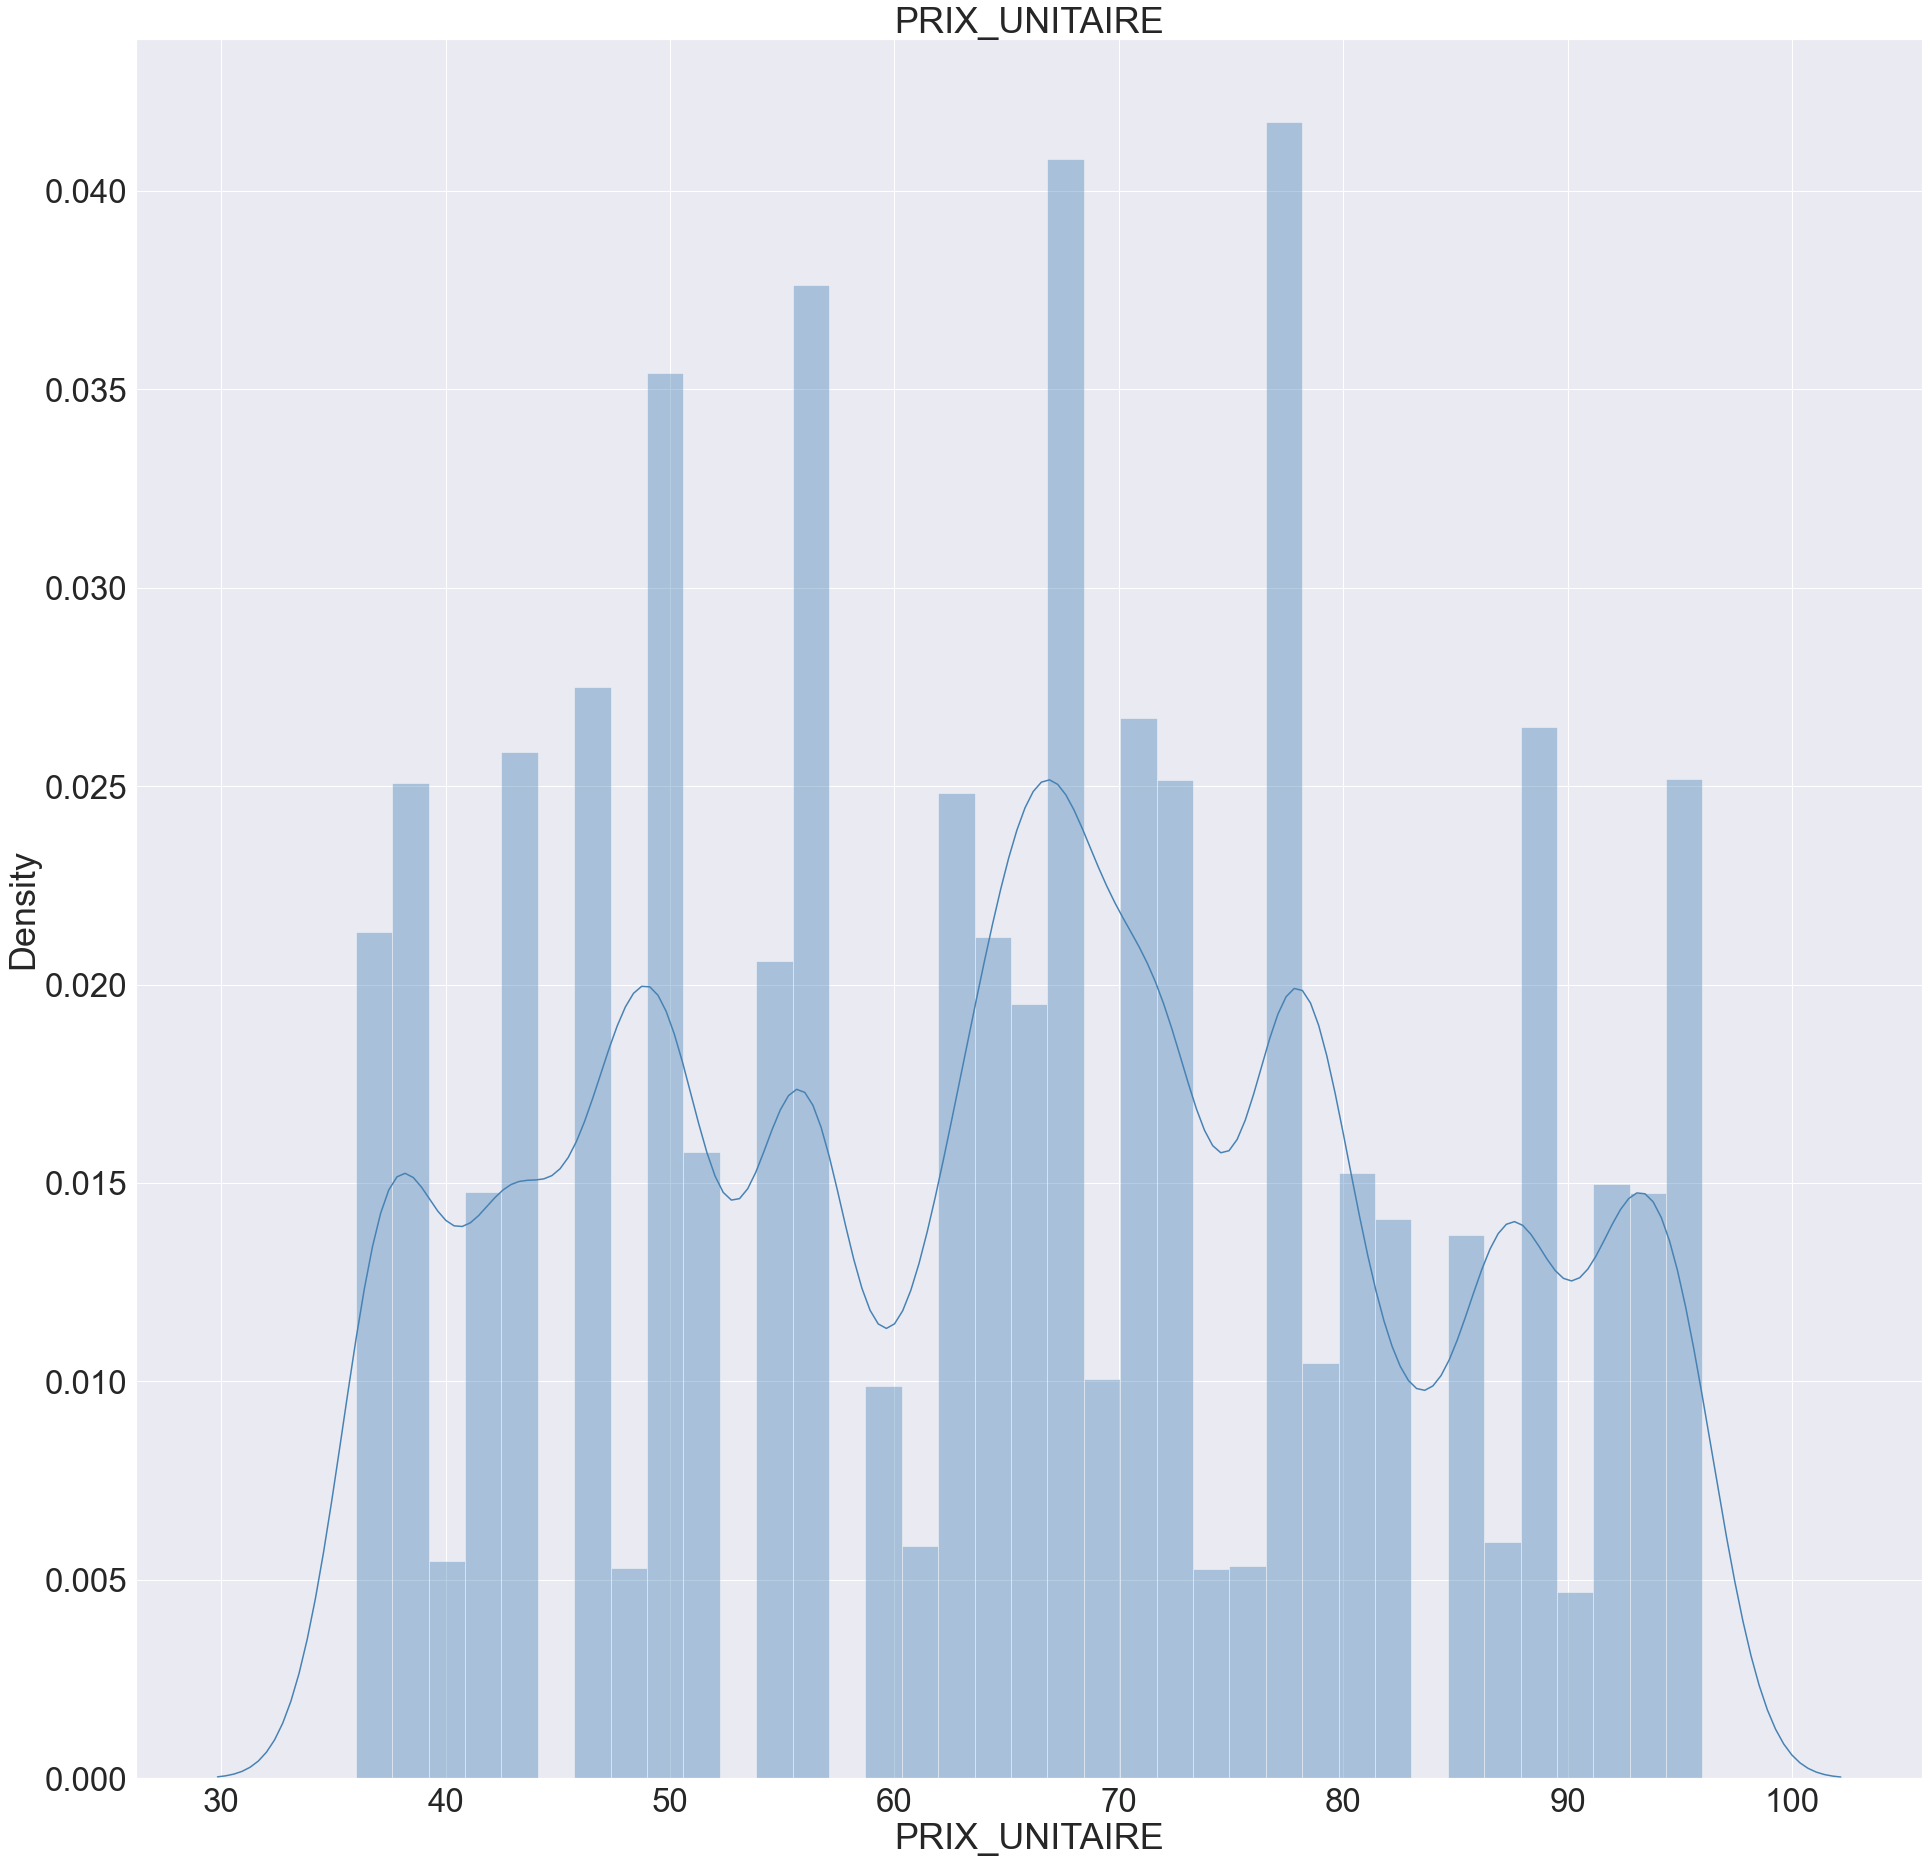
Le pris unitaire est assez bien répartie
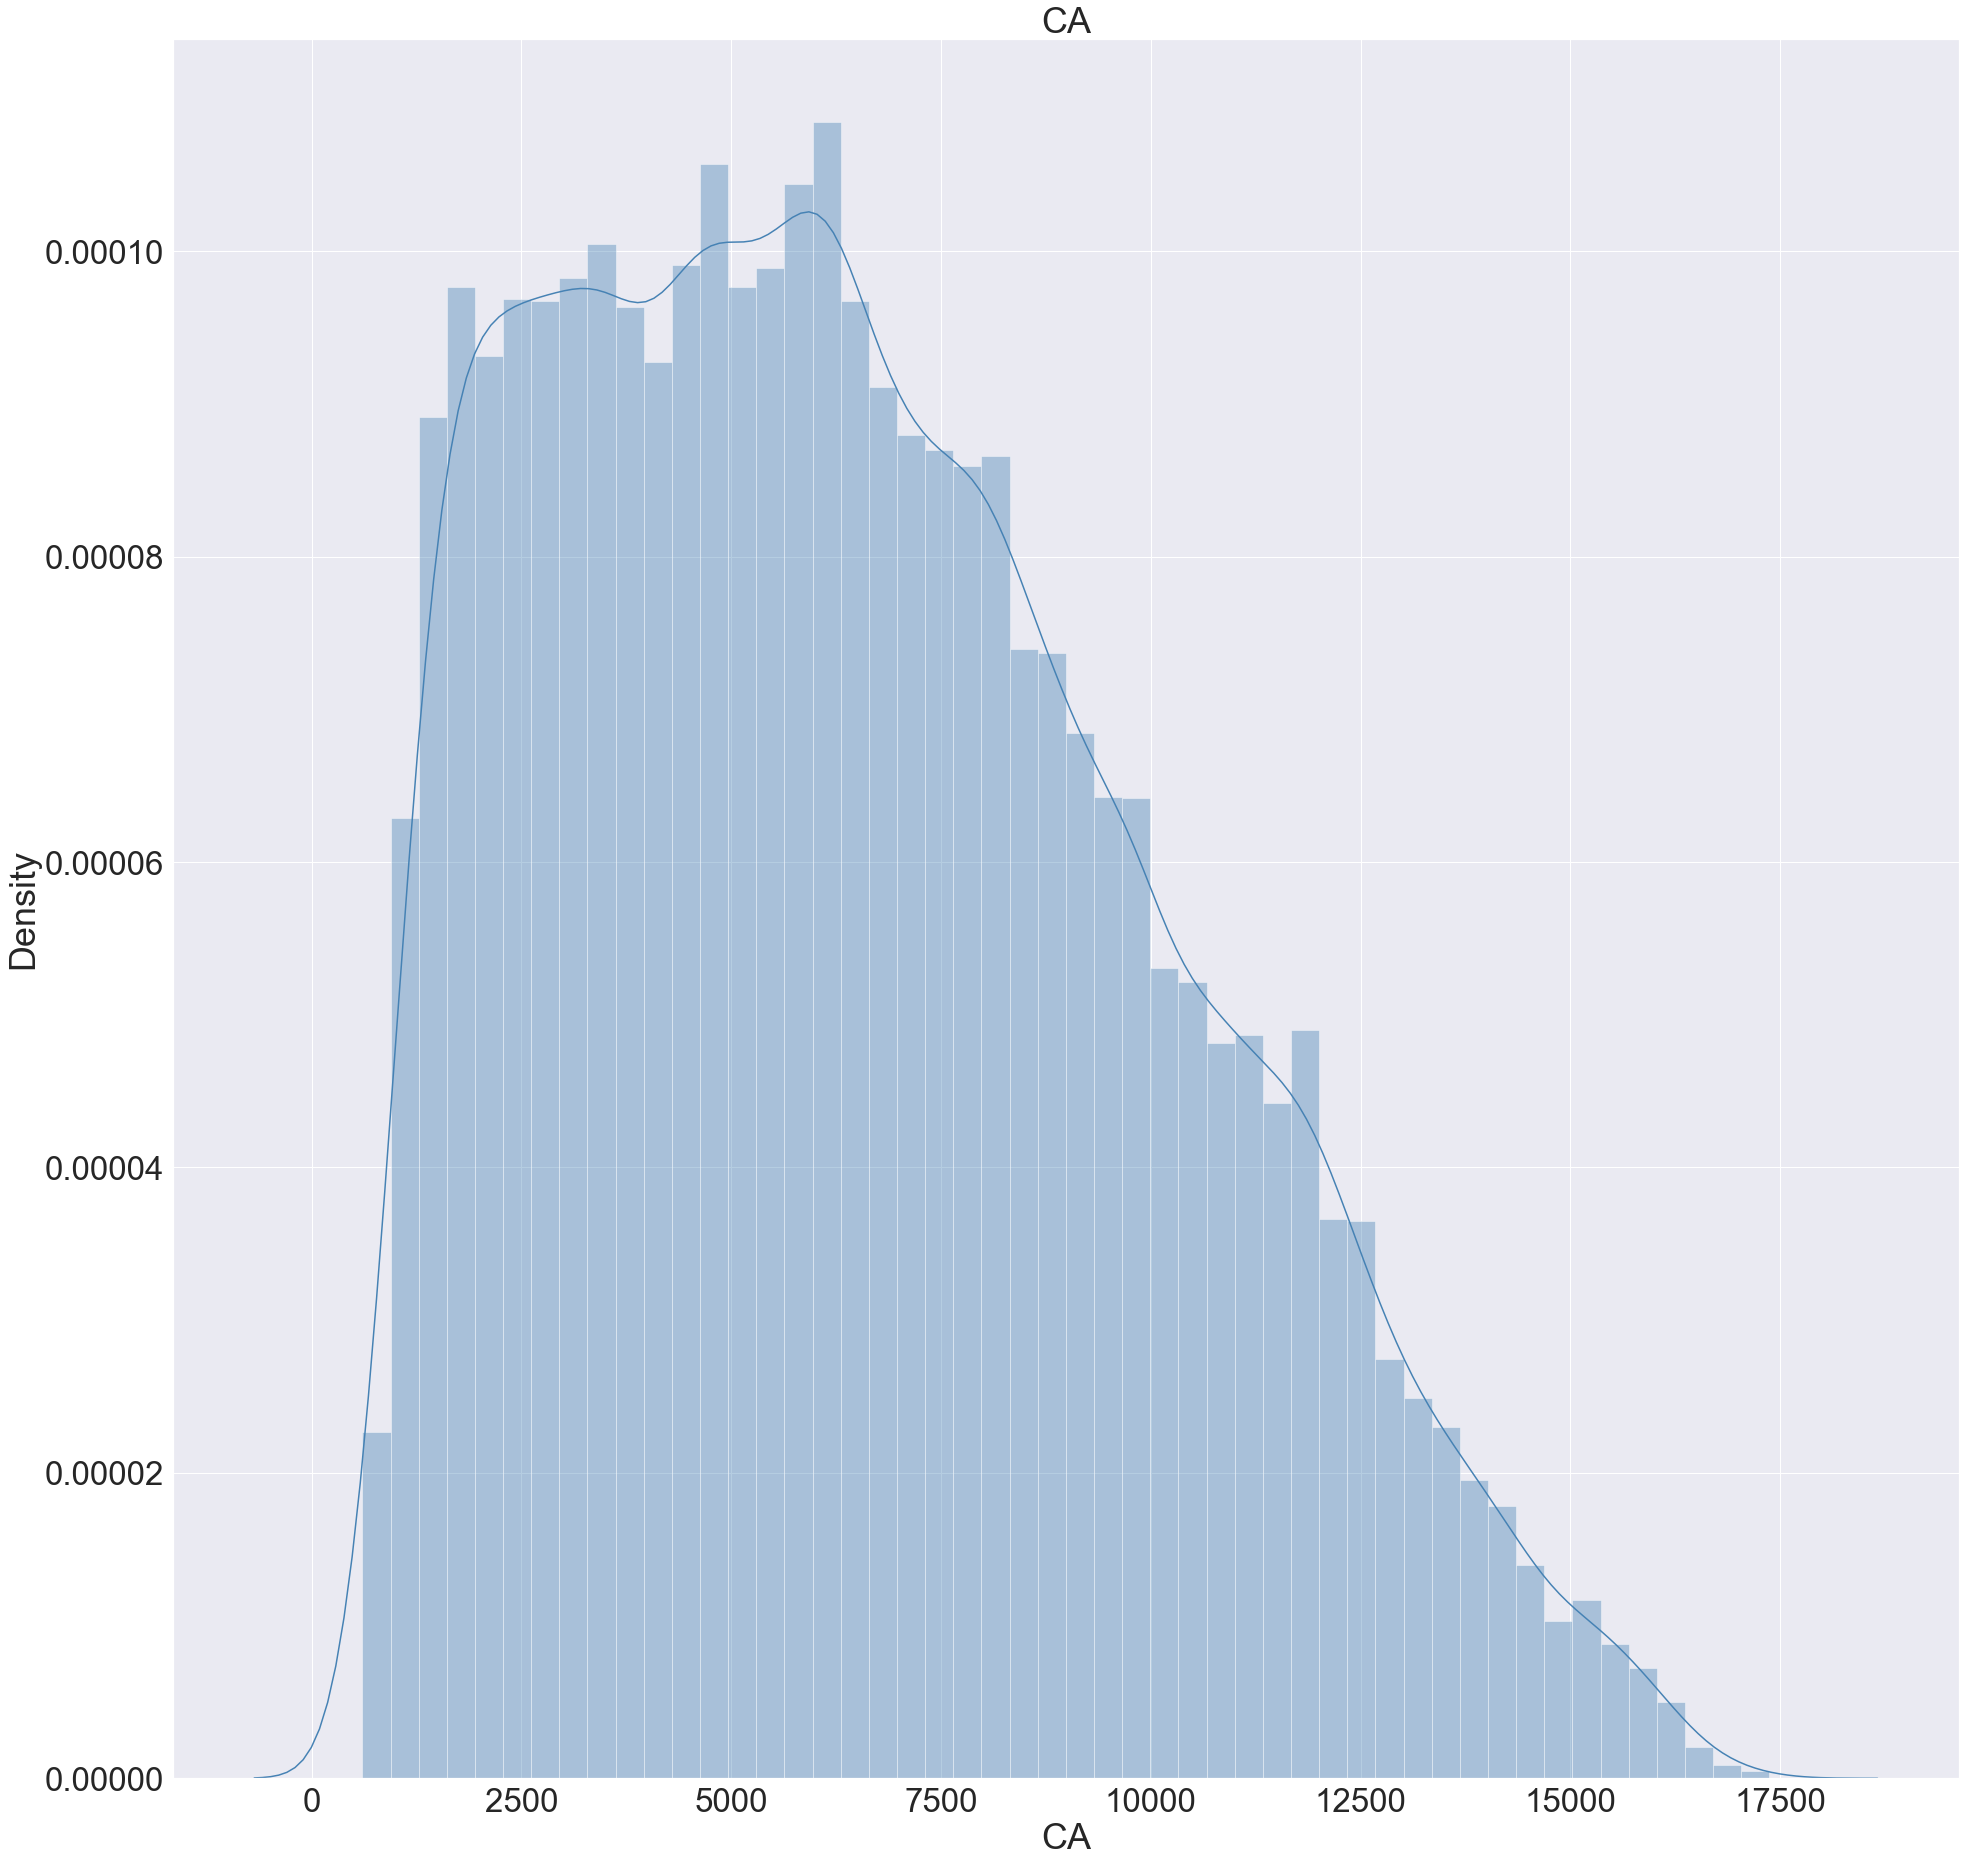
Le chiffre d'affaire le plus haut se place essentiellement autour des 2500-7500
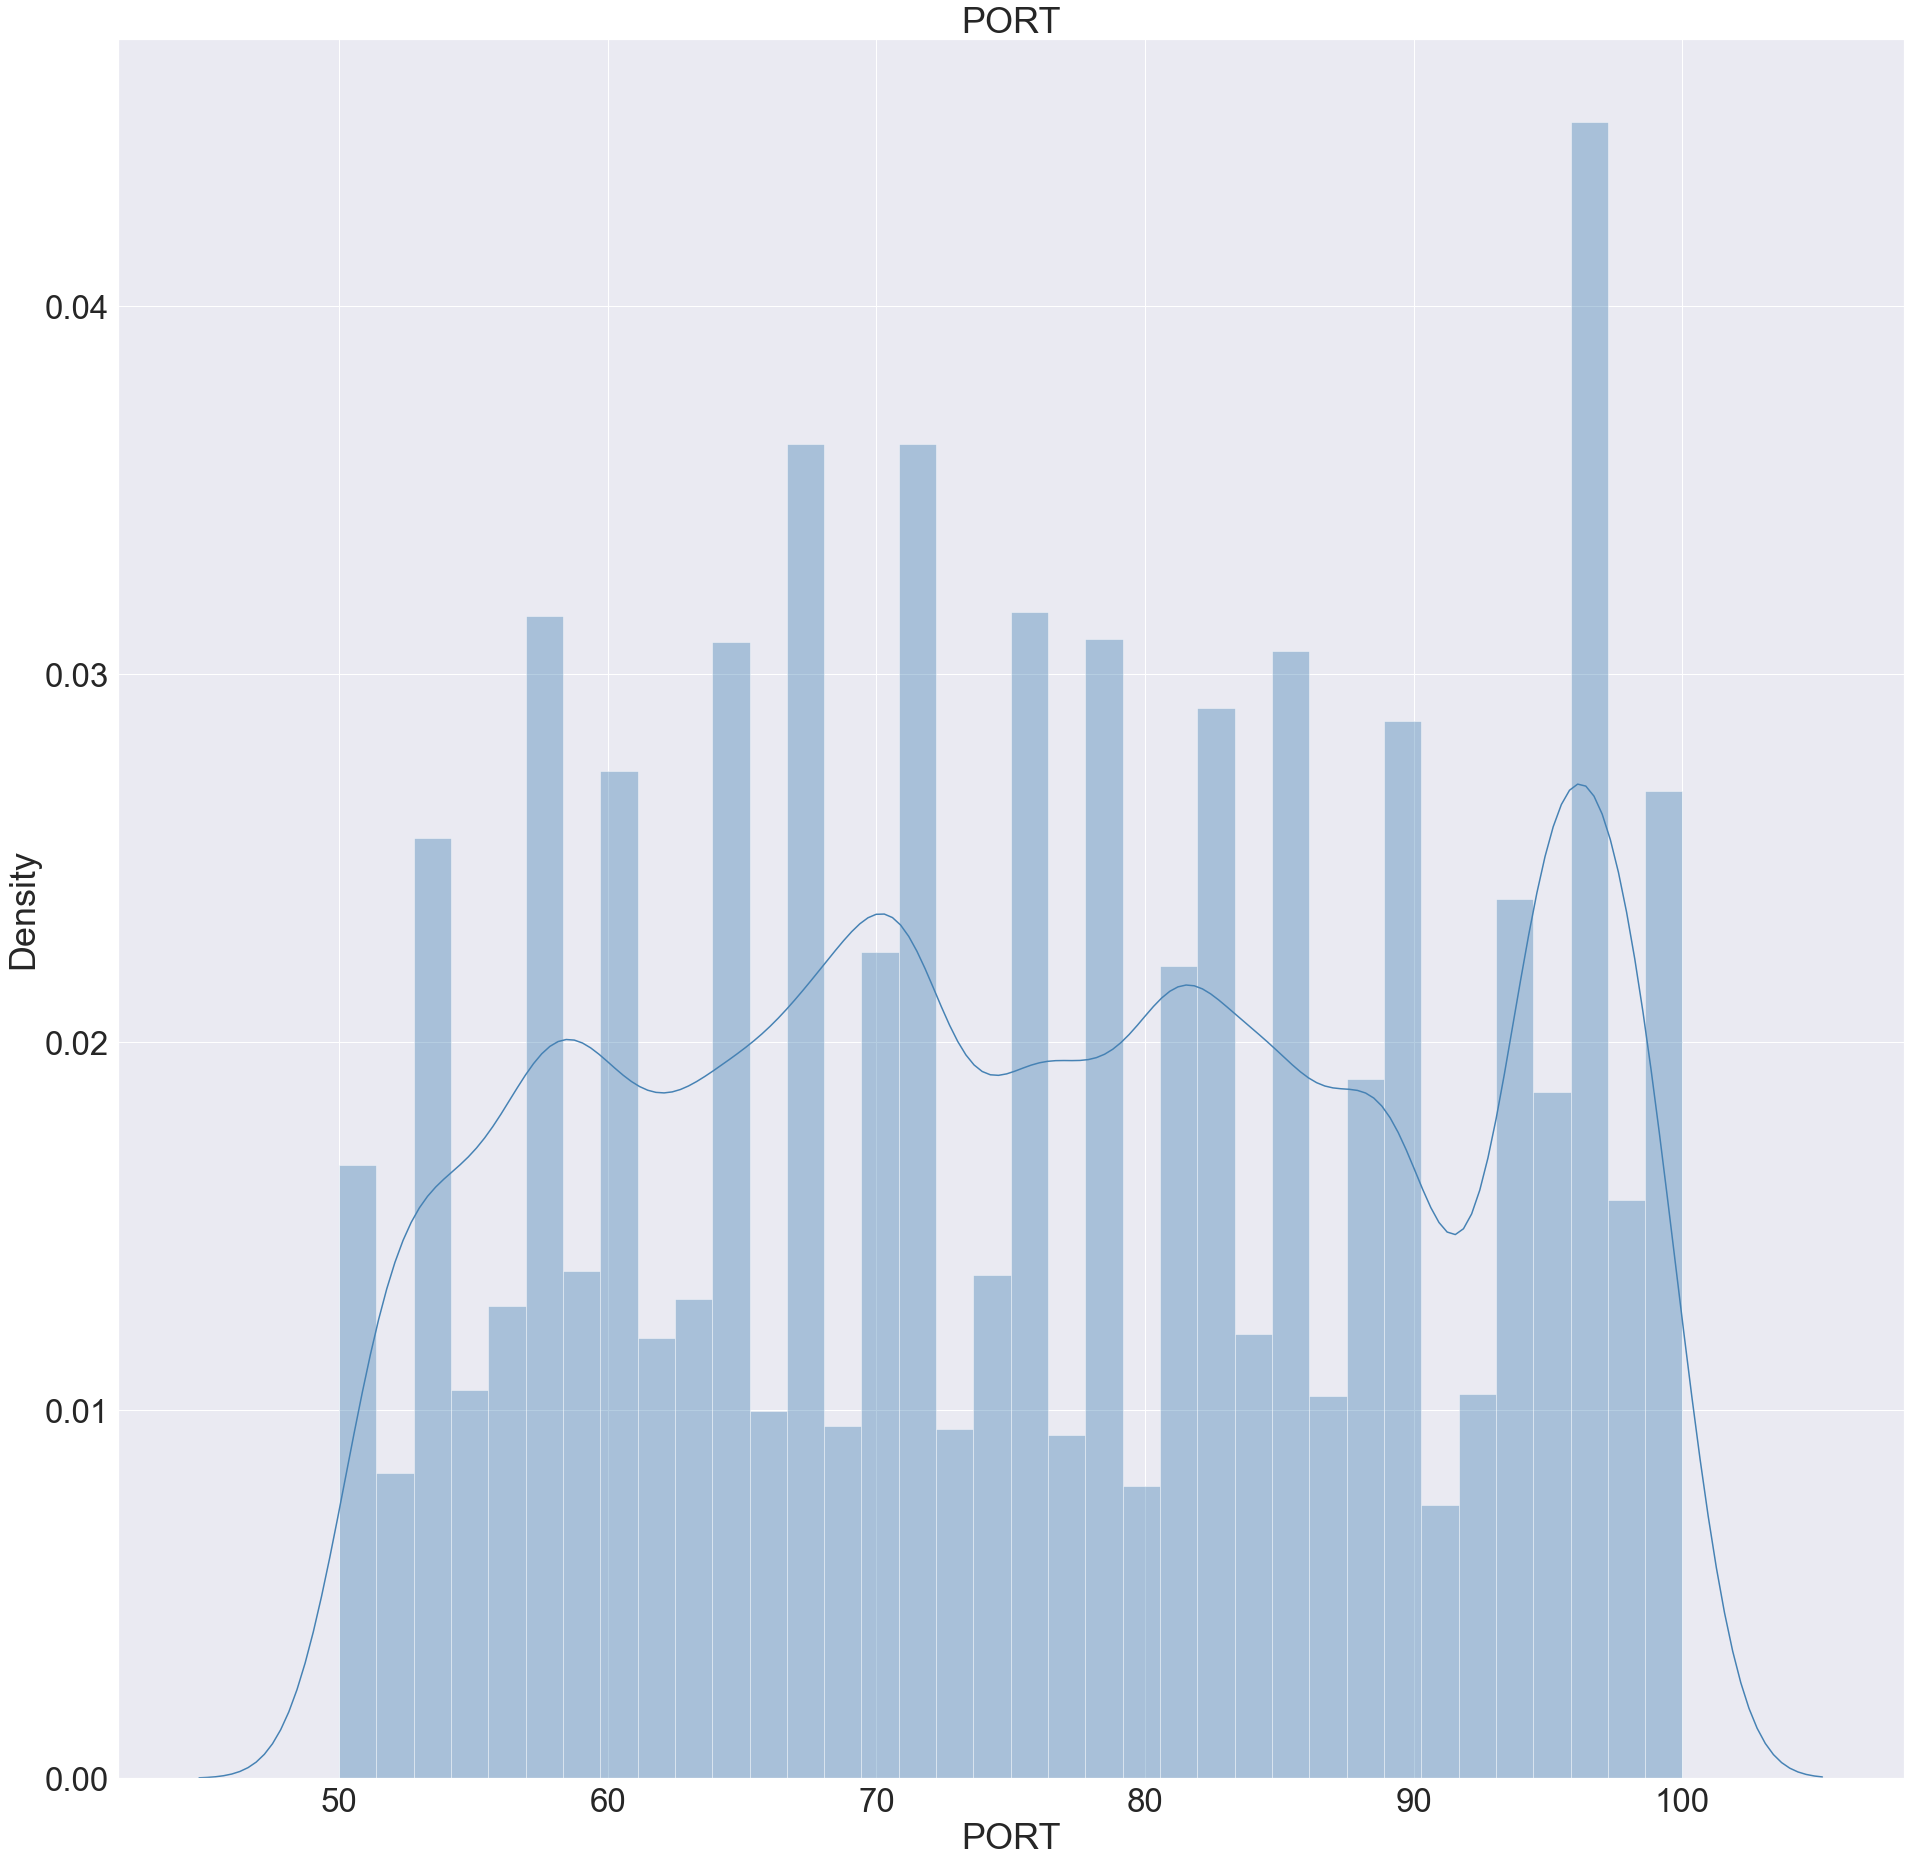
Les frais de port sont assez bien répartie

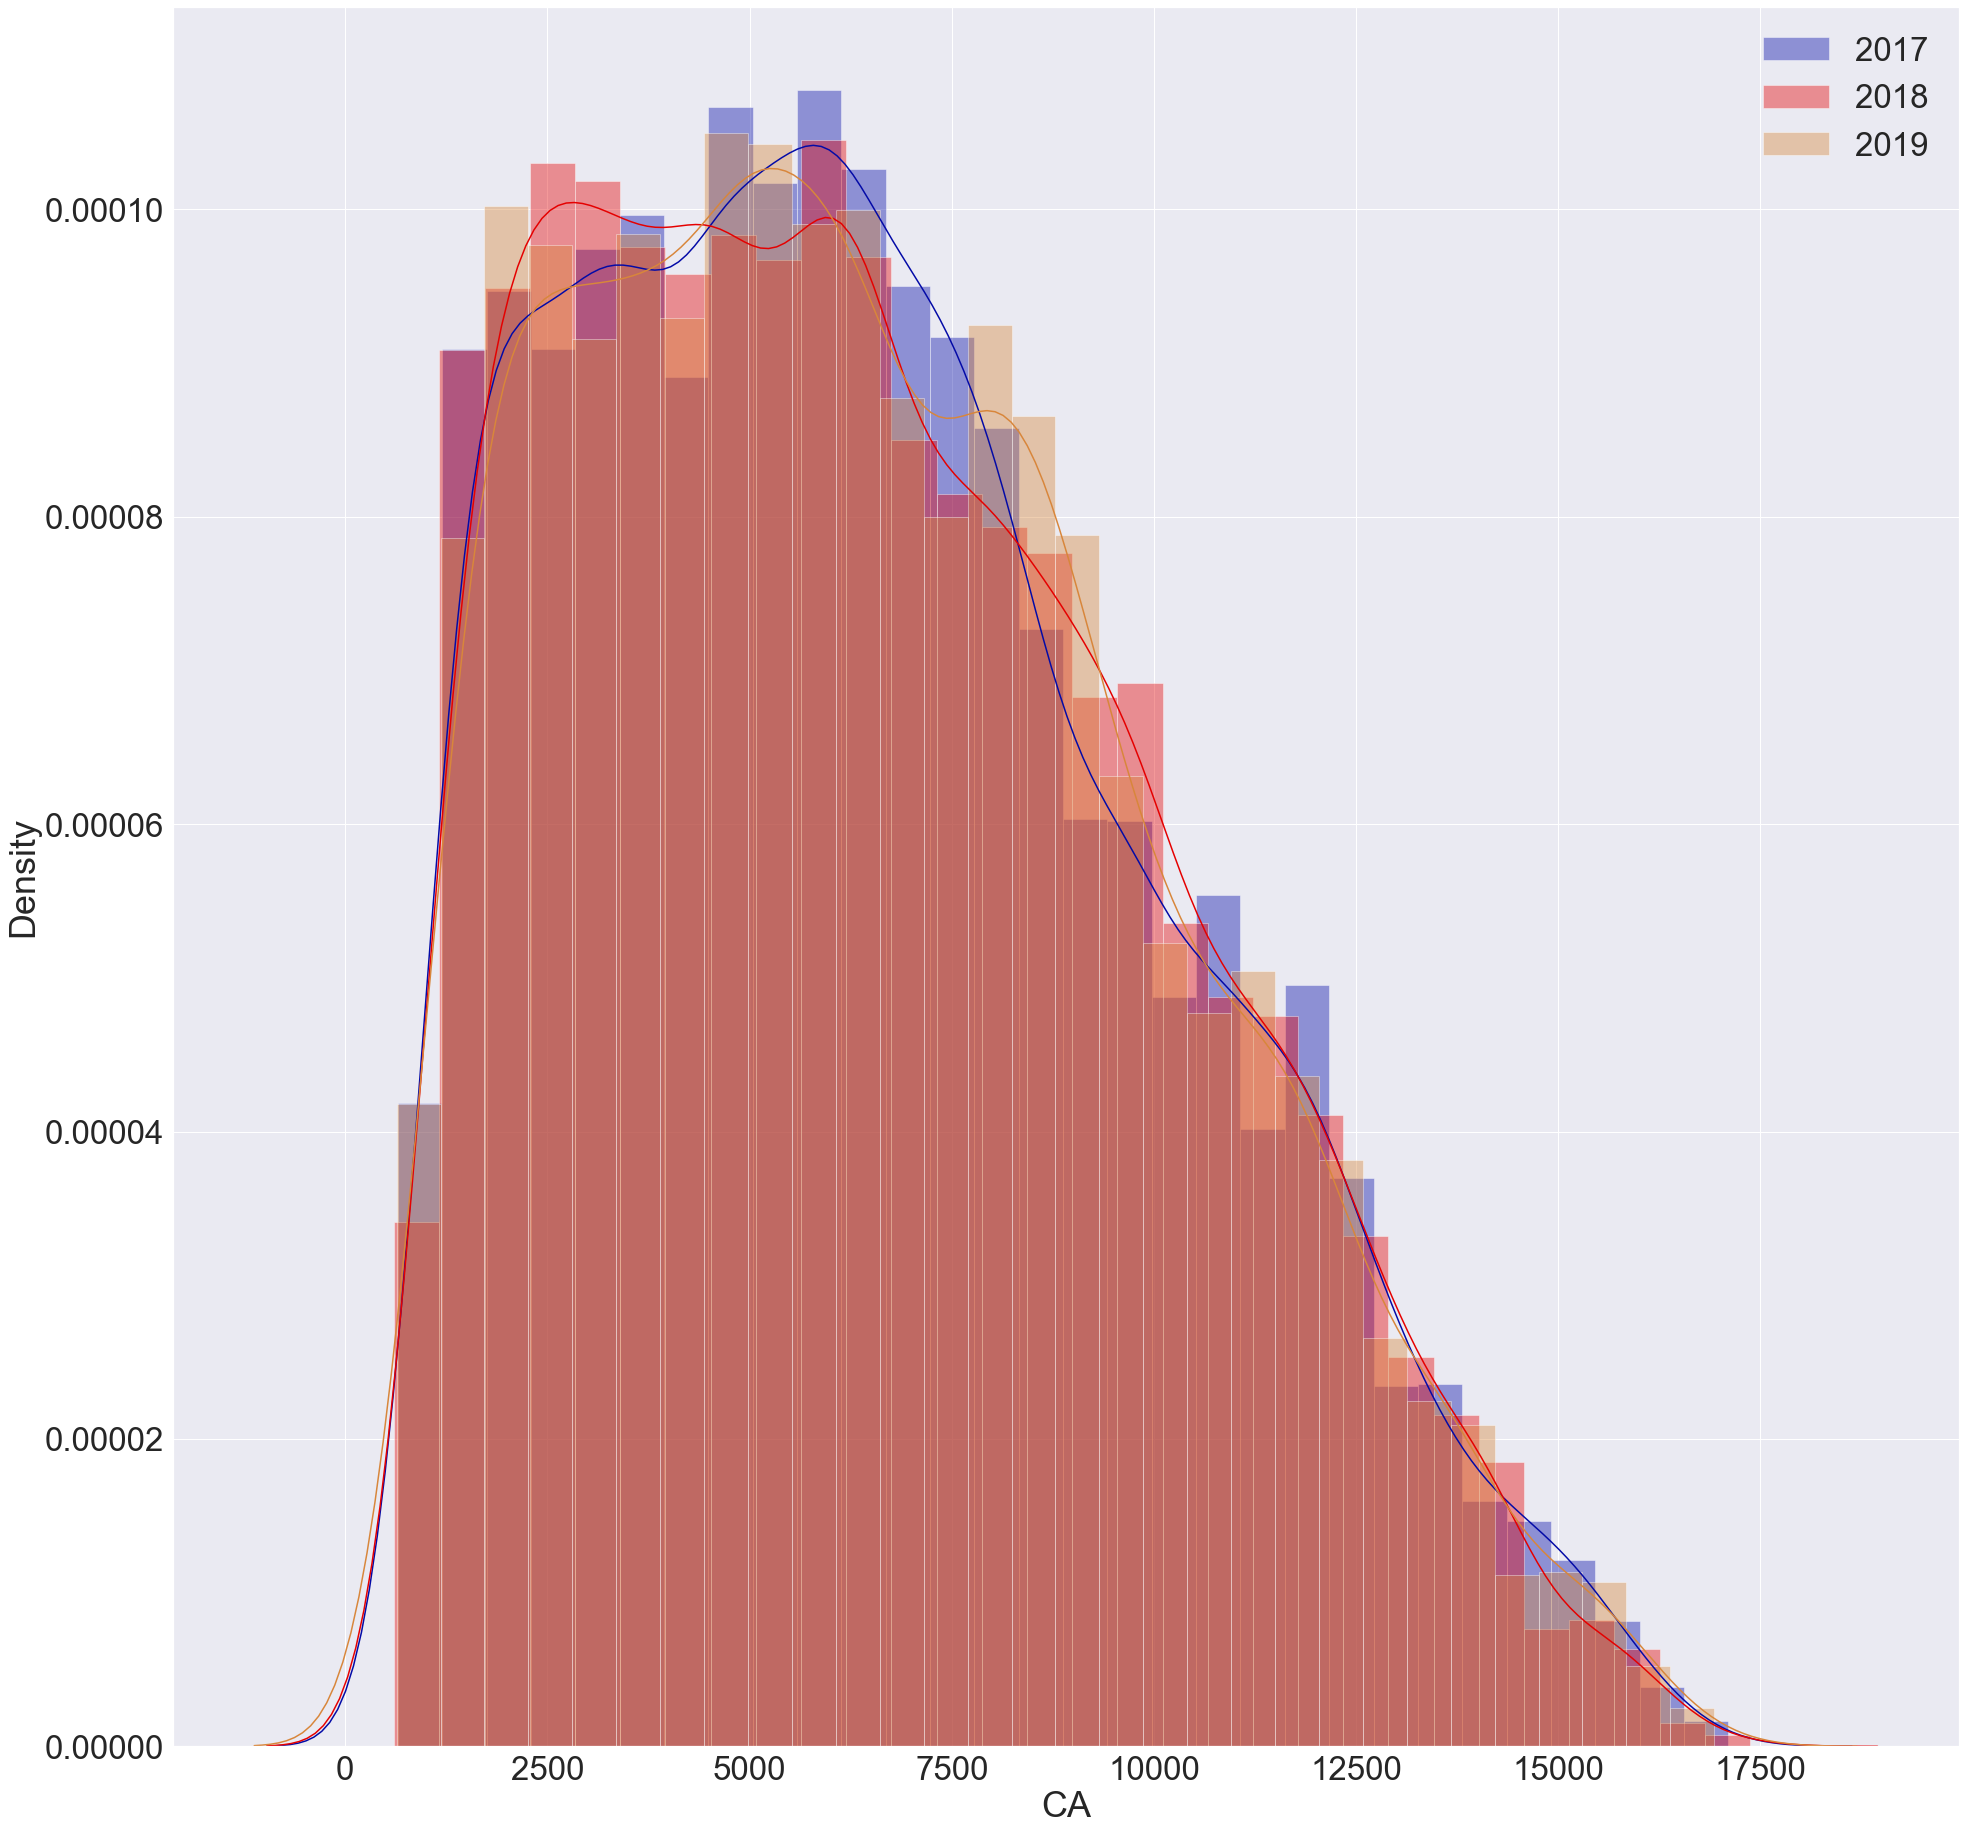

In [9]:
colonne = 'CA'
plt.figure(figsize=(32,32))
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2017],color=palette[0], label='2017', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2018],color=palette[1], label='2018', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2019],color=palette[2], label='2019', hist_kws=dict(alpha=0.4),bins=30)
plt.legend();

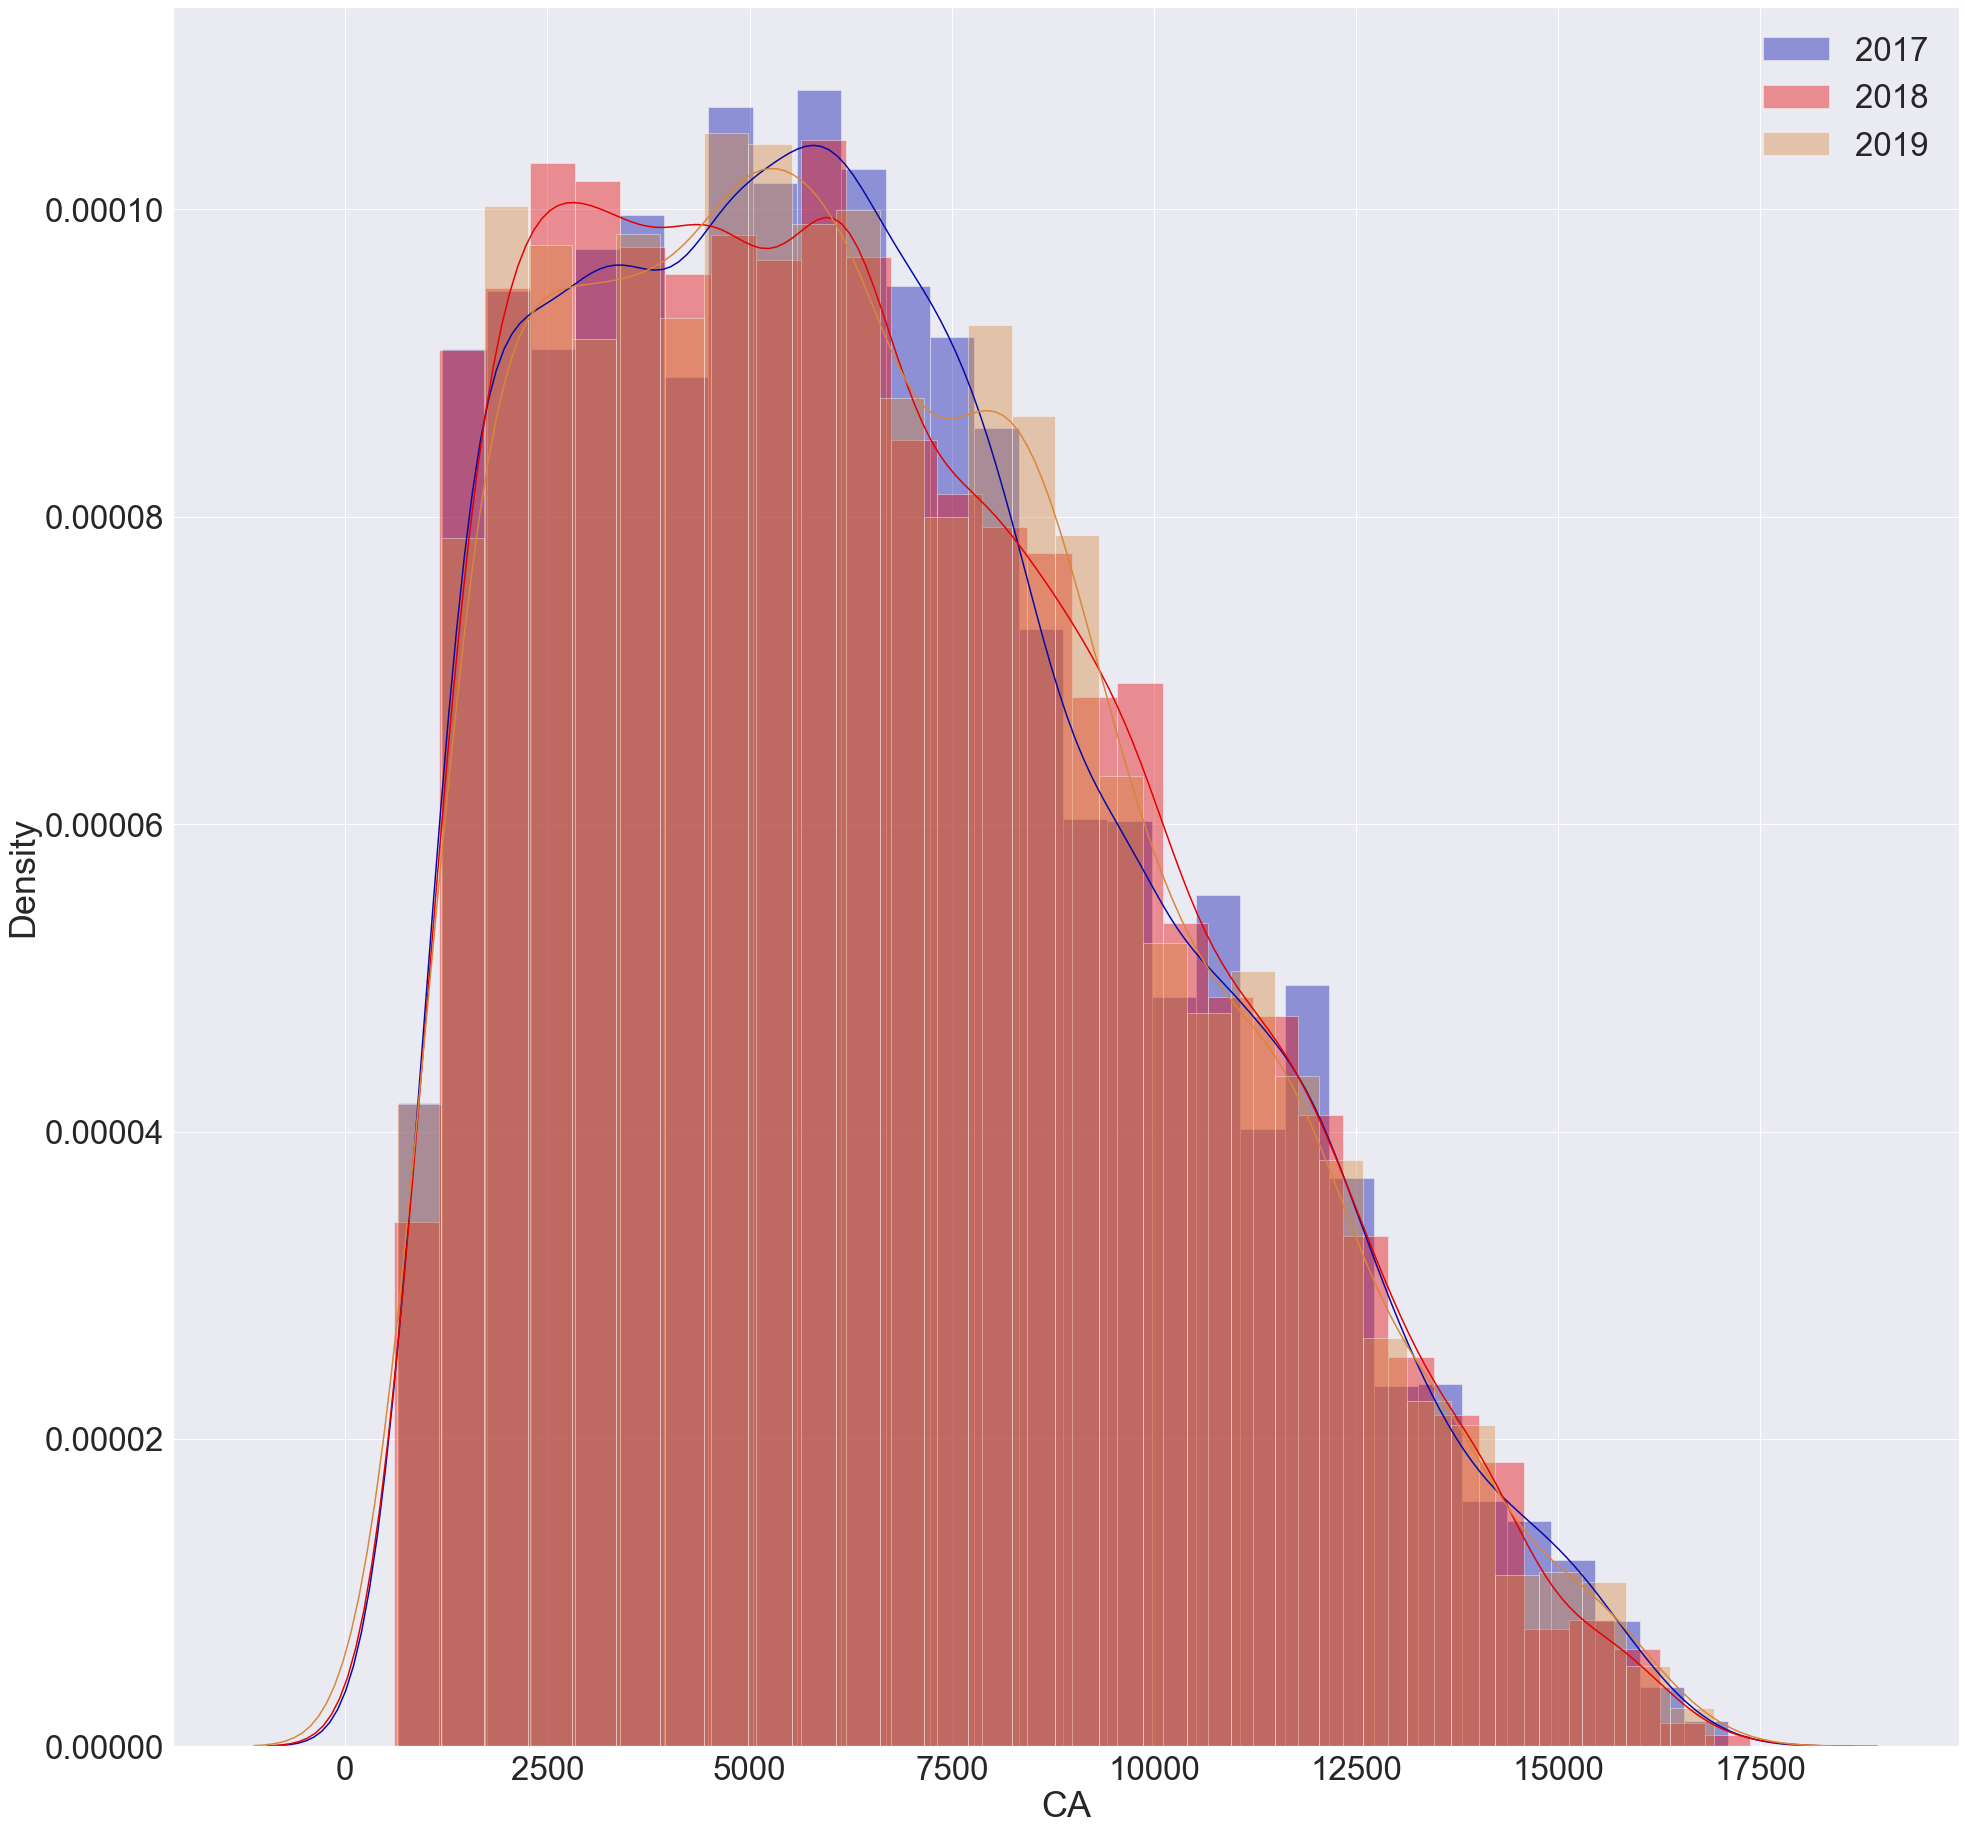
Voici un graphique des chiffres d'affaire. cela ne permet pas de dire la meilleur année car c'est assez bien répartie, mais 2017 à l'air vrai.

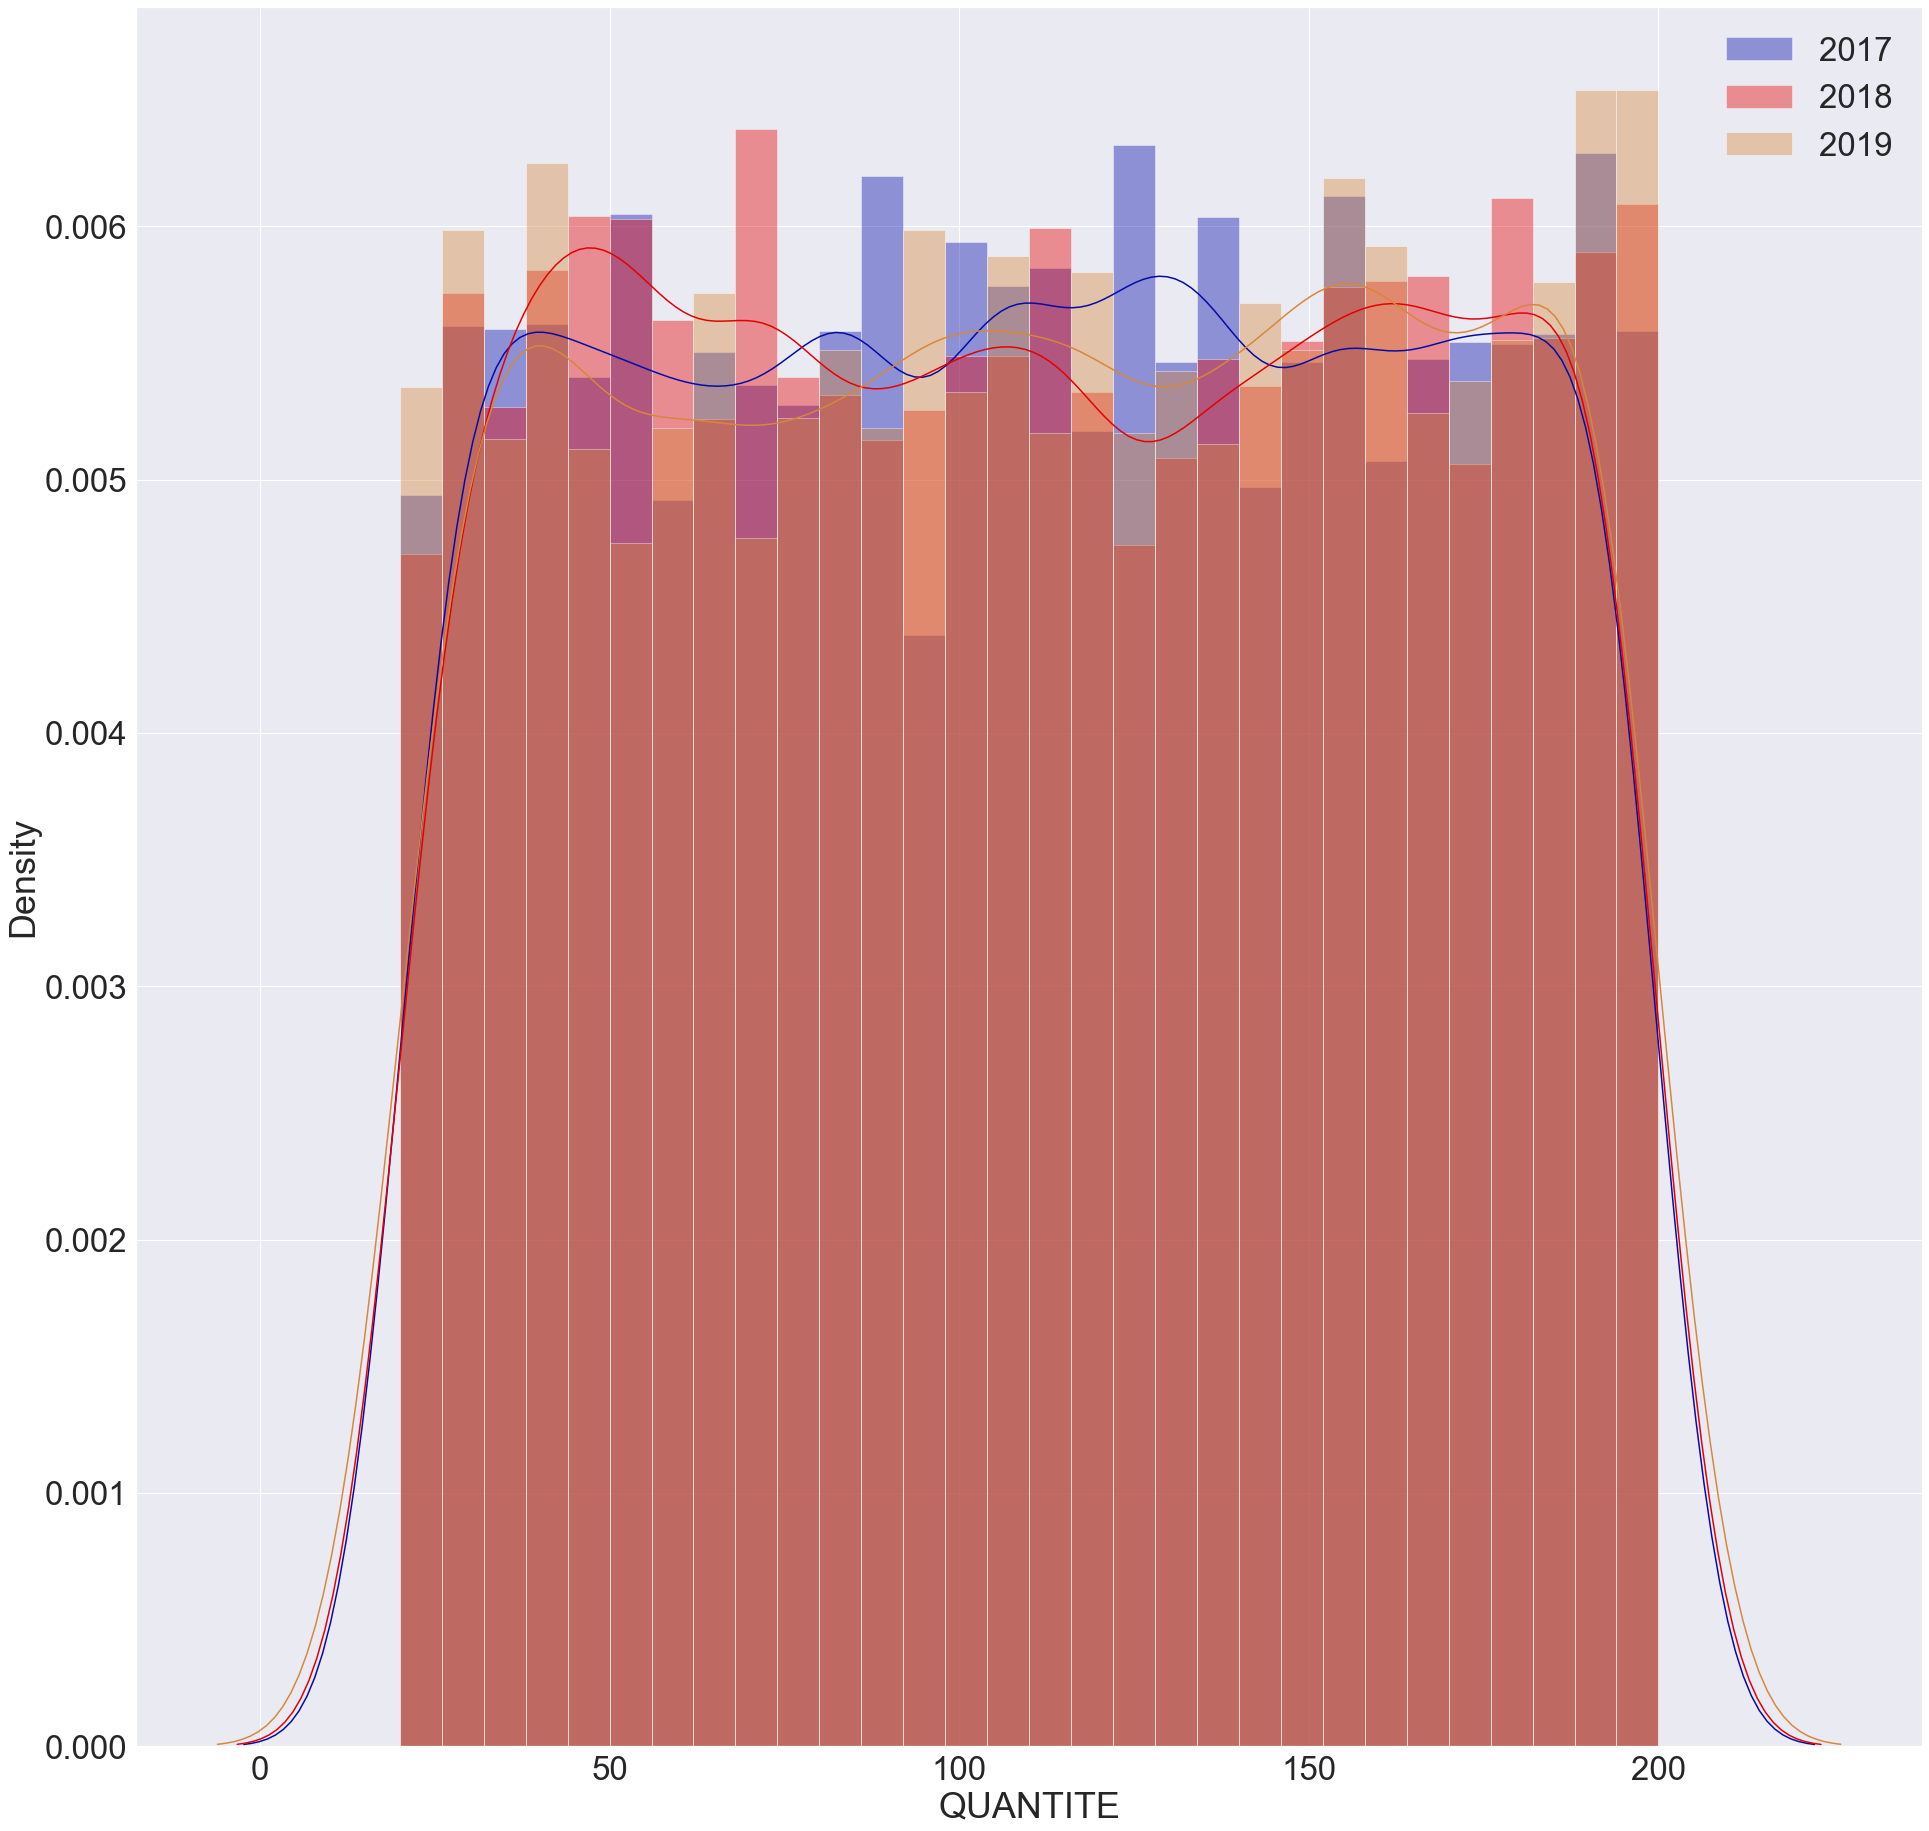

In [43]:
colonne = 'QUANTITE'
plt.figure(figsize=(32,32))
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2017],color=palette[0], label='2017', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2018],color=palette[1], label='2018', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2019],color=palette[2], label='2019', hist_kws=dict(alpha=0.4),bins=30)
plt.legend();

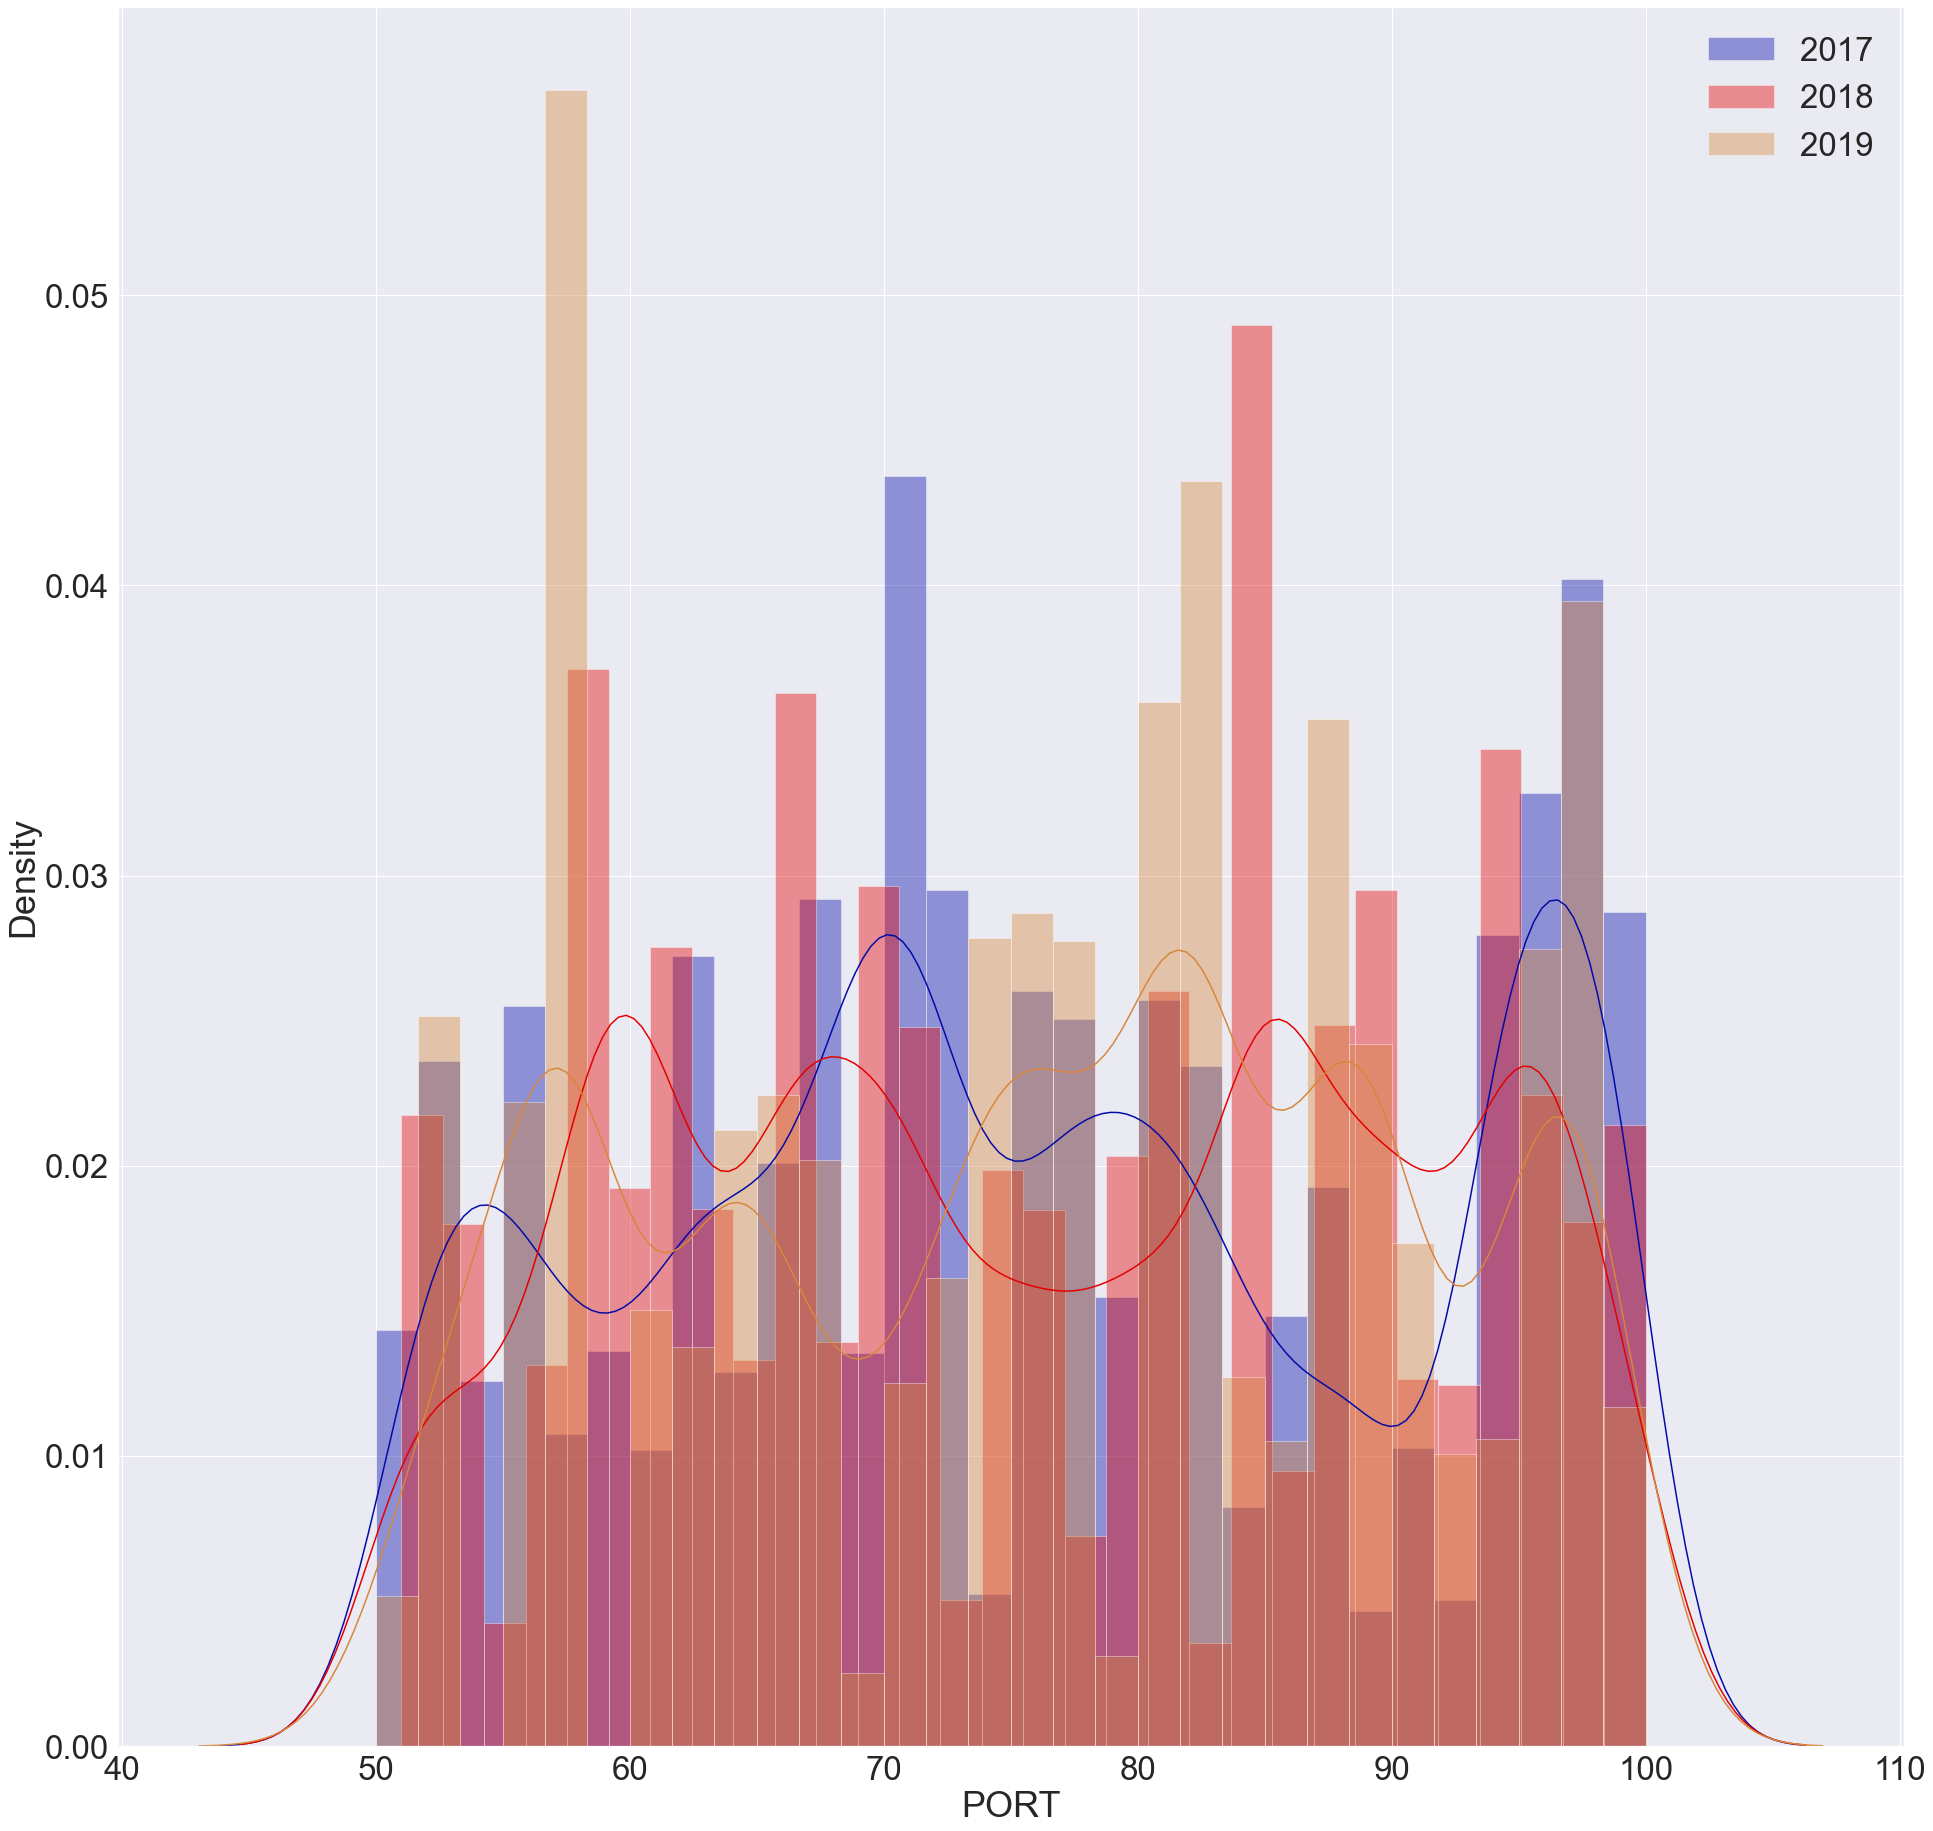

In [30]:
colonne = 'PORT'
plt.figure(figsize=(32,32))
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2017],color=palette[0], label='2017', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2018],color=palette[1], label='2018', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2019],color=palette[2], label='2019', hist_kws=dict(alpha=0.4),bins=30)
plt.legend();

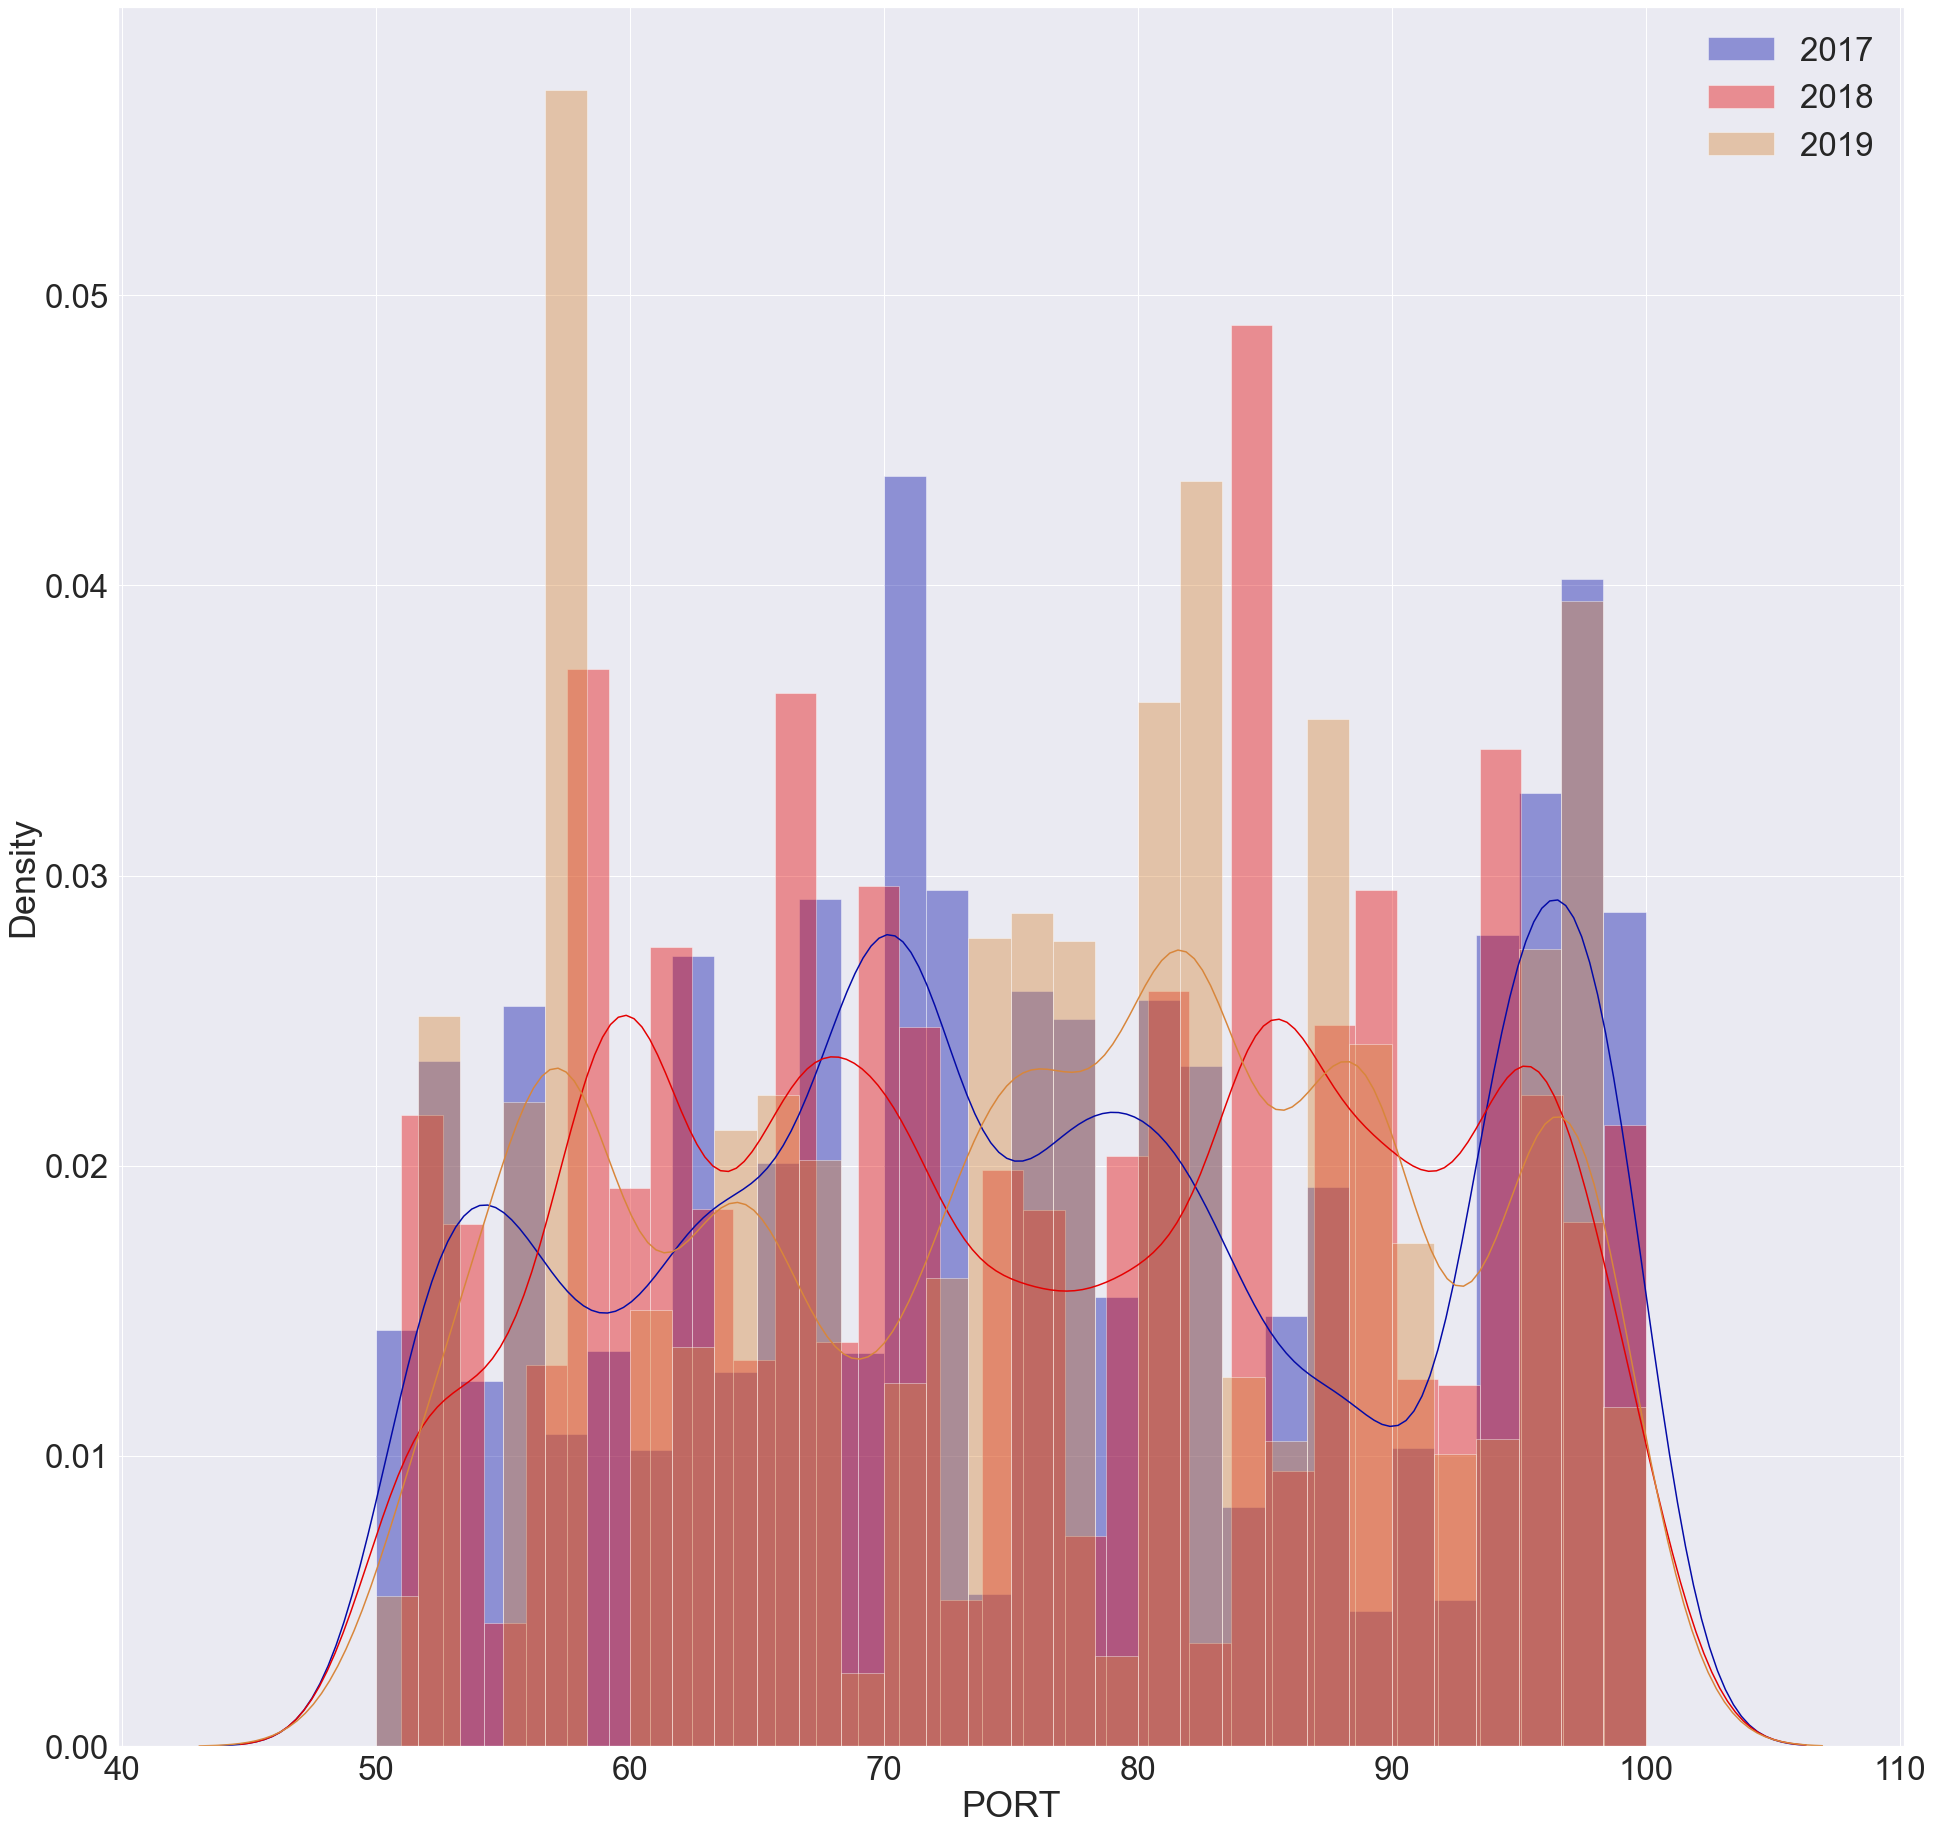
Les frais de port on l'air assez élevé pour l'année 2017

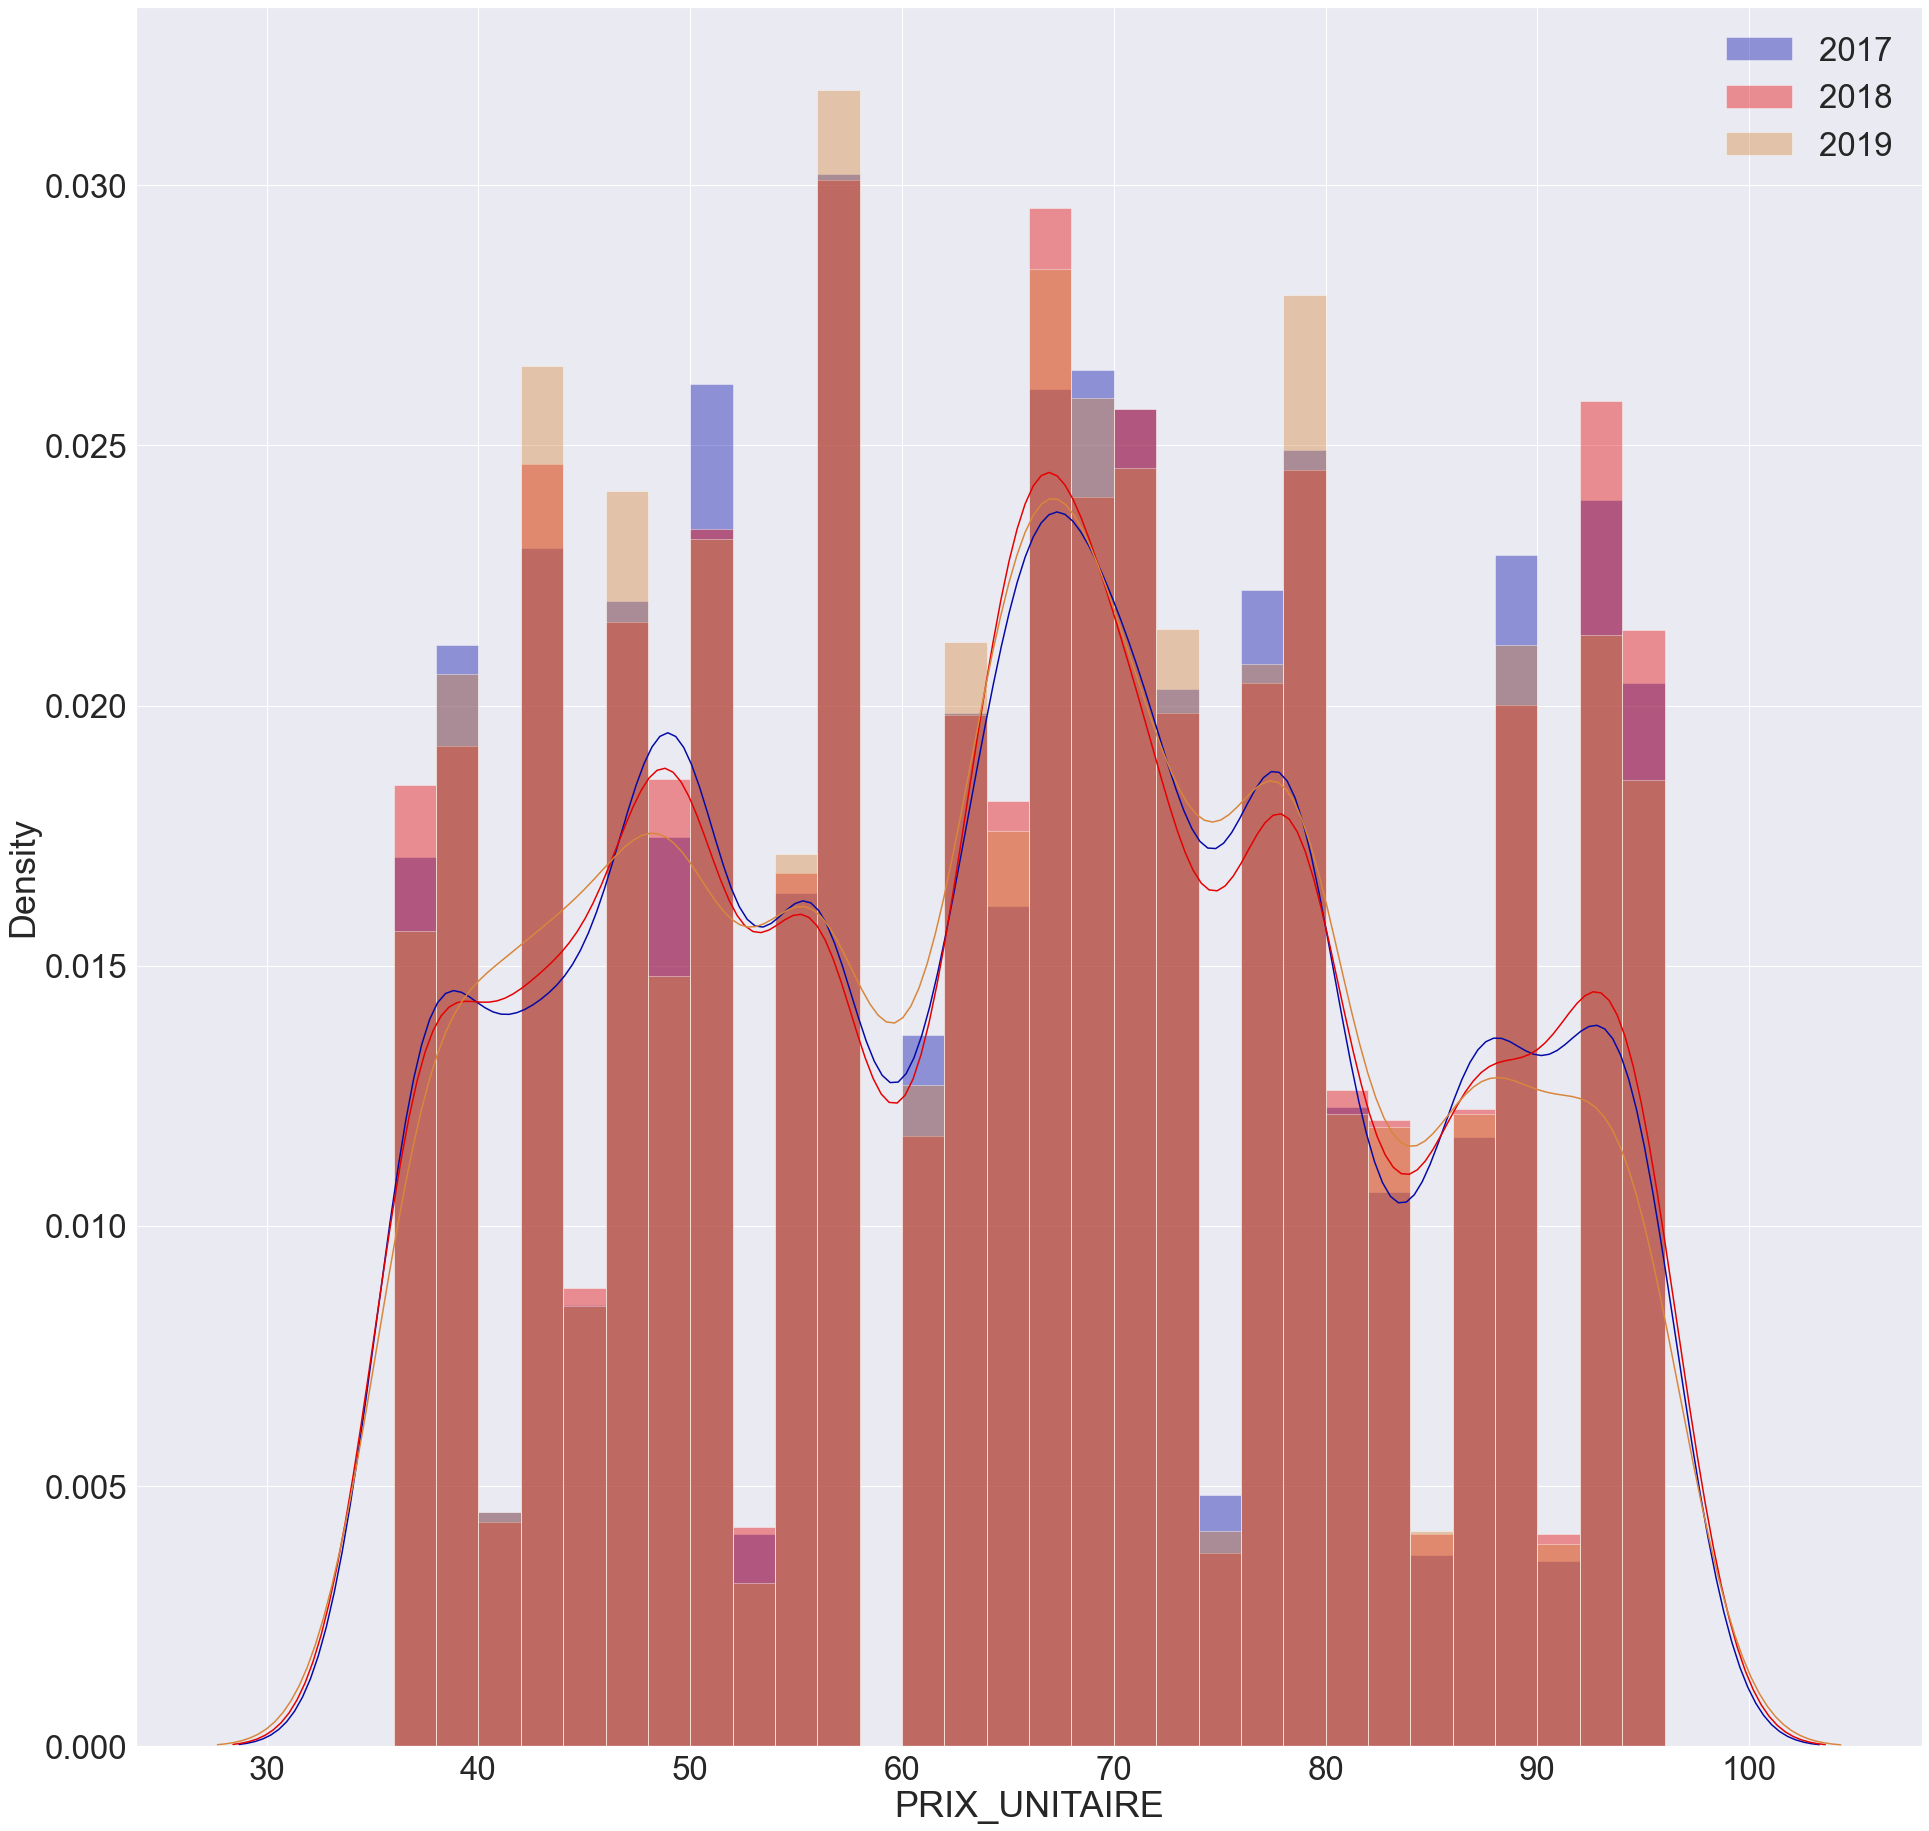

In [31]:
colonne = 'PRIX_UNITAIRE'
plt.figure(figsize=(32,32))
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2017],color=palette[0], label='2017', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2018],color=palette[1], label='2018', hist_kws=dict(alpha=0.4),bins=30)
sns.distplot(donneesve[colonne][donneesve.ANNEE == 2019],color=palette[2], label='2019', hist_kws=dict(alpha=0.4),bins=30)
plt.legend();

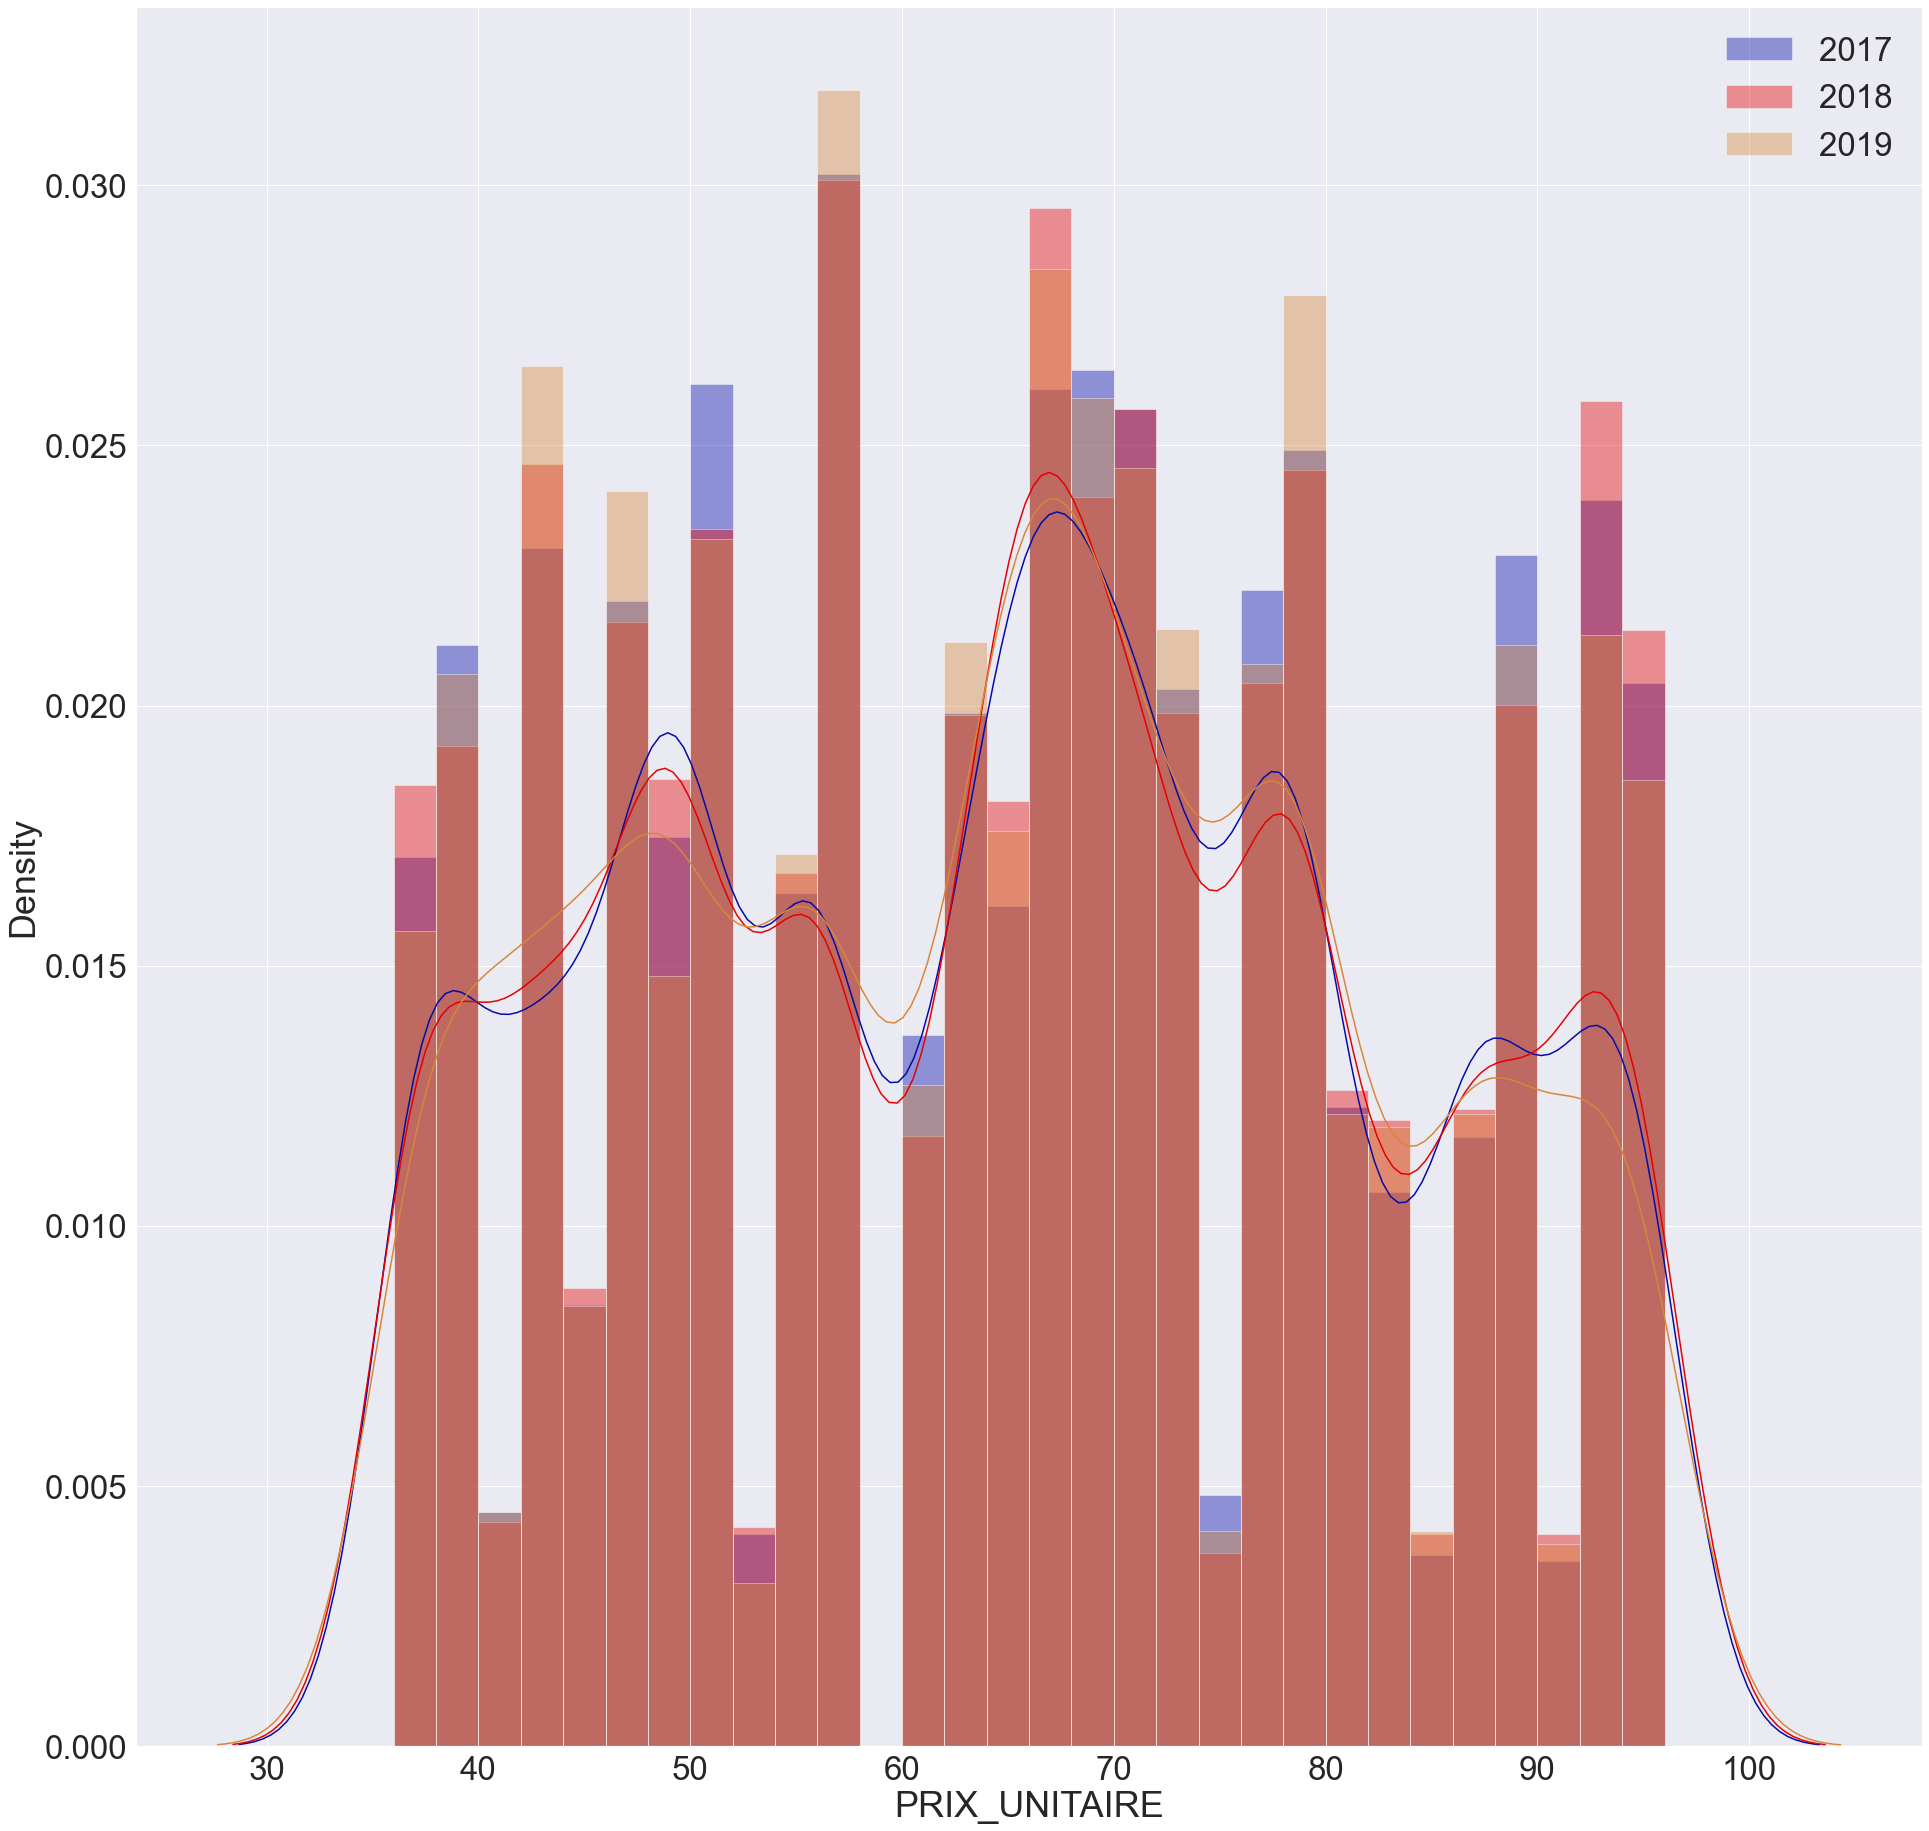
Le prix unitaire ne change quasiment pas d'une année à l'autre, les courbes se confondent

In [32]:
donneesve.groupby(['FOURNISSEUR']).agg({'PORT':['sum','mean','std']}).head(10)

PORT                      
                                       sum       mean        std
FOURNISSEUR                                                     
Aux joyeux ecclésiastiques          130281  76.054291  14.283183
Bigfoot Breweries                   148580  76.000000  13.878770
Cooperativa de Quesos 'Las Cabras'  127586  75.584123  14.413367
Escargots Nouveaux                   97466  75.790047  14.023696
Exotic Liquids                       68201  74.293028  14.361214
Formaggi Fortini s.r.l.             222074  75.896787  14.441427
Forêts d'érables                     44782  77.343696  14.685315
G'day, Mate                          94018  76.004850  13.964355
Gai pâturage                         48973  76.400936  14.278697
Grandma Kelly's Homestead            69061  76.310497  14.346523

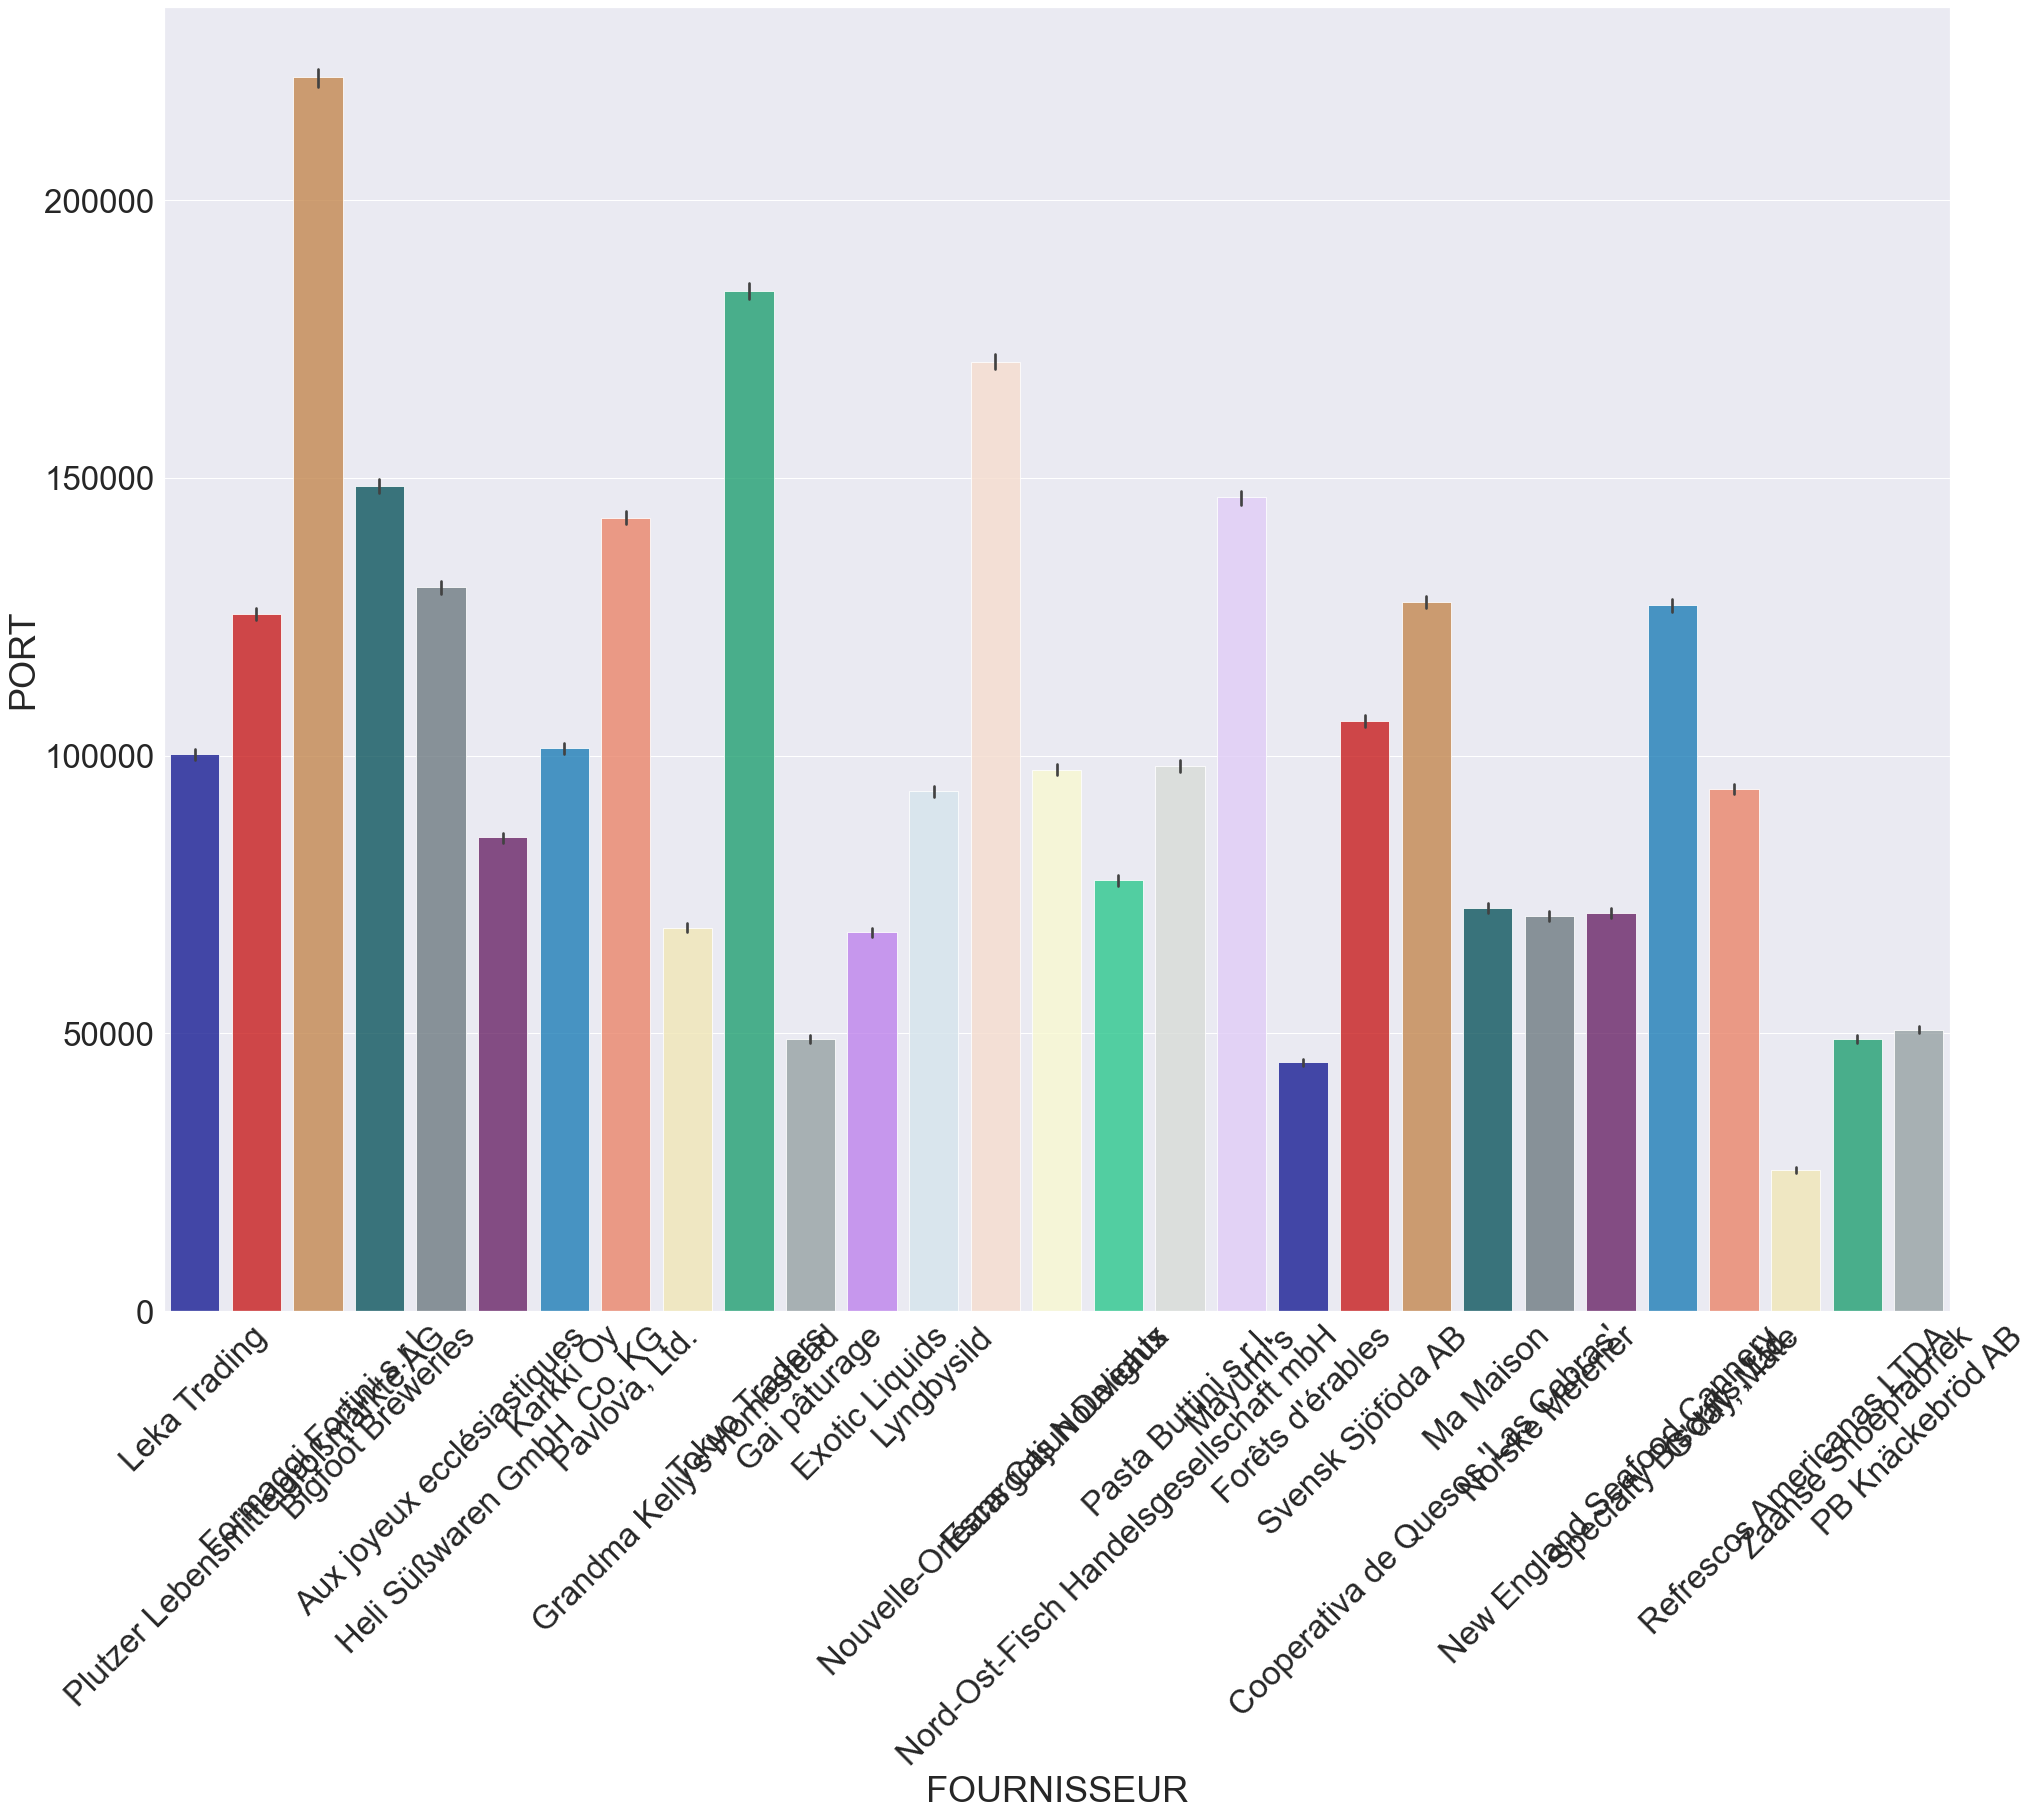

In [40]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='FOURNISSEUR',y='PORT',data=donneesve, palette=palette, alpha=0.8, estimator=np.sum)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

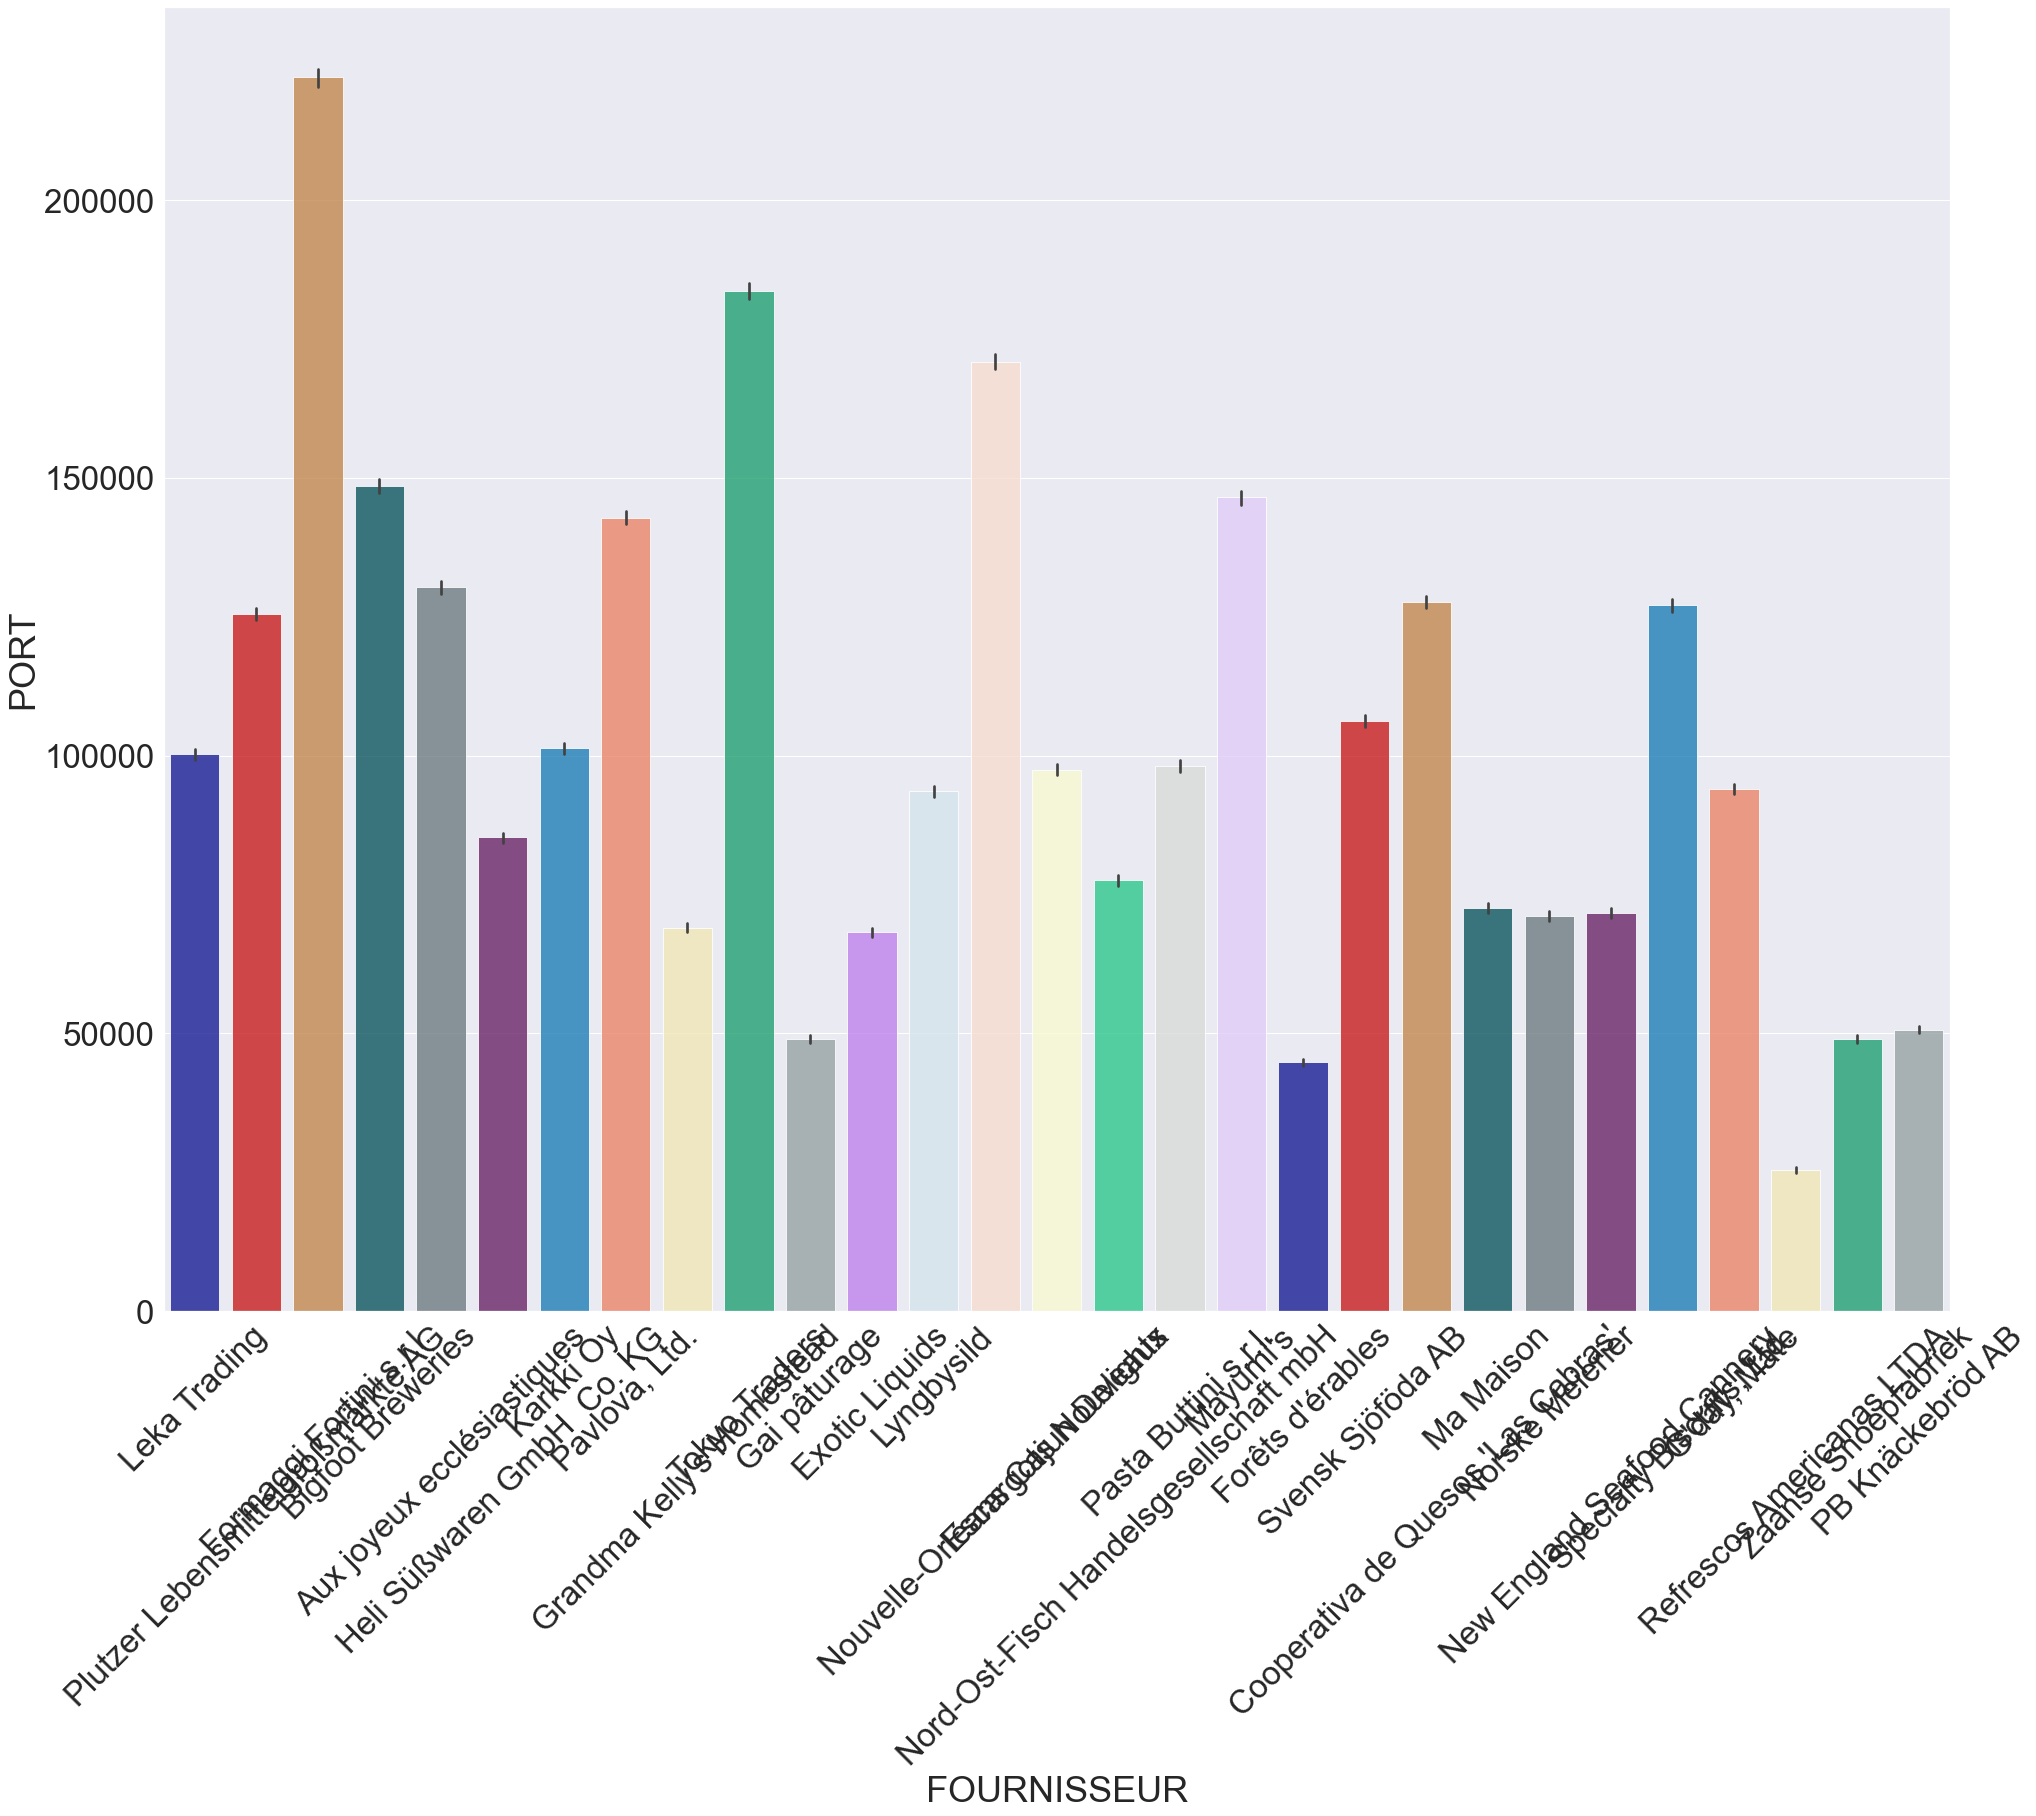
Voici les frais de port total selon le fournisseur

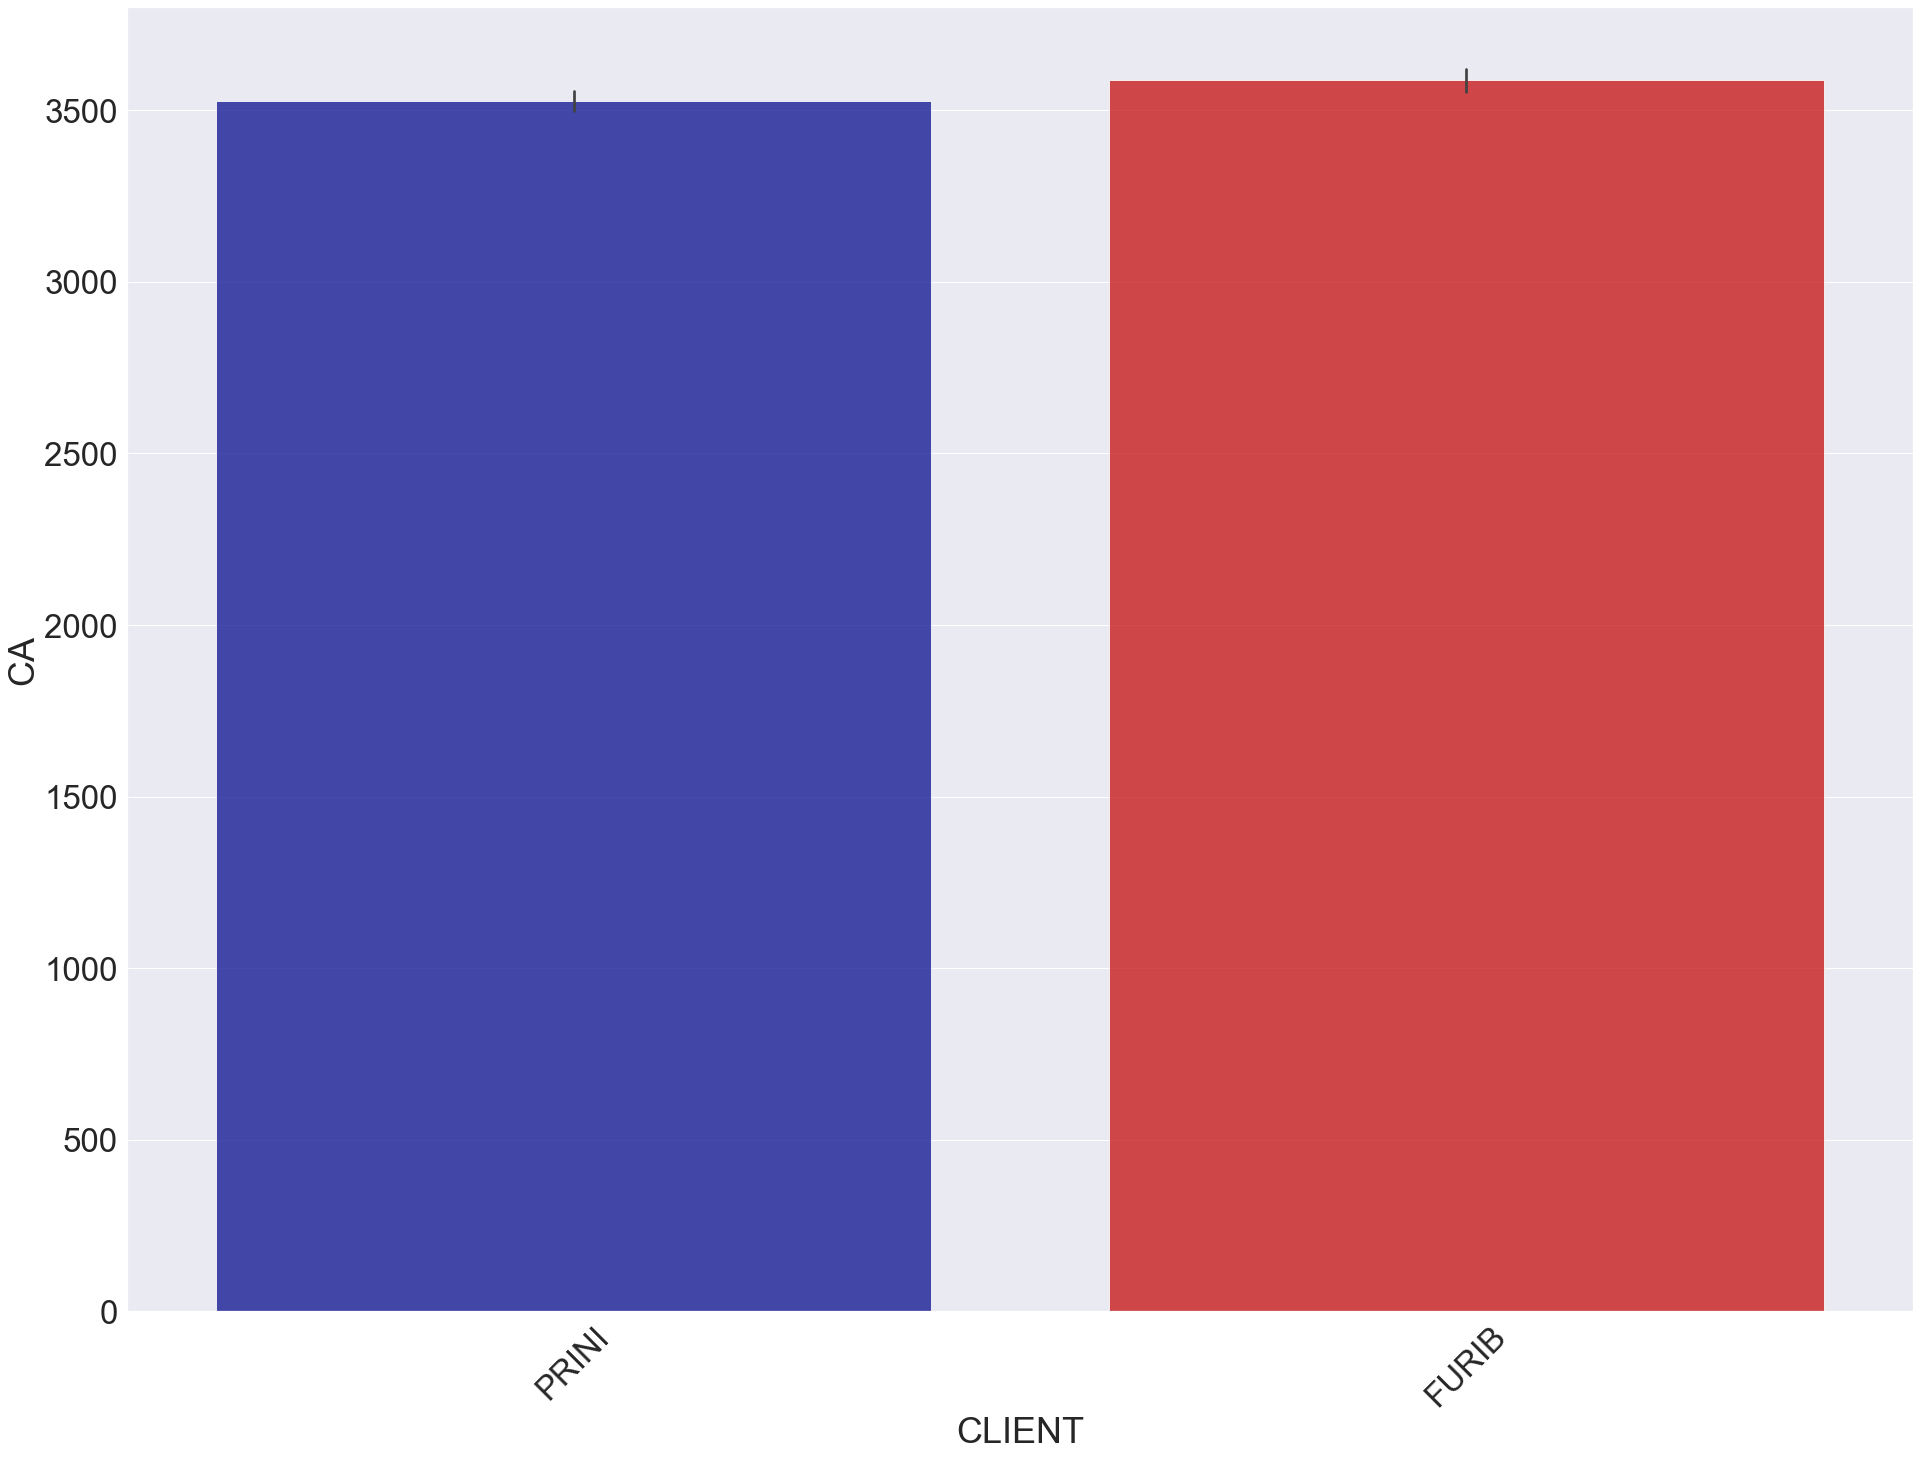

In [17]:
plt.figure(figsize=(32,24))
gbarplot = sns.barplot(x='CLIENT',y='CA',data=donneesv, palette=palette, alpha=0.8, estimator=np.std)
xloc, xlabels = plt.xticks()
gbarplot.set_xticklabels(xlabels, rotation=45);

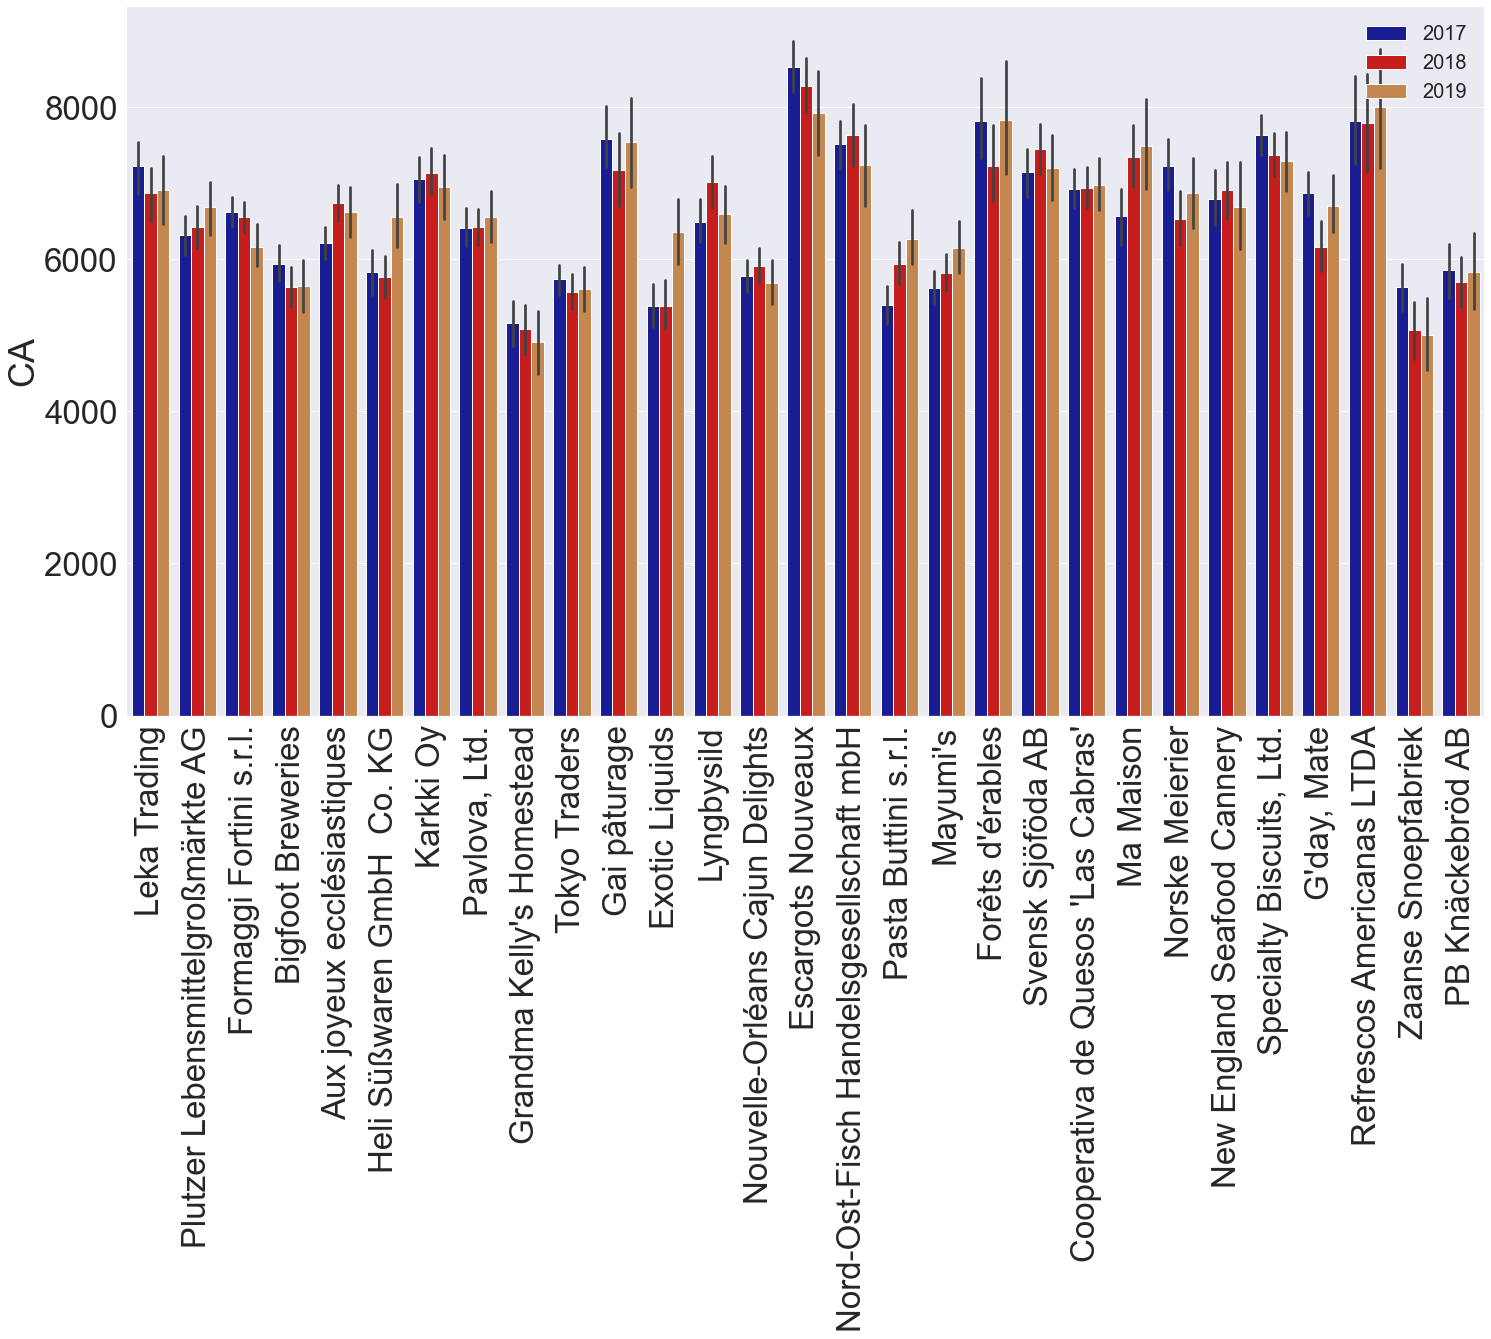

In [18]:
graph = sns.catplot(x="FOURNISSEUR", 
                    y="CA", 
                    hue="ANNEE", 
                    data=donneesve,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette=palette,
                    legend=False);

graph.despine(left=True);
graph.set_xticklabels(rotation=90);
graph.set_xlabels('');
# graph.set_ylabels('');
plt.legend(loc='upper right', title_fontsize=20, fontsize=20);

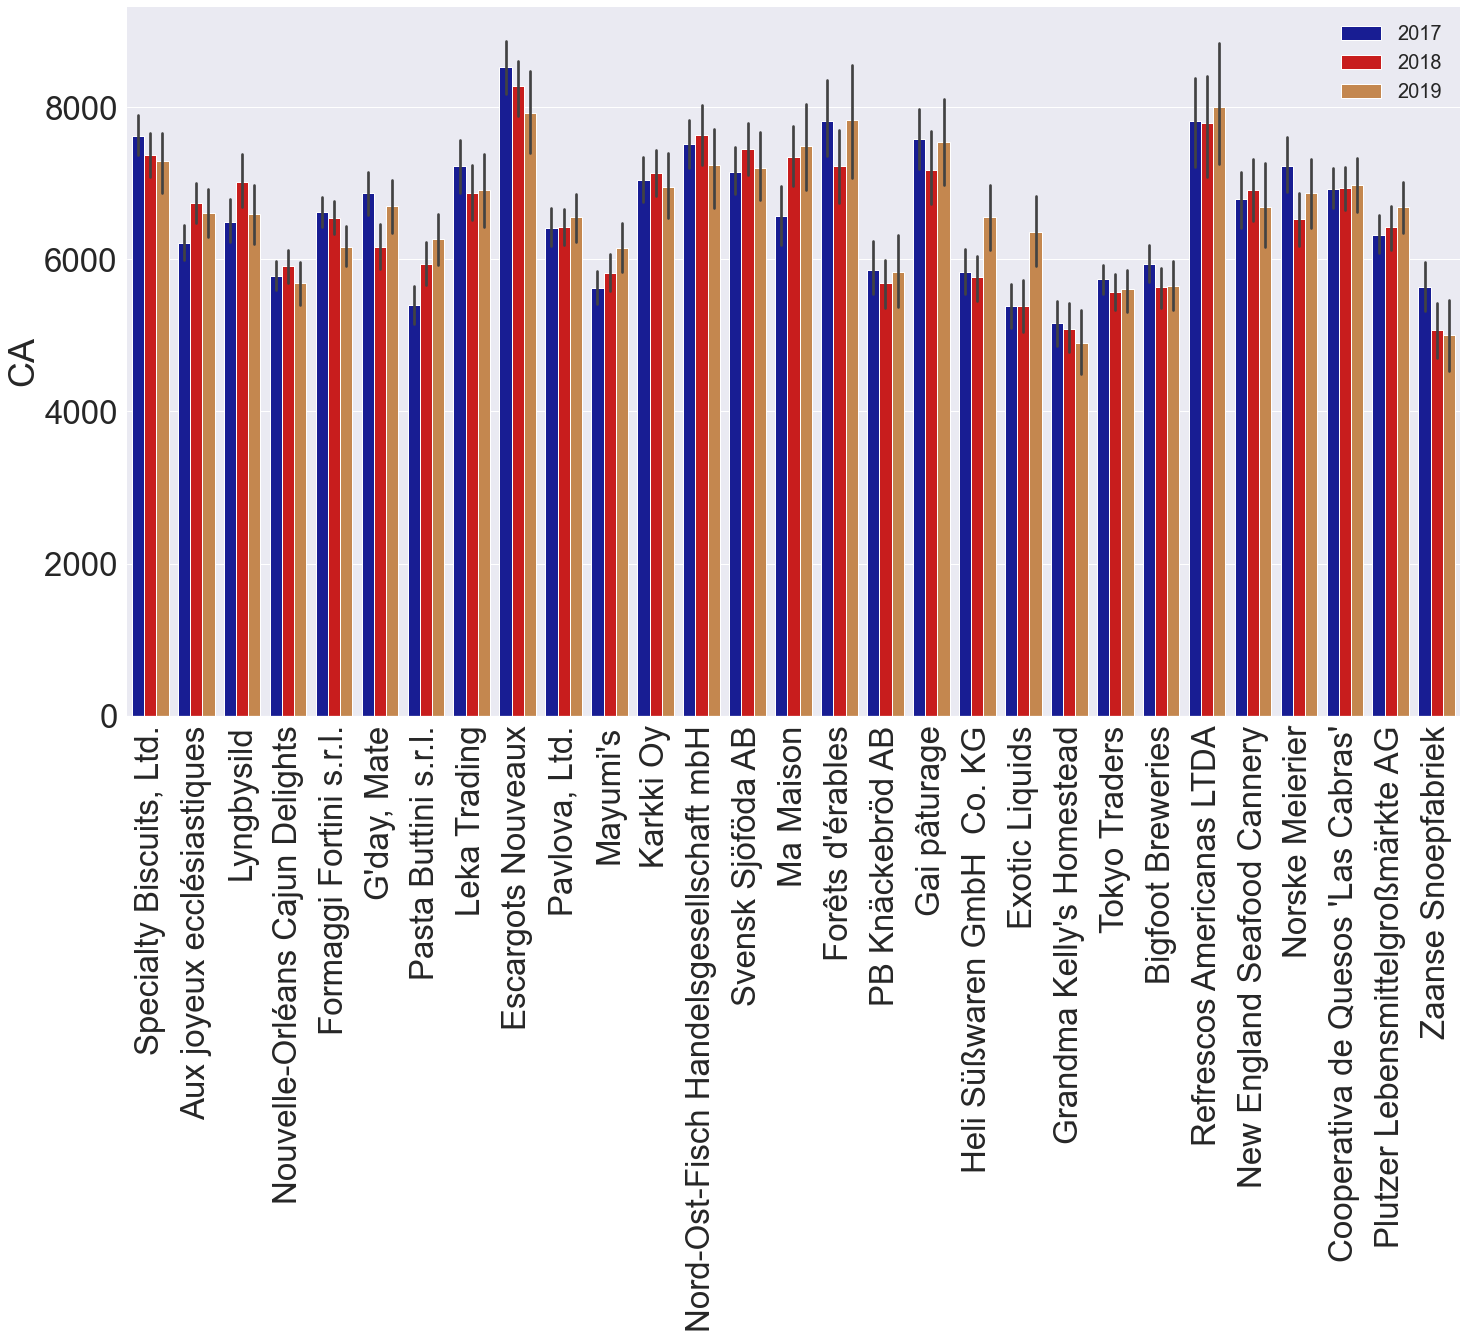
Voici les chiffre d'affaire selon le fournisseur, le meilleur est par le fournisseur escargot nouveau en 2017

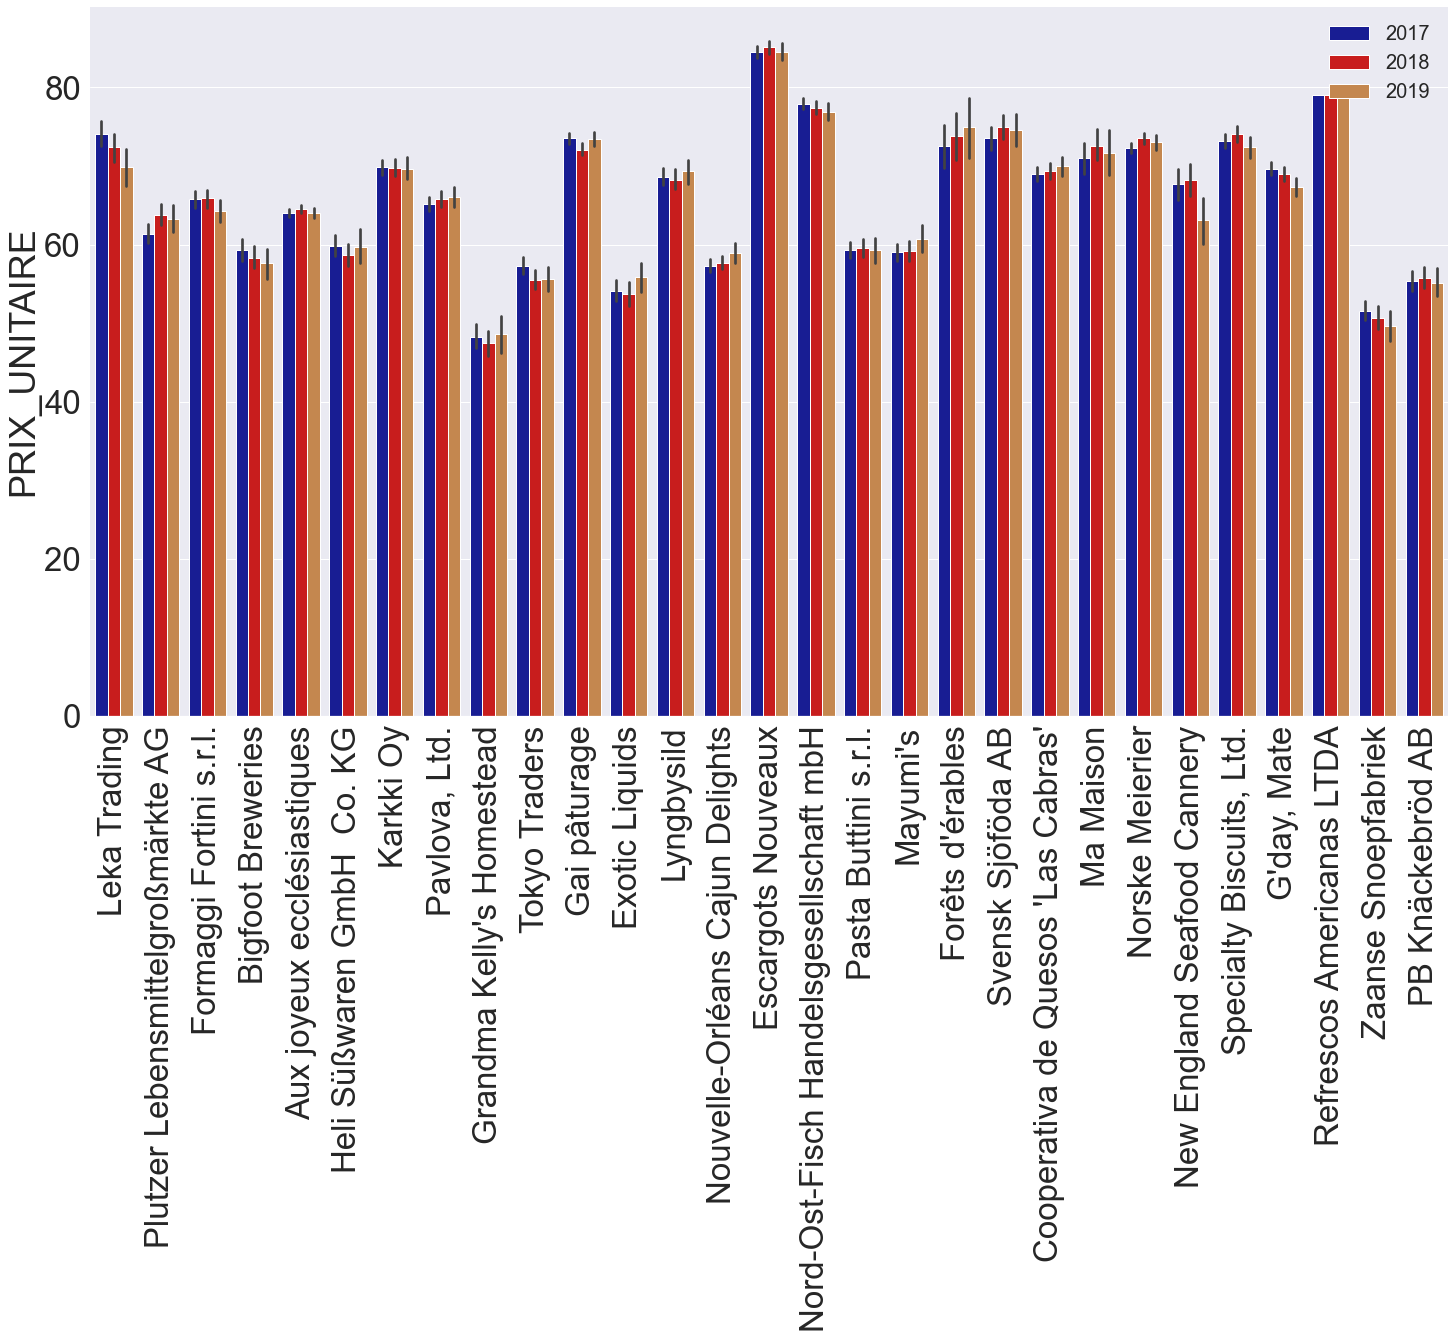

In [33]:
graph = sns.catplot(x="FOURNISSEUR", 
                    y="PRIX_UNITAIRE", 
                    hue="ANNEE", 
                    data=donneesve,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette=palette,
                    legend=False);

graph.despine(left=True);
graph.set_xticklabels(rotation=90);
graph.set_xlabels('');
# graph.set_ylabels('');
plt.legend(loc='upper right', title_fontsize=20, fontsize=20);

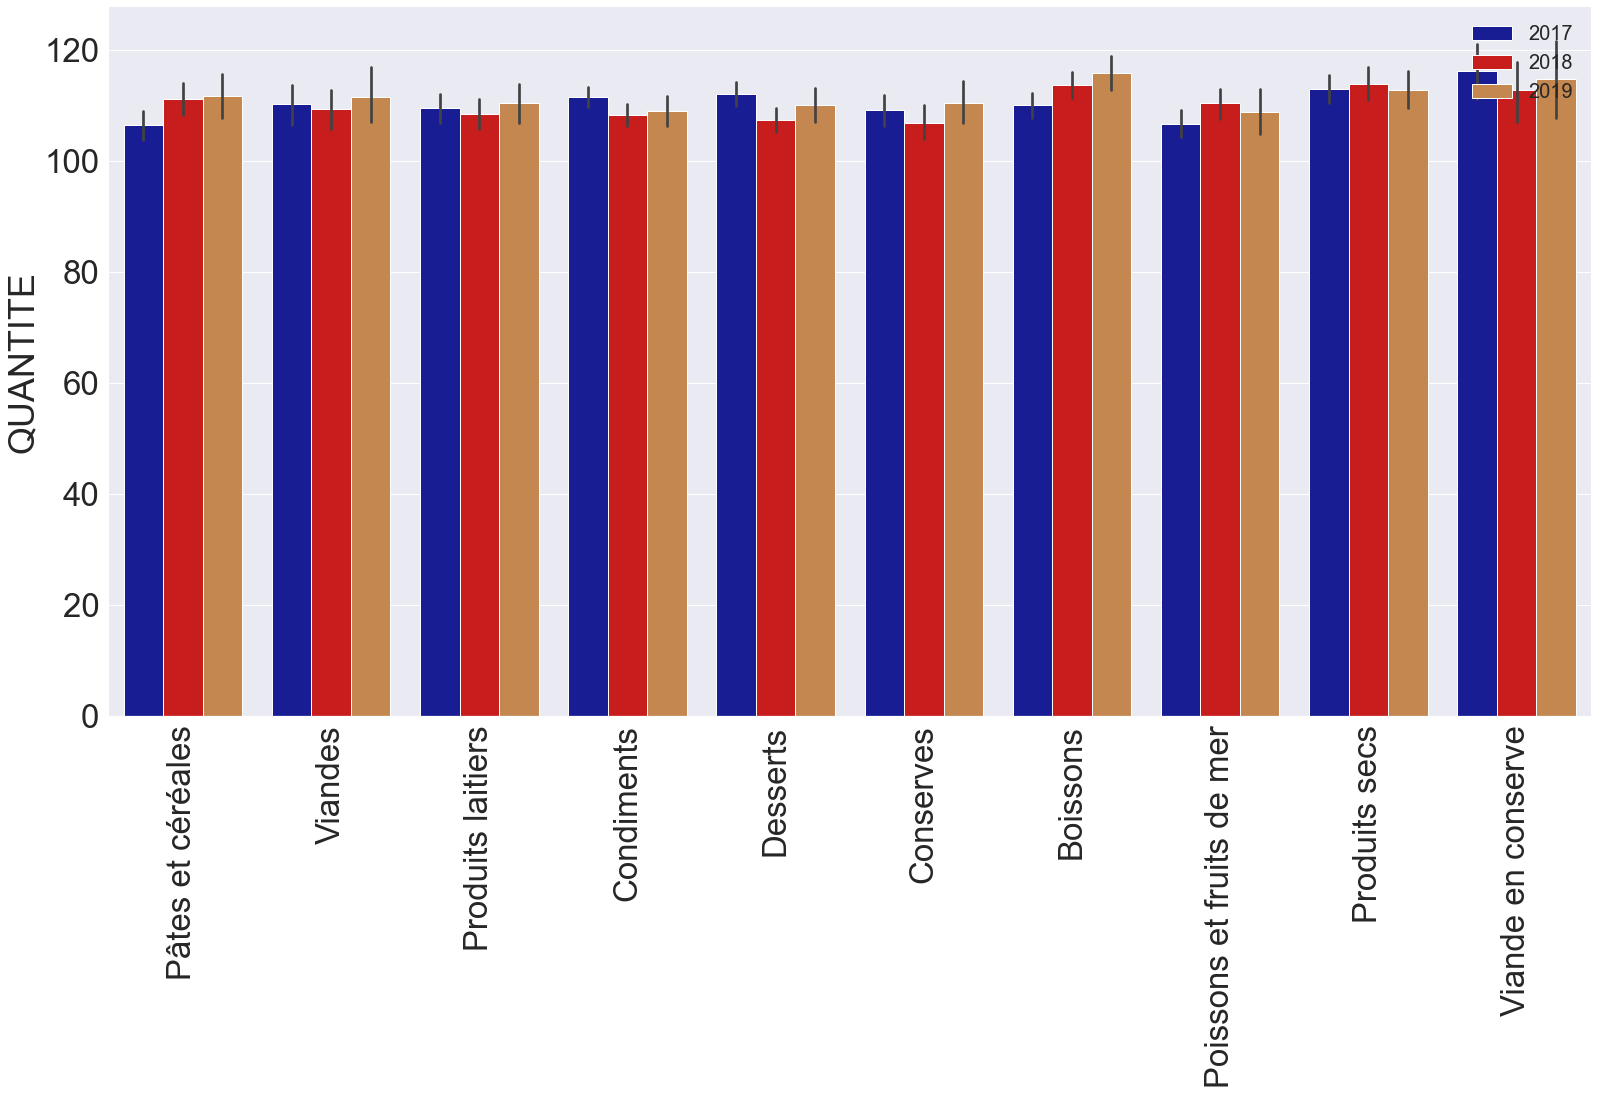

In [26]:
graph = sns.catplot(x="CATEGORIE", 
                    y="QUANTITE", 
                    hue="ANNEE", 
                    data=donneesve,
                    height=12, 
                    kind="bar", 
                    aspect=2,
                    palette=palette,
                    legend=False);

graph.despine(left=True);
graph.set_xticklabels(rotation=90);
graph.set_xlabels('');
# graph.set_ylabels('');
plt.legend(loc='upper right', title_fontsize=20, fontsize=20);

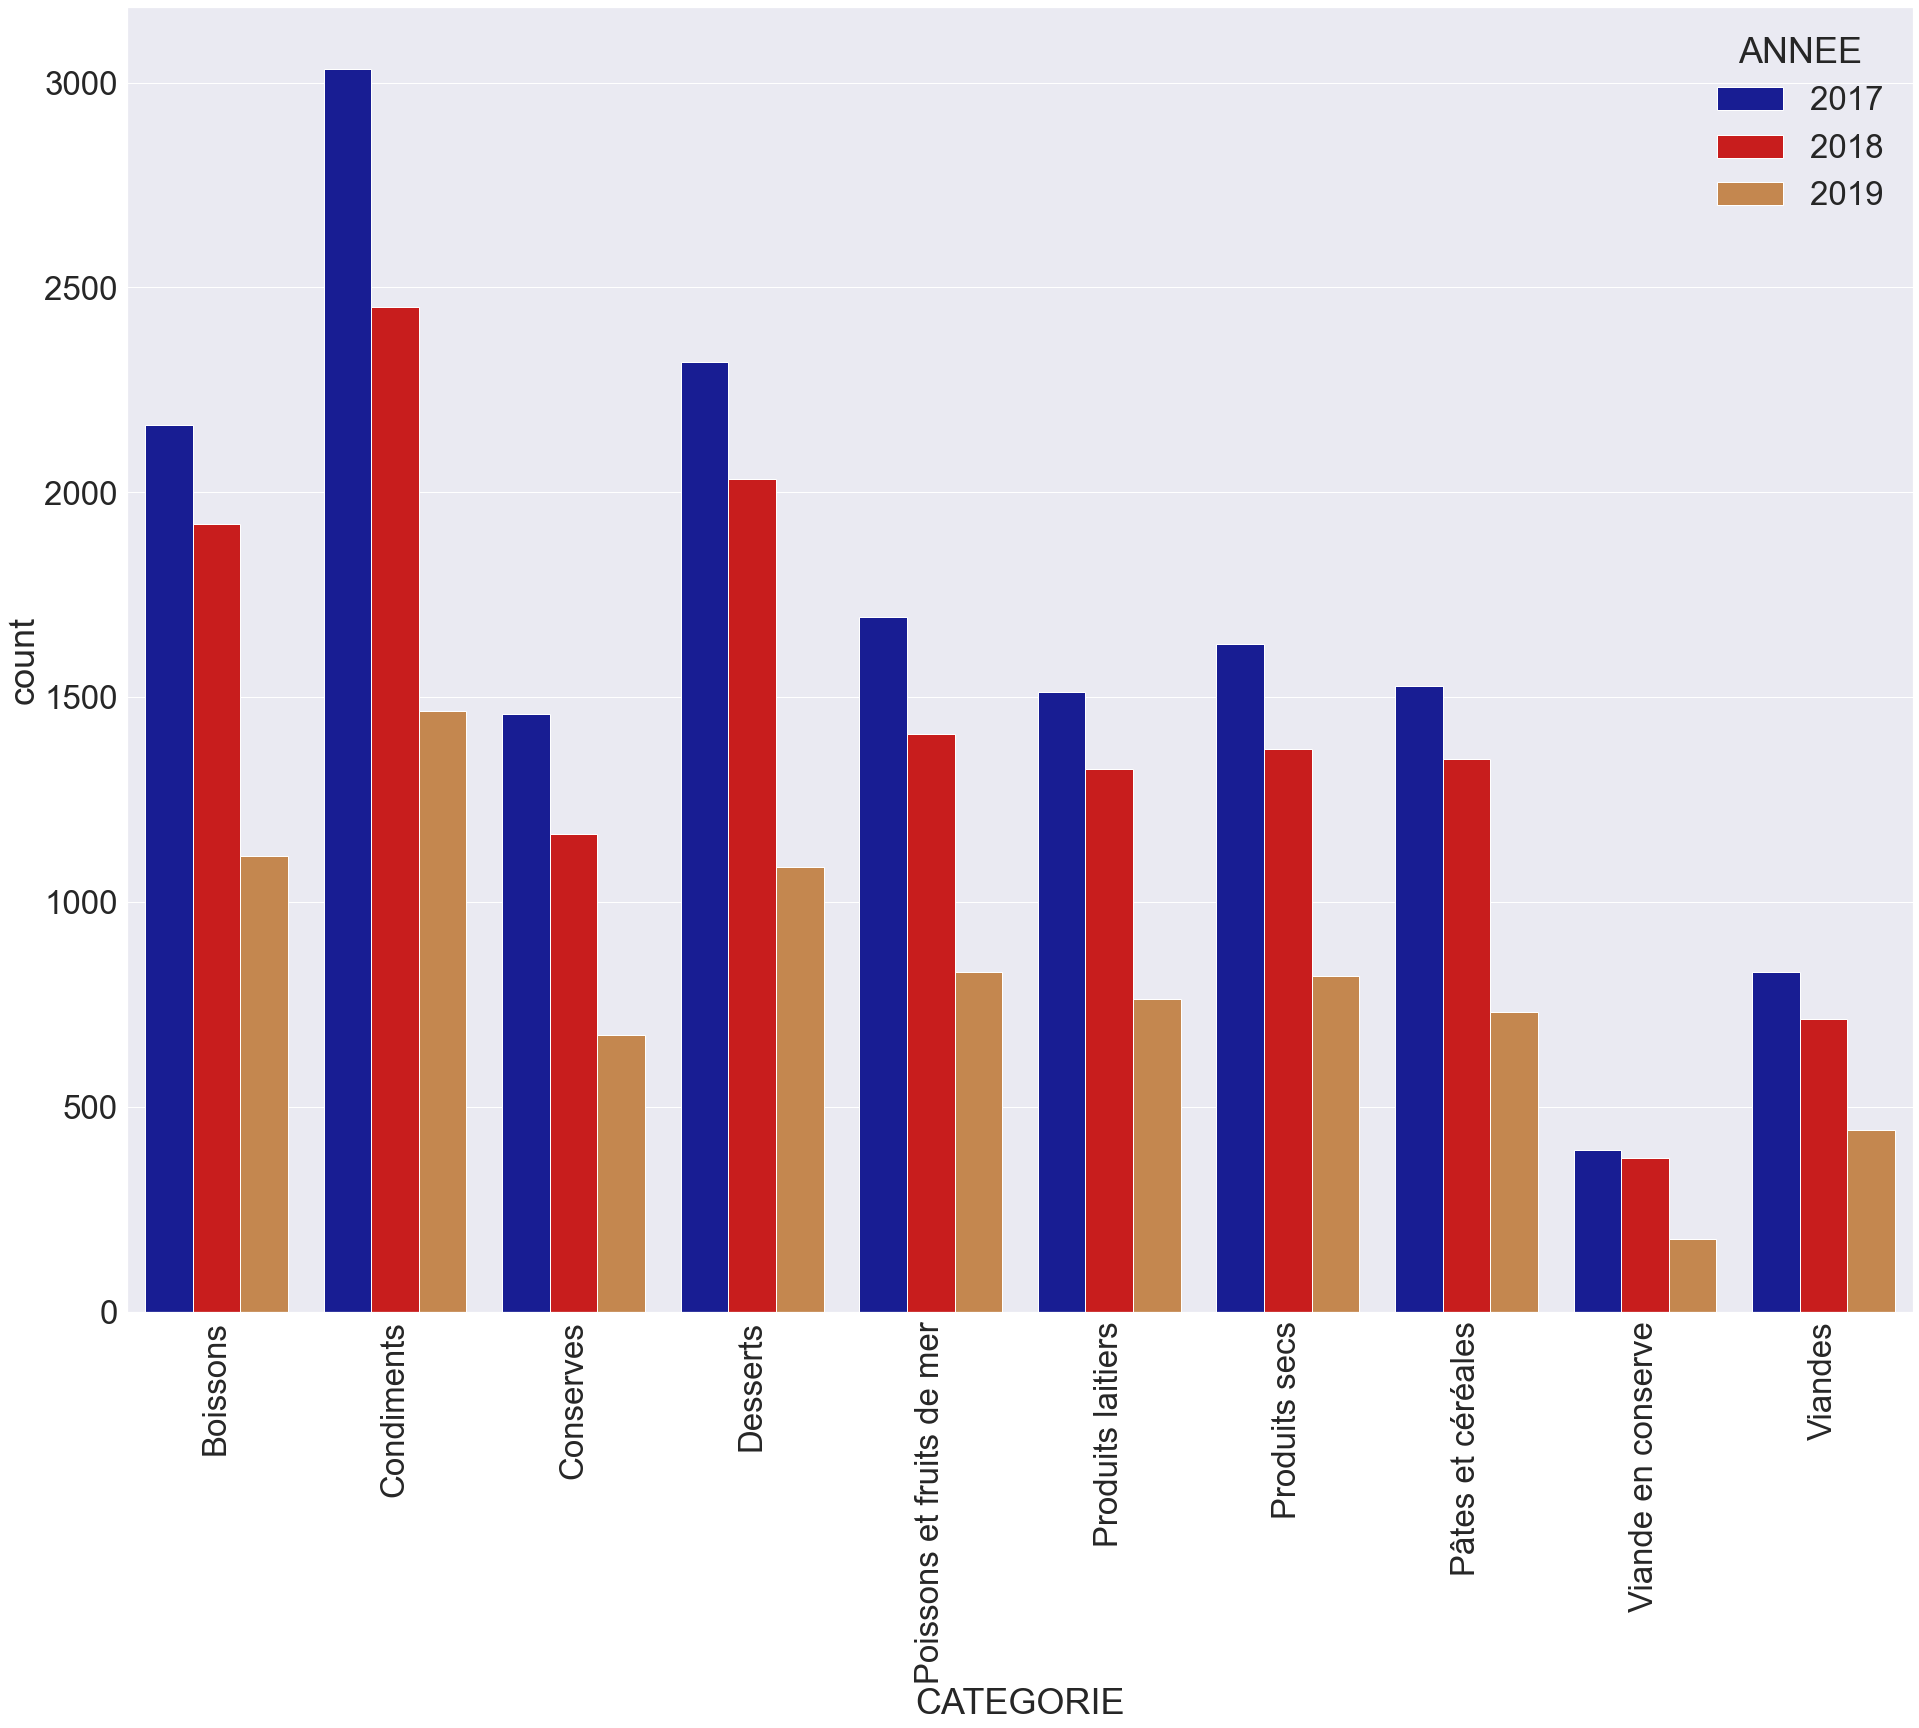

In [42]:
plt.figure(figsize=(32,24))
graph = sns.countplot(x='CATEGORIE',
                      hue='ANNEE',
                      data=donneesve.sort_values('CATEGORIE'), 
                      palette=palette);
graph.set_xticklabels(donneesve.sort_values('CATEGORIE').CATEGORIE.unique(),rotation=90);

In [35]:
d=donneesve.groupby(['ANNEE','FOURNISSEUR']).agg({'PORT':['sum']}).reset_index()
d.columns=['ANNEE','FOURNISSEUR','PORT']
d.head()

ANNEE                         FOURNISSEUR   PORT
0   2017          Aux joyeux ecclésiastiques  55443
1   2017                   Bigfoot Breweries  63918
2   2017  Cooperativa de Quesos 'Las Cabras'  54978
3   2017                  Escargots Nouveaux  40854
4   2017                      Exotic Liquids  31173

In [36]:
donneesv.assign(
                 annee_mois = donneesve.ANNEE.astype('str')+donneesve.MOIS.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'QUANTITE':['sum']
                                 }).head(10)

QUANTITE
                sum
annee_mois         
201701       149334
201702        53734
201703       126228
201704       290323
201705       102199
201706       184553
201707       240055
201708       157850
201709       106246
201710       151175

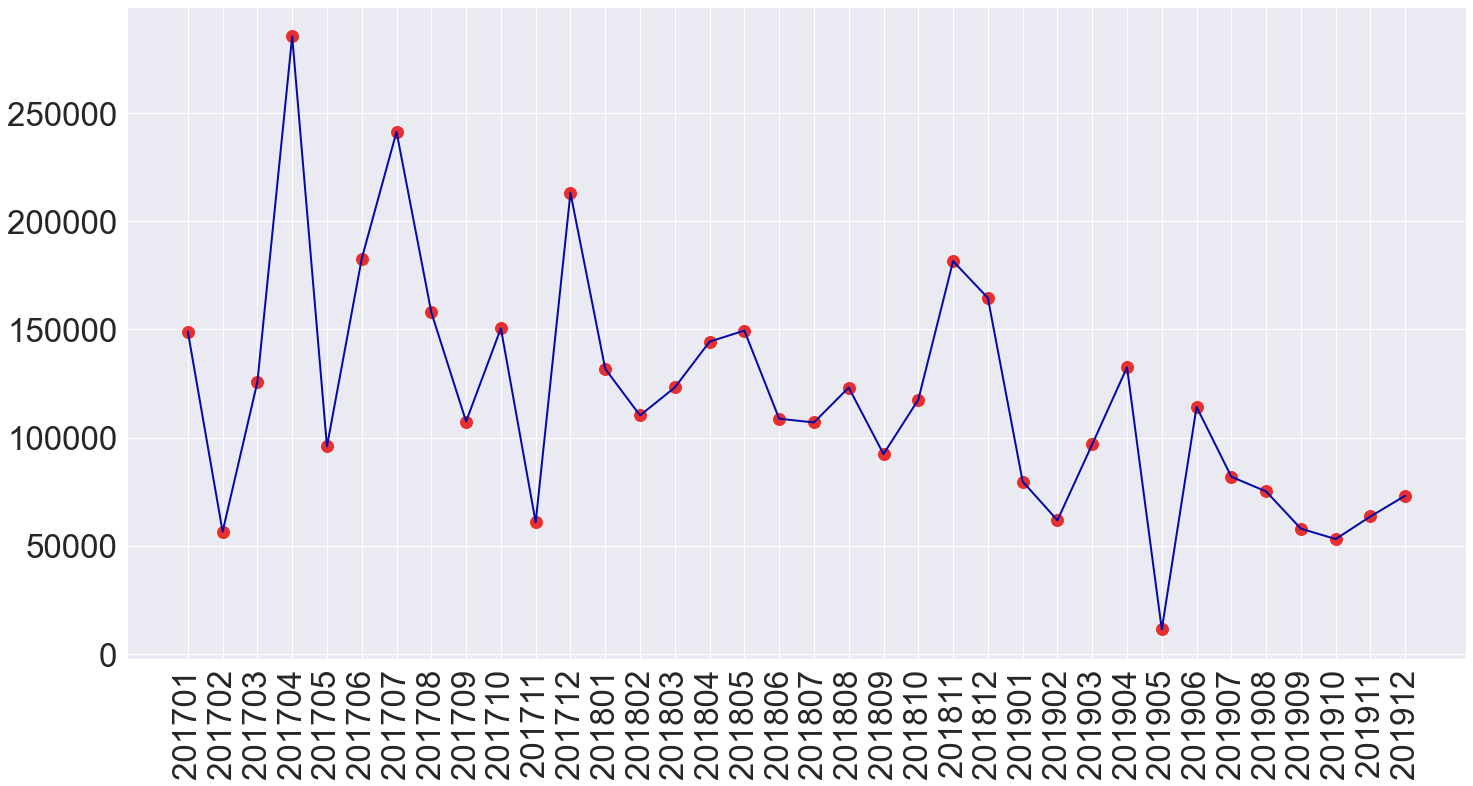

In [37]:
calcul = donneesve.assign(
                 annee_mois = donneesve.ANNEE.astype('str')+donneesve.MOIS.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'QUANTITE':['sum']
                                 }).reset_index()
calcul.columns = ['annee_mois','QUANTITE']


plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "QUANTITE", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "QUANTITE", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
graph.set_xlabel('');
graph.set_ylabel('');    
graph.set_xticklabels(calcul.annee_mois,rotation=90);

Ceci correspond bien à l'analyse du debut pour les meilleur et pire mois pour les quantité vendue

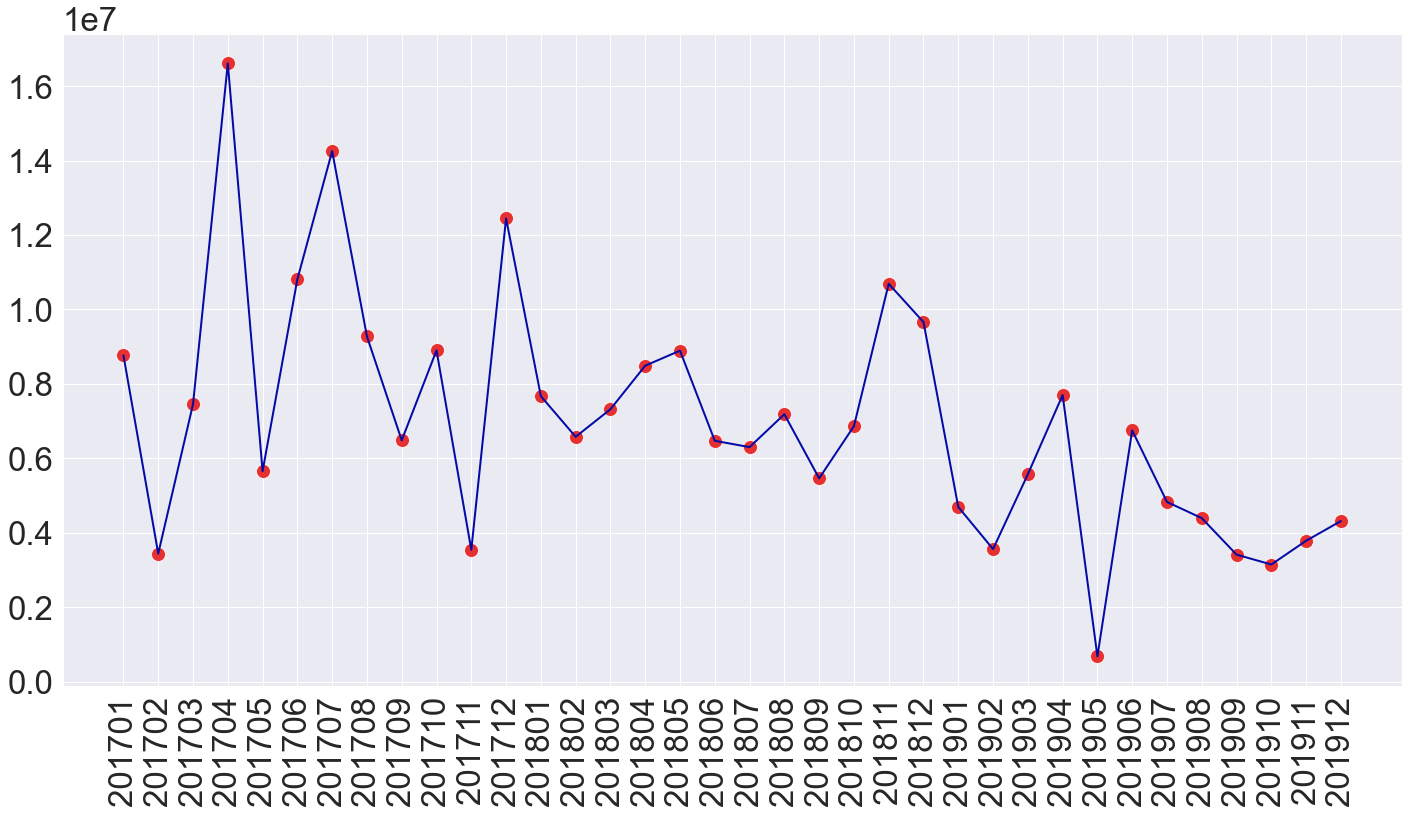

In [38]:
calcul = donneesve.assign(
                 annee_mois = donneesve.ANNEE.astype('str')+donneesve.MOIS.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'CA':['sum']
                                 }).reset_index()
calcul.columns = ['annee_mois','CA']


plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "CA", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "CA", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
graph.set_xlabel('');
graph.set_ylabel('');    
graph.set_xticklabels(calcul.annee_mois,rotation=90);

cecie correspond bien à l'analyse du meilleur chiffre d'affaire selon l'année

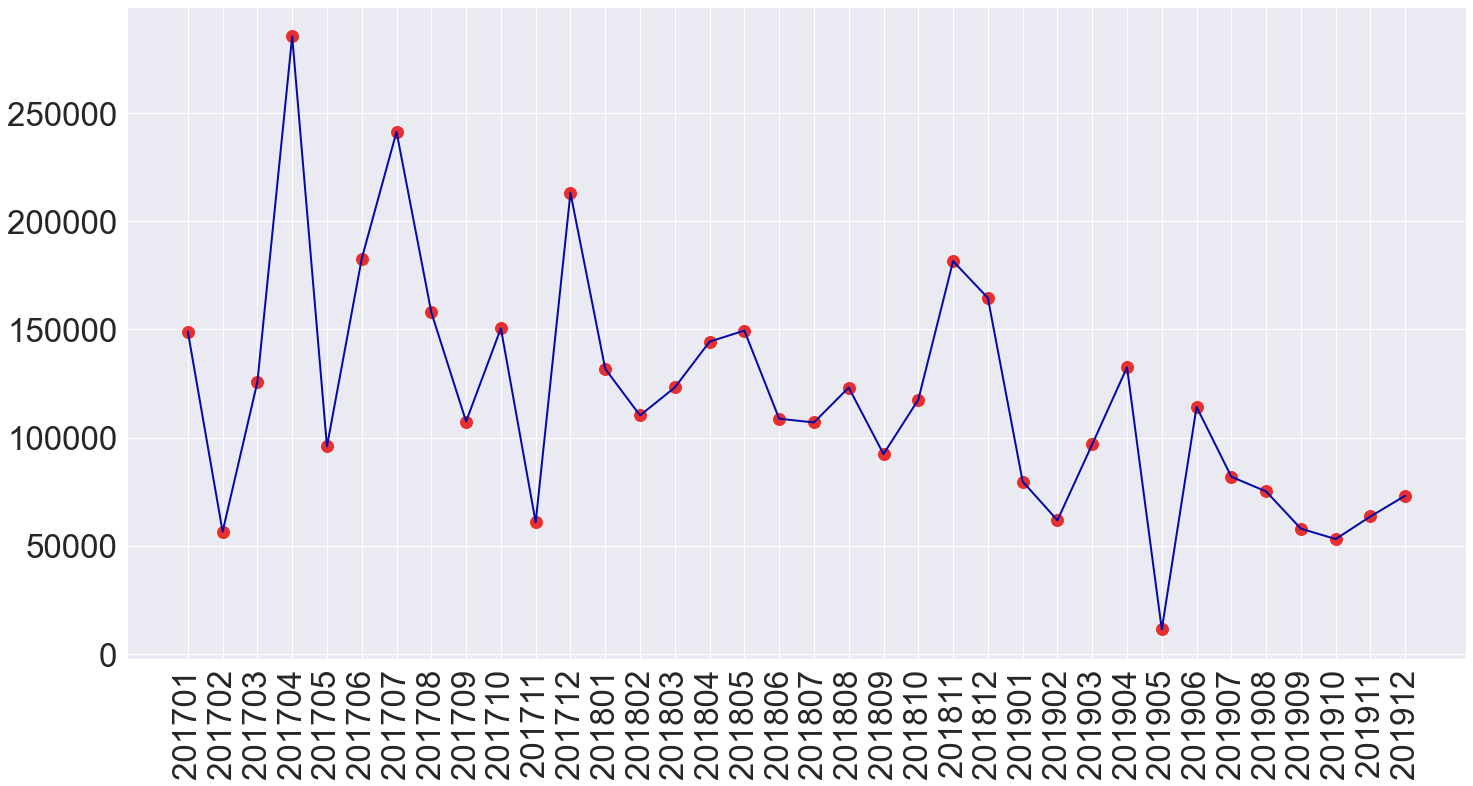

In [47]:
calcul = donneesve.assign(
                 annee_mois = donneesve.ANNEE.astype('str')+donneesve.MOIS.apply(lambda x:f'{x:02d}')
                ).groupby(
                          ['annee_mois']
                         ).agg(
                               {'QUANTITE':['sum']
                                 }).reset_index()
calcul.columns = ['annee_mois','QUANTITE']


plt.figure(figsize=(24,12))

graph = sns.lineplot( x         = "annee_mois", 
                      y         = "QUANTITE", 
                      data      = calcul, 
                      estimator = None, 
                      lw        = 2, 
                      ci        = None,
#                       label     = nom,
                      color     = palette[0])
sns.scatterplot( x     = "annee_mois", 
                     y     = "QUANTITE", 
                     data  = calcul, 
                             alpha =  0.8,   
                     s     = 200,
        #              ci    = None, 
                     color = palette[1],
                     ax    = graph,
                         );
                             
graph.set_xlabel('');
graph.set_ylabel('');    
graph.set_xticklabels(calcul.annee_mois,rotation=90);